In [1]:
import warnings
warnings.simplefilter(action="ignore")
# conda install -c conda-forge sweetviz 
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 188 kB/s 


In [2]:
!pip install sweetviz

# Análisis Exploratório de Datos con Python/Pandas

_Python_ es un lenguaje de programación de alto nivel que se puede utilizar para realizar varias tareas. En este curso utilizaremos _Python_ y algunas de sus librerías para realizar actividades prácticas relacionadas con la Minería de Datos.

Una distribución de _Python_ gratuita (para uso individual) que es fácil de instalar y mantener es [Anaconda](https://www.anaconda.com/products/individual).

Si no puede instalar _Python_ en su máquina, puede usar una versión en línea como [Google Colab](https://colab.research.google.com)

Hoy usaremos la biblioteca [_Pandas_](https://pandas.pydata.org/), que es una biblioteca de análisis y manipulación de datos de código abierto rápida, potente, flexible y fácil de usar.

In [3]:
import pandas as pd # carregamento e manipulação de dados
import sweetviz as sv # ferramenta de análise exploratória
import seaborn as sns # gráficos
import matplotlib.pyplot as plt # gráficos
import numpy as np # processamento matemático
from scipy.stats import norm # normal

Comencemos cargando Pandas y la base de datos. Esta es una base para el pago de facturas en un restaurante y cuenta como atributos la factura total (total_bill), la propina (tip), el sexo del cliente que paga (sex), si la mesa estaba en un área de fumadores (smoker), el día de la semana (day) y la cantidad de personas en la mesa (size).

In [4]:
tips = pd.read_csv("Churn_Modelling.csv",index_col=0)

Podemos ver las primeras líneas del archivo usando la función `.head ()`

In [5]:
tips.head(10)

CustomerId   Surname  ...  EstimatedSalary Exited
RowNumber                        ...                        
1            15634602  Hargrave  ...        101348.88      1
2            15647311      Hill  ...        112542.58      0
3            15619304      Onio  ...        113931.57      1
4            15701354      Boni  ...         93826.63      0
5            15737888  Mitchell  ...         79084.10      0
6            15574012       Chu  ...        149756.71      1
7            15592531  Bartlett  ...         10062.80      0
8            15656148    Obinna  ...        119346.88      1
9            15792365        He  ...         74940.50      0
10           15592389        H?  ...         71725.73      0

[10 rows x 13 columns]

Los últimos con la función `.tail ()`

In [6]:
tips.tail(10)

CustomerId      Surname  ...  EstimatedSalary Exited
RowNumber                           ...                        
9991         15798964   Nkemakonam  ...         53667.08      0
9992         15769959  Ajuluchukwu  ...         69384.71      1
9993         15657105  Chukwualuka  ...        195192.40      0
9994         15569266       Rahman  ...         29179.52      0
9995         15719294         Wood  ...        167773.55      0
9996         15606229     Obijiaku  ...         96270.64      0
9997         15569892    Johnstone  ...        101699.77      0
9998         15584532          Liu  ...         42085.58      1
9999         15682355    Sabbatini  ...         92888.52      1
10000        15628319       Walker  ...         38190.78      0

[10 rows x 13 columns]

Y una muestra aleatoria con la función `.sample ()`

In [7]:
tips.sample(10)

CustomerId    Surname  ...  EstimatedSalary Exited
RowNumber                         ...                        
3609         15601873       Bull  ...         47318.75      0
1            15634602   Hargrave  ...        101348.88      1
4977         15717056        Pan  ...        116613.26      0
6222         15603554   Berkeley  ...         49915.52      1
8583         15637947        Wei  ...        111241.37      0
6272         15620756     Stokes  ...         17298.72      1
6621         15751297     Wilson  ...        161428.25      0
6753         15605424  Oluchukwu  ...        135096.78      0
3688         15626806   Labrador  ...         40652.33      0
3383         15570629  Alexeyeva  ...         99920.41      0

[10 rows x 13 columns]

O comando `.info()` mostra os atributos, e o tipos de cada atributo 

In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


El comando `.describe ()` devuelve algunas estadísticas descriptivas para atributos numéricos:

In [9]:
tips.describe()

CustomerId   CreditScore  ...  EstimatedSalary        Exited
count  1.000000e+04  10000.000000  ...     10000.000000  10000.000000
mean   1.569094e+07    650.528800  ...    100090.239881      0.203700
std    7.193619e+04     96.653299  ...     57510.492818      0.402769
min    1.556570e+07    350.000000  ...        11.580000      0.000000
25%    1.562853e+07    584.000000  ...     51002.110000      0.000000
50%    1.569074e+07    652.000000  ...    100193.915000      0.000000
75%    1.575323e+07    718.000000  ...    149388.247500      0.000000
max    1.581569e+07    850.000000  ...    199992.480000      1.000000

[8 rows x 10 columns]

Echemos un vistazo a la distribución de la columna `total_bill`. Para facilitar la visualización, usaremos algunas bibliotecas de gráficos, como [`matplotlib`](https://matplotlib.org/) y [` seaborn`](https://seaborn.pydata.org/).

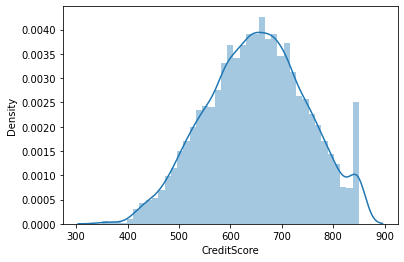

In [15]:
CreditScore= tips['CreditScore']

sns.distplot(CreditScore)

Como se puede ver, la distribución no es uniforme y tiene una cola a la derecha.

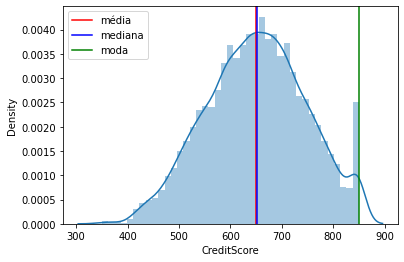

In [16]:
sns.distplot(CreditScore)
mean=CreditScore.mean()
median=CreditScore.median()
mode=CreditScore.mode()

plt.axvline(mean,color='r',label='média')
plt.axvline(median,color='b',label='mediana')
plt.axvline(mode[0],color='g',label='moda')
plt.legend()

Comparemos la estimación de densidad no paramétrica (generada por `distplot`) con una distribución paramétrica, asumiendo una distribución normal. Para ello, usaremos la función que calcula la densidad de probabilidad de la clase `norm`, de la biblioteca` scipy`.

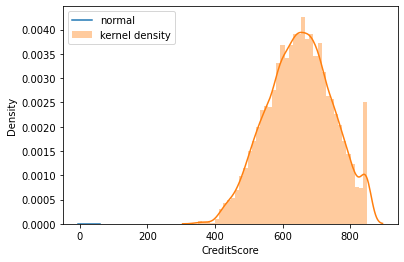

In [17]:
x = np.arange(-5, 60, 0.1) # entire range of x, both in and out of spec

mean = CreditScore.mean() # según el principio de máxima verosimilitud, la media muestral es el mejor estimador de la media
stddev = CreditScore.std()

y = norm.pdf(x, mean, stddev)

plt.plot(x,y,label='normal')
sns.distplot(CreditScore,label='kernel density')
plt.legend()

Otra forma de ver la distribución es crear un `boxplot`.

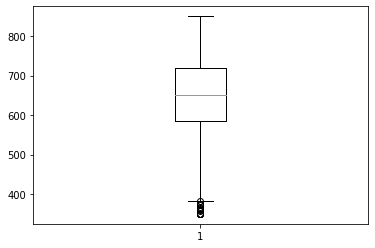

In [18]:
plt.boxplot(CreditScore)
plt.show()

El diagrama de caja está asociado con estadísticas descriptivas:

In [19]:
Q1 = CreditScore.quantile(q=0.25)
Q2 = CreditScore.quantile(q=0.5)
Q3 = CreditScore.quantile(q=0.75)
IQR = Q3 - Q1
LI = max(Q1 - 1.5 * IQR, CreditScore.min()) 
LU = min(Q3 + 1.5 * IQR, CreditScore.max())

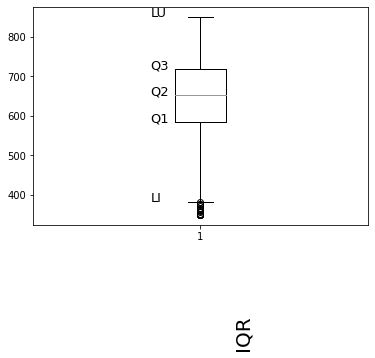

In [20]:
plt.boxplot(CreditScore)
plt.text(0.85,Q1,s='Q1',size=13)
plt.text(0.85,Q2,s='Q2',size=13)
plt.text(0.85,Q3,s='Q3',size=13)
plt.text(0.85,LI,s='LI',size=13)
plt.text(0.85,LU,s='LU',size=13)
plt.text(1.1,16,s='IQR',rotation=90,size=20)
plt.show()

## Herramientas para agilizar el proceso

Calcular estadísticas manualmente invocando funciones y creando gráficos puede resultar bastante engorroso. Varias herramientas son capaces de generar informes estandarizados para análisis de datos exploratorios. Uno de ellos es `sweetviz`. 

                                             |          | [  0%]   00:00 -> (? left)


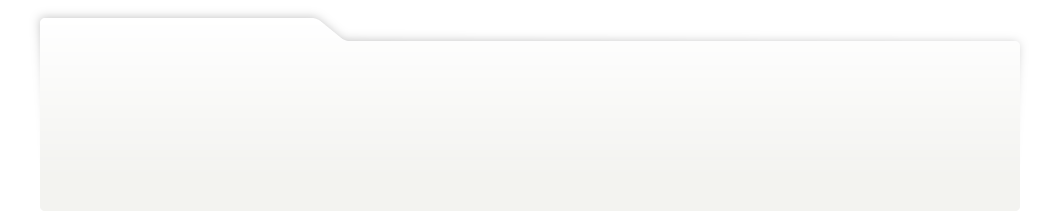
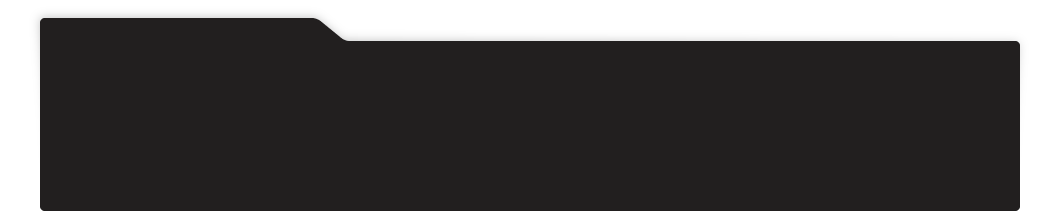
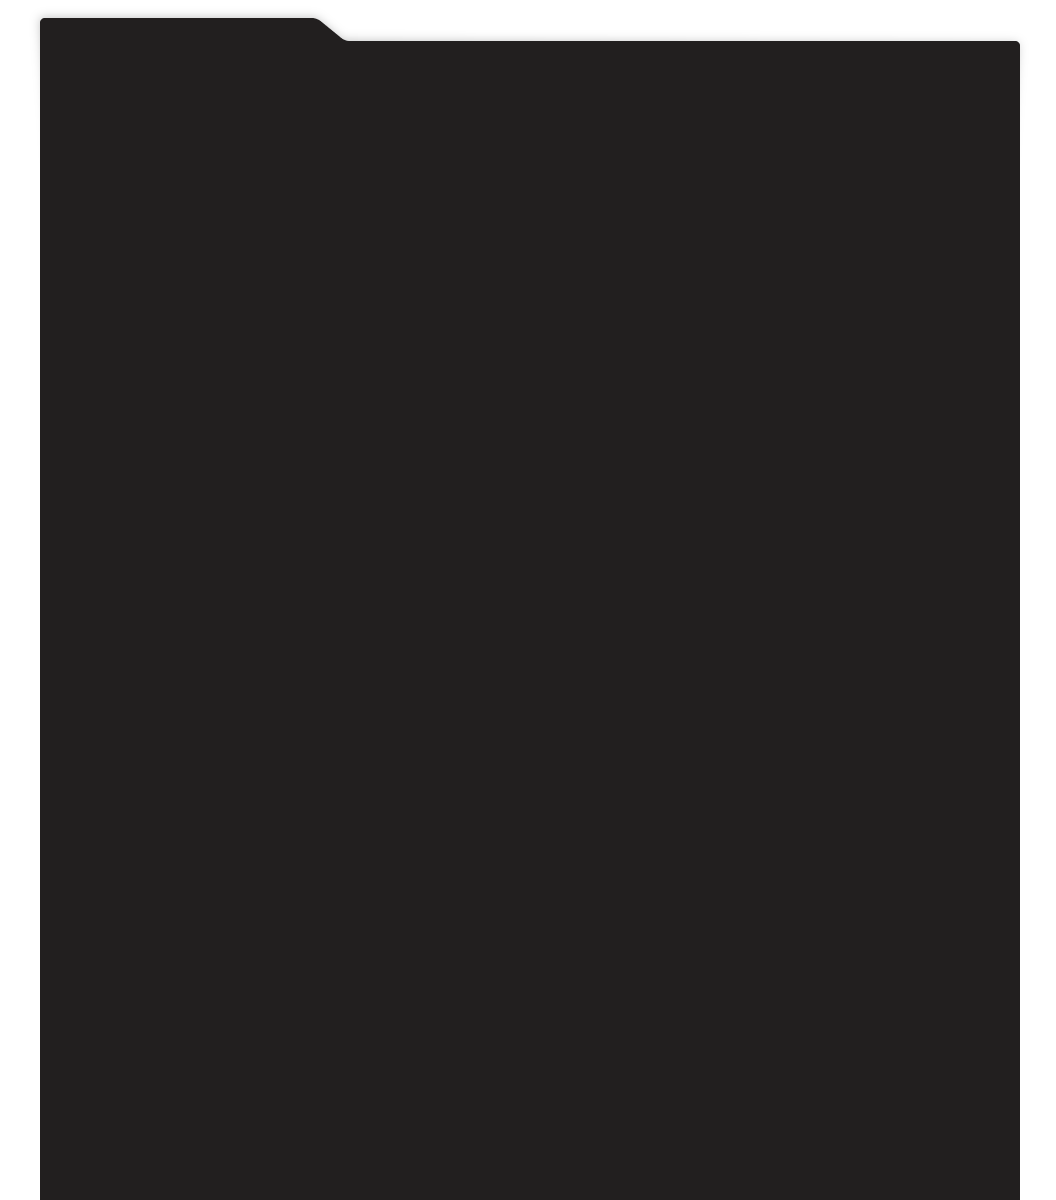
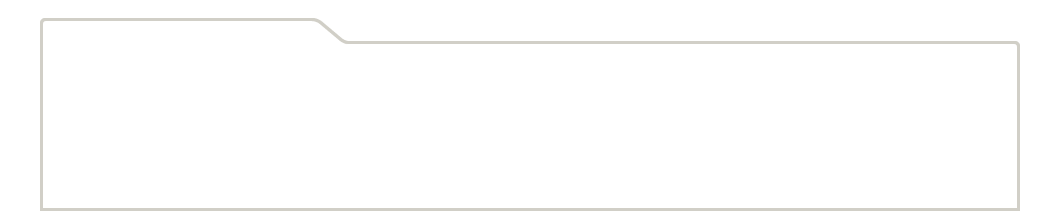
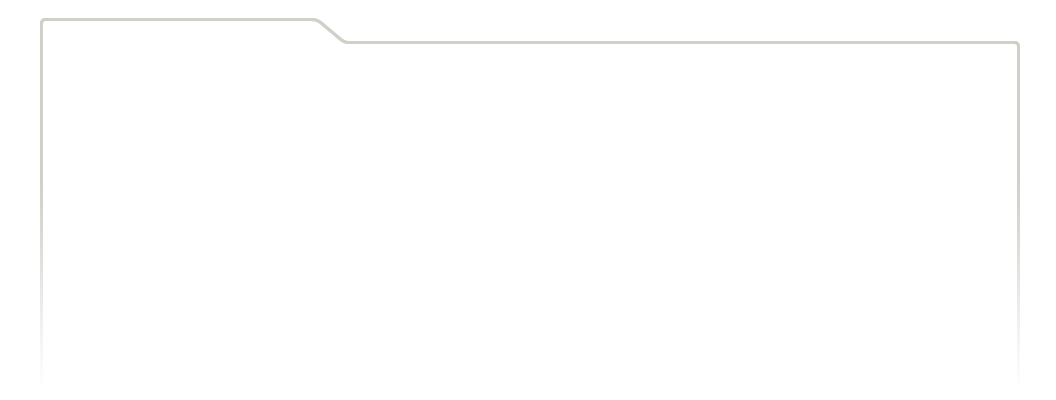
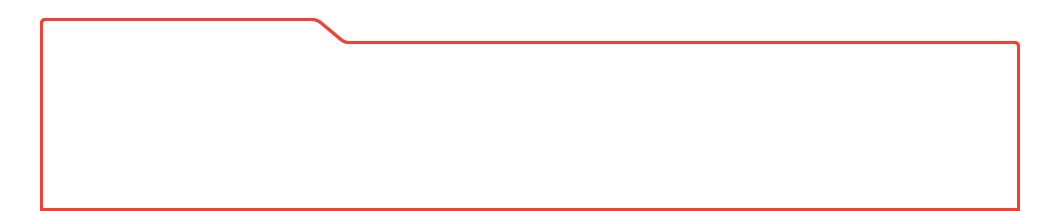
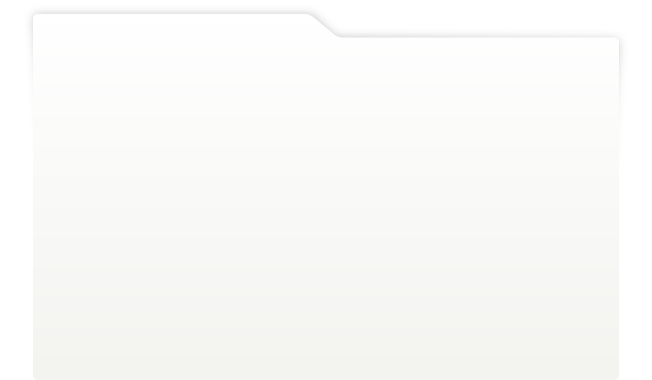
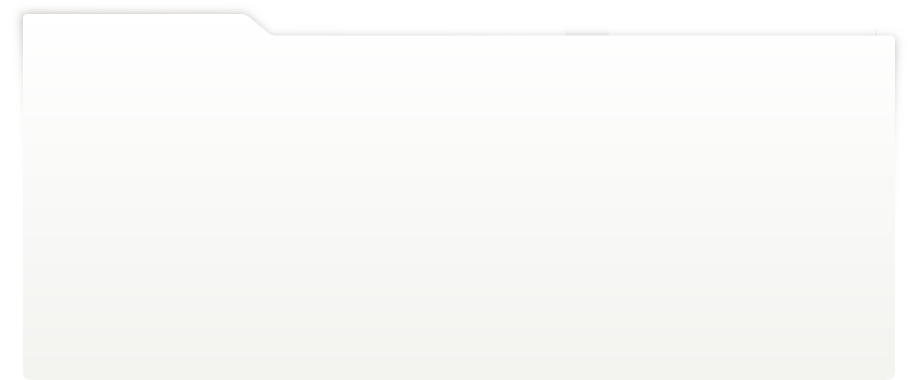
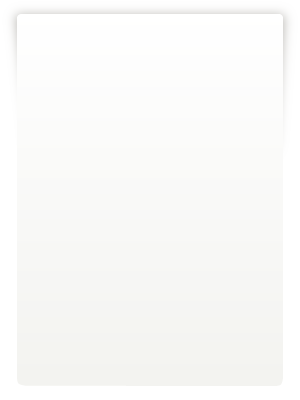
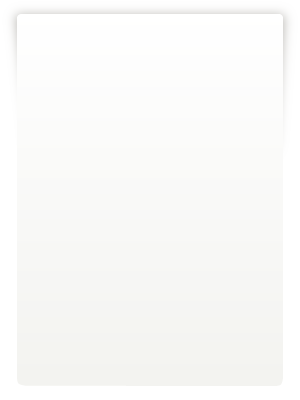
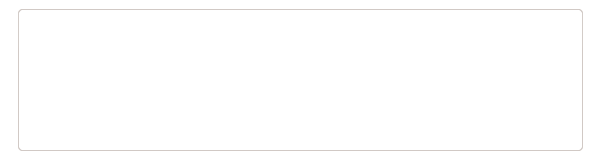
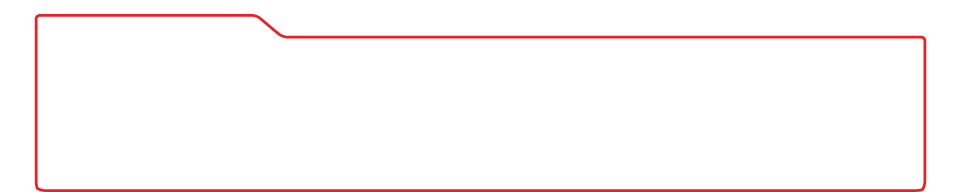
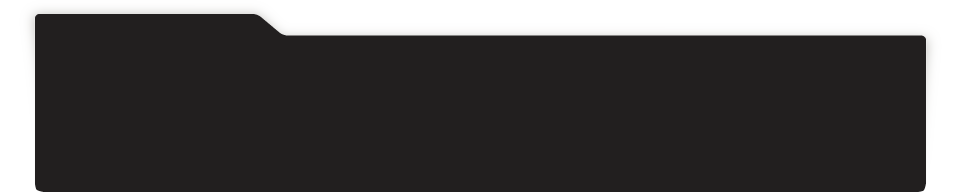
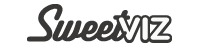
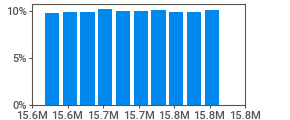
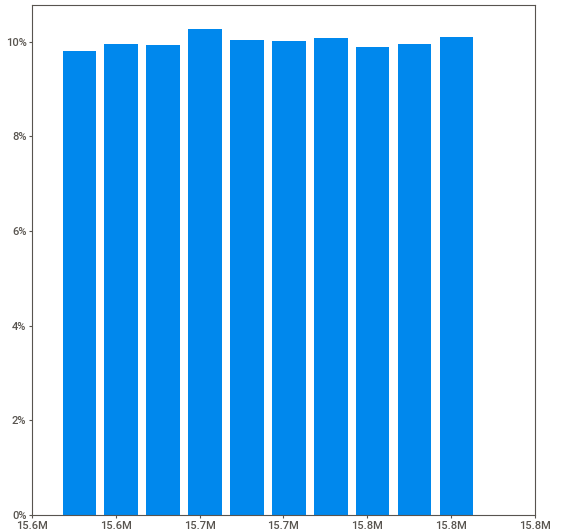
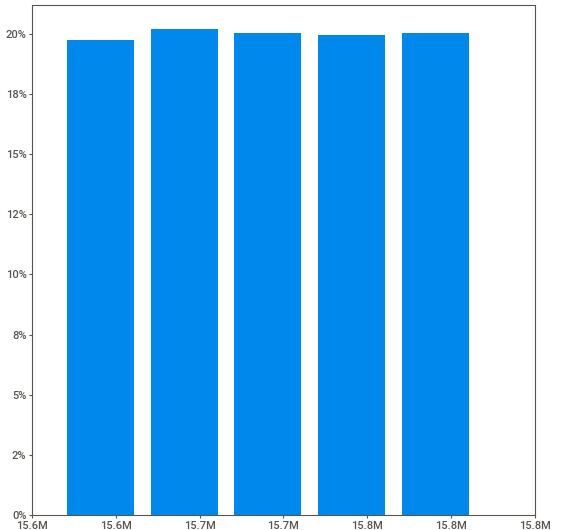
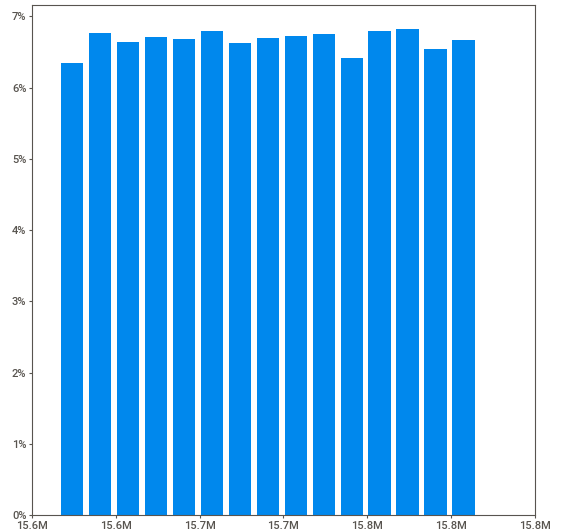
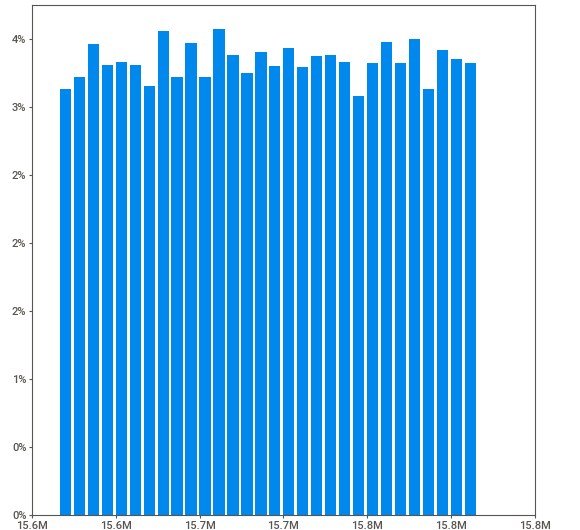
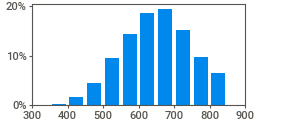
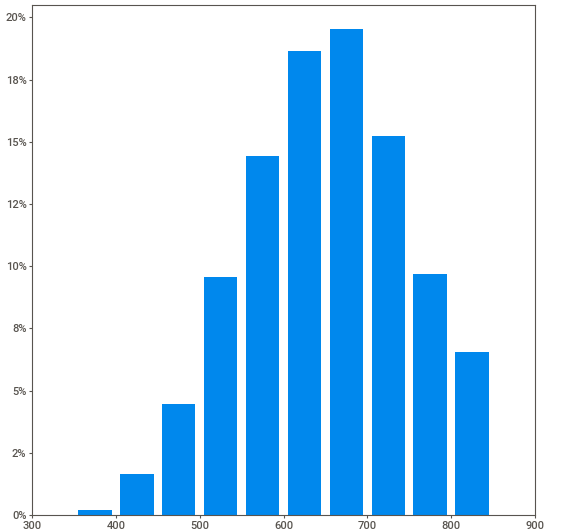
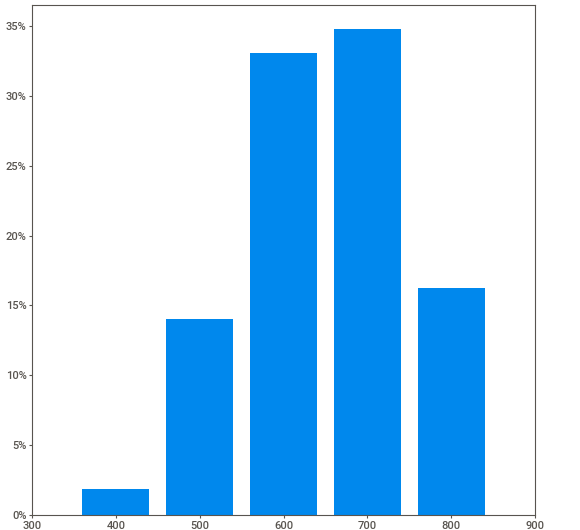
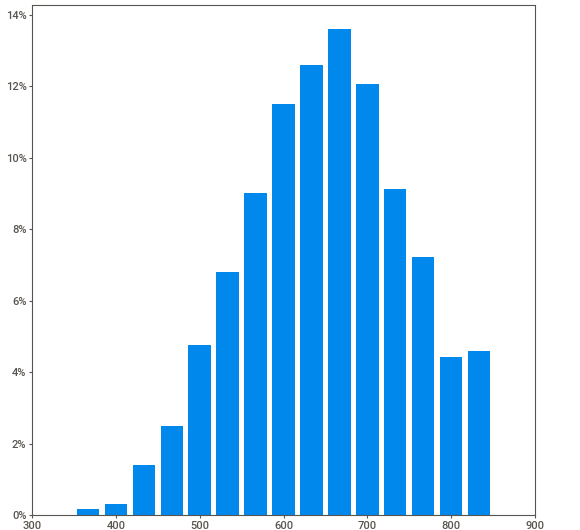
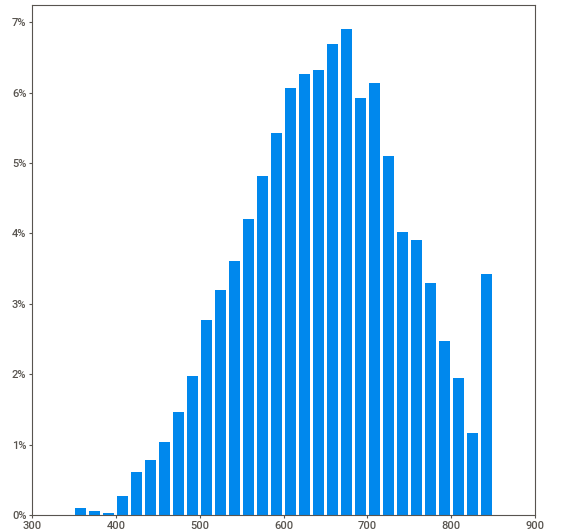
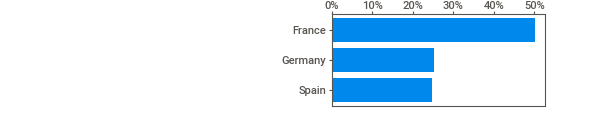
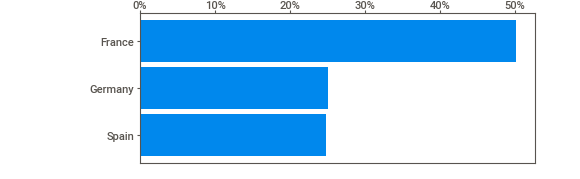
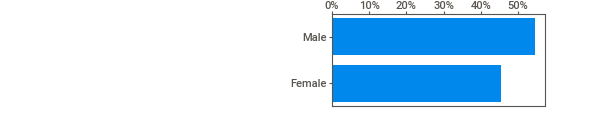
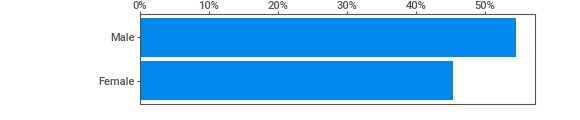
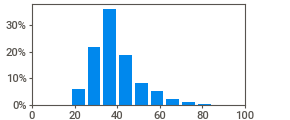
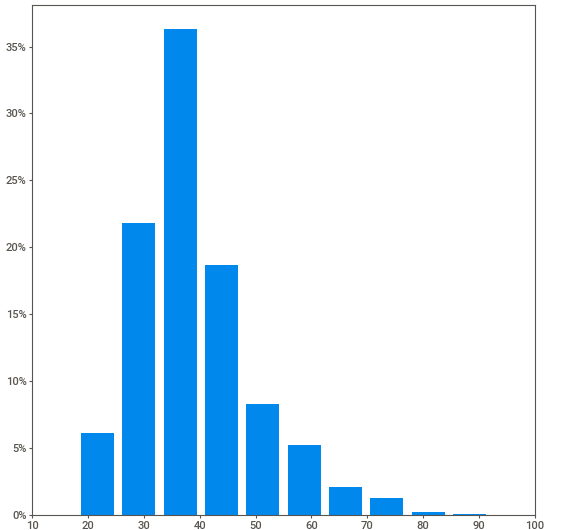
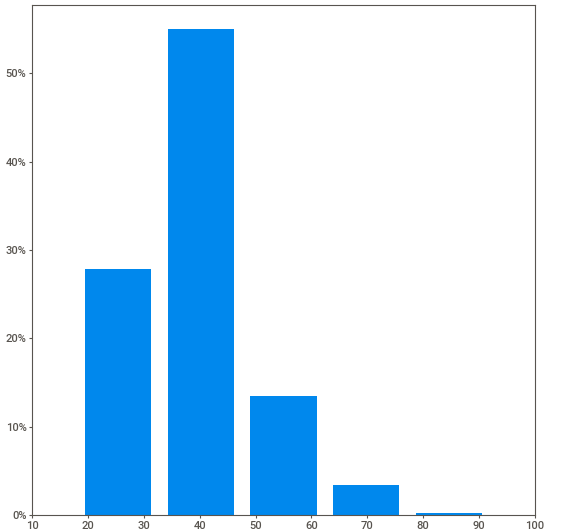
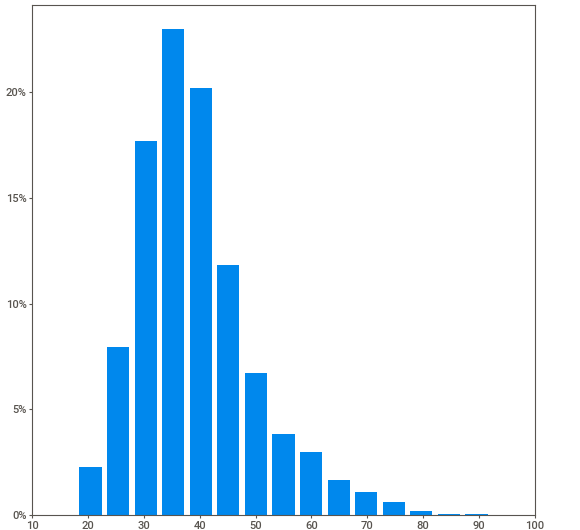
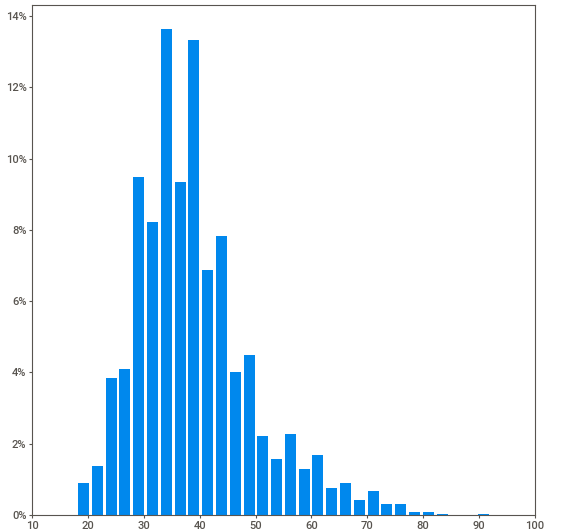
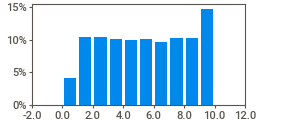
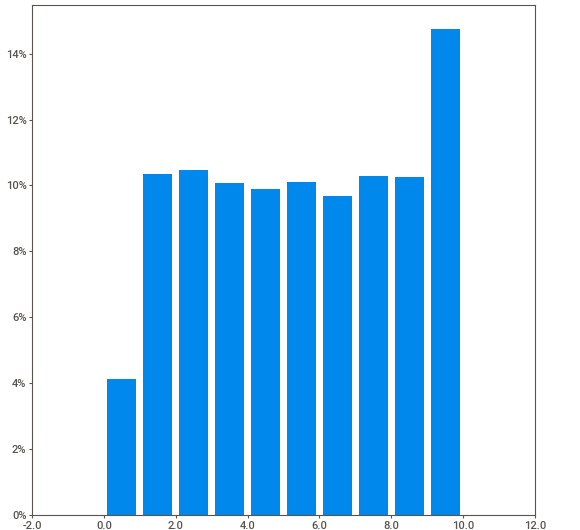
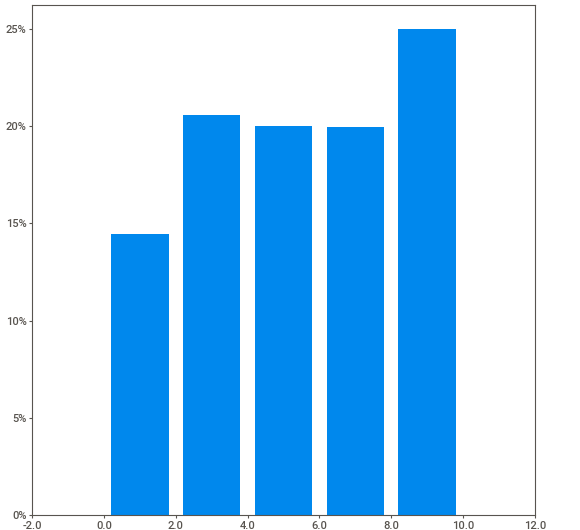
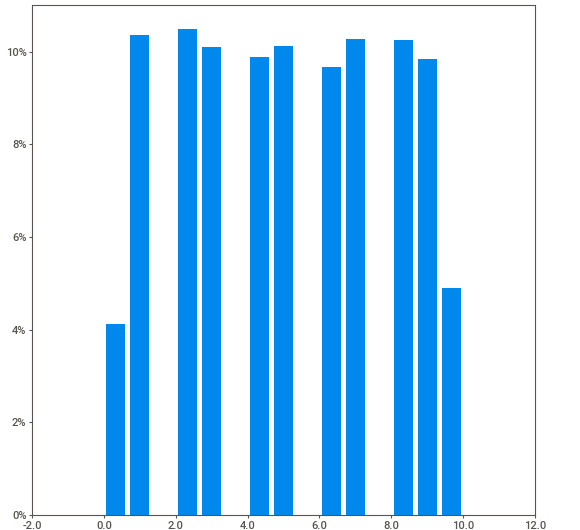
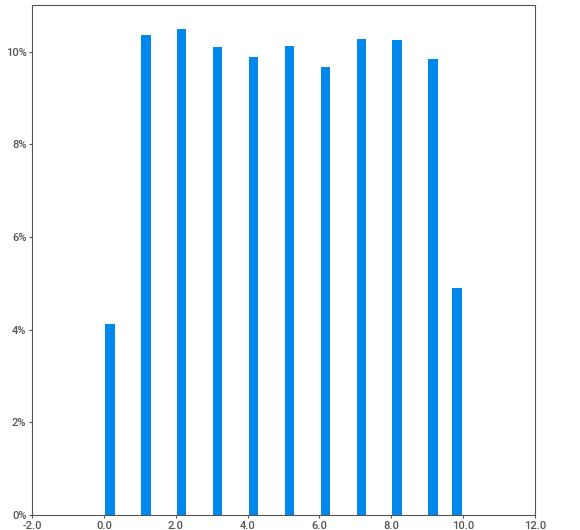
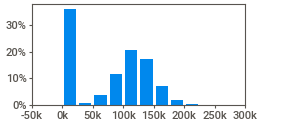
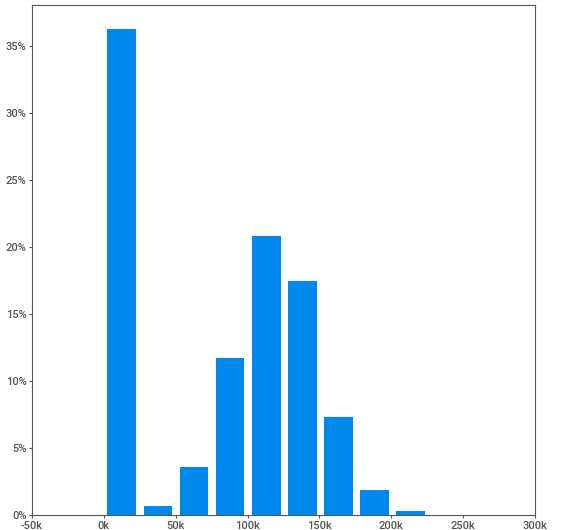
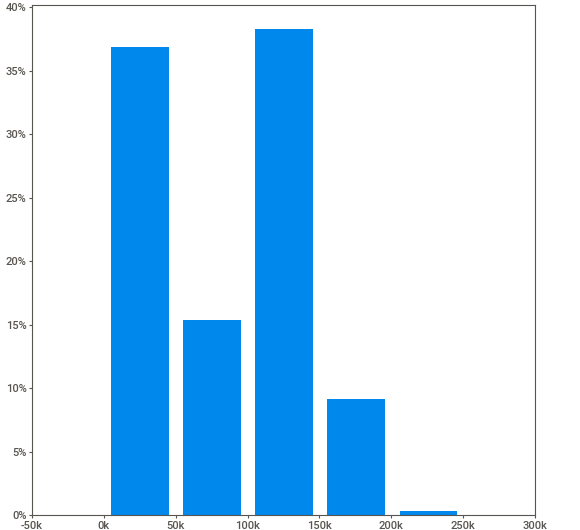
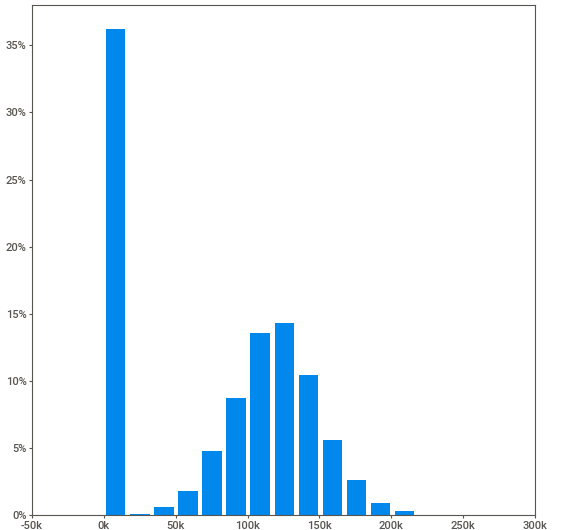
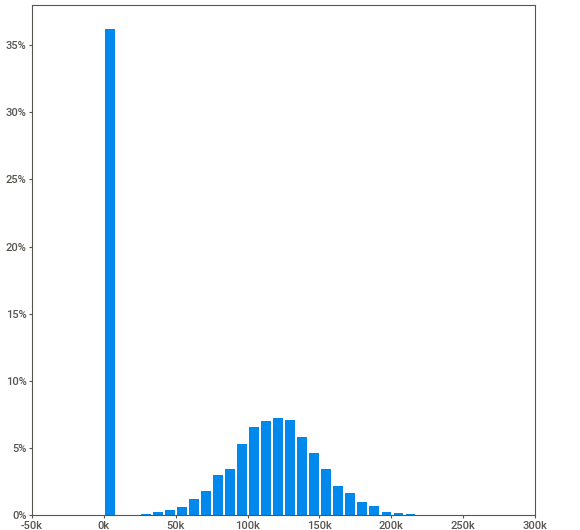
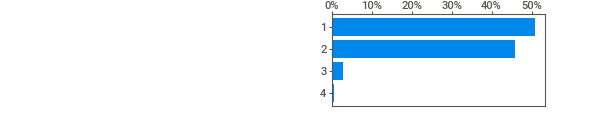
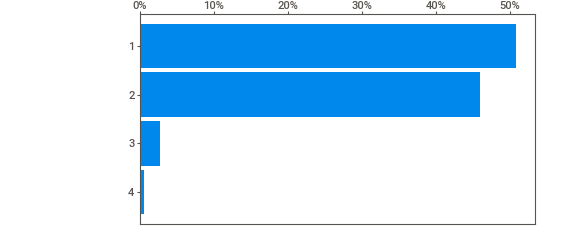
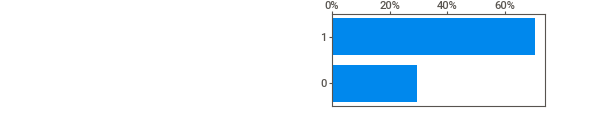
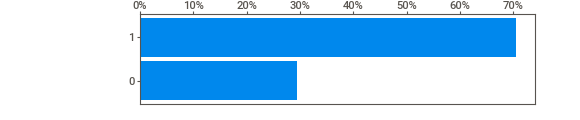
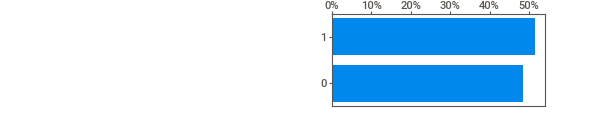
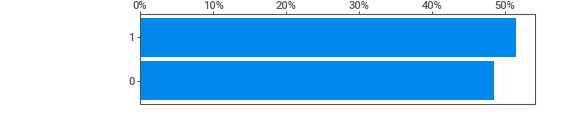
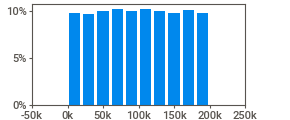
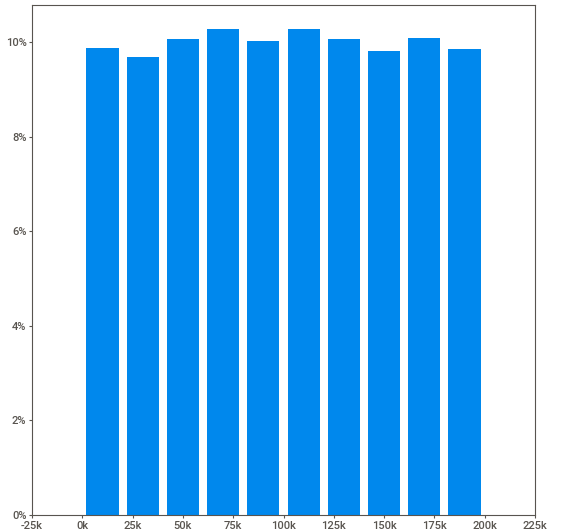
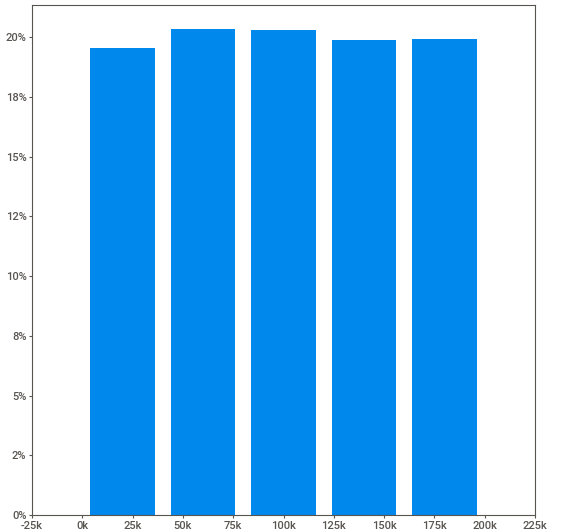
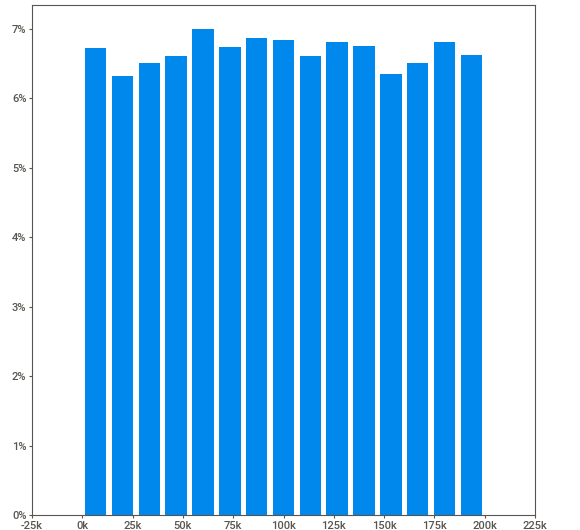
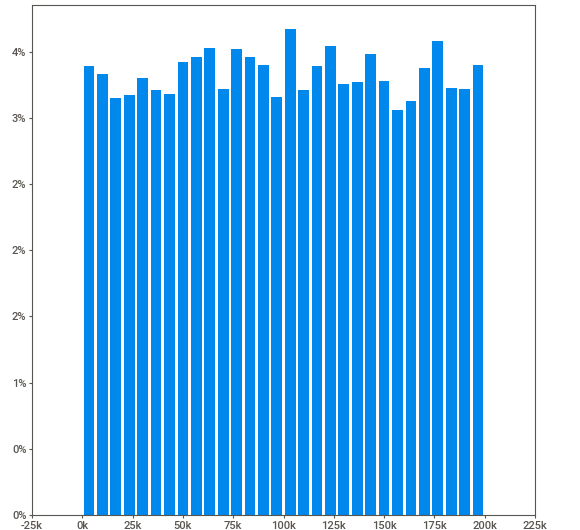
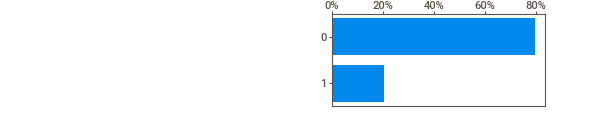
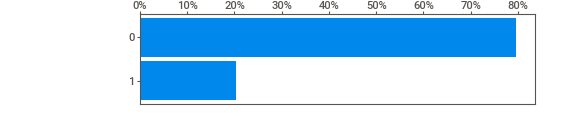
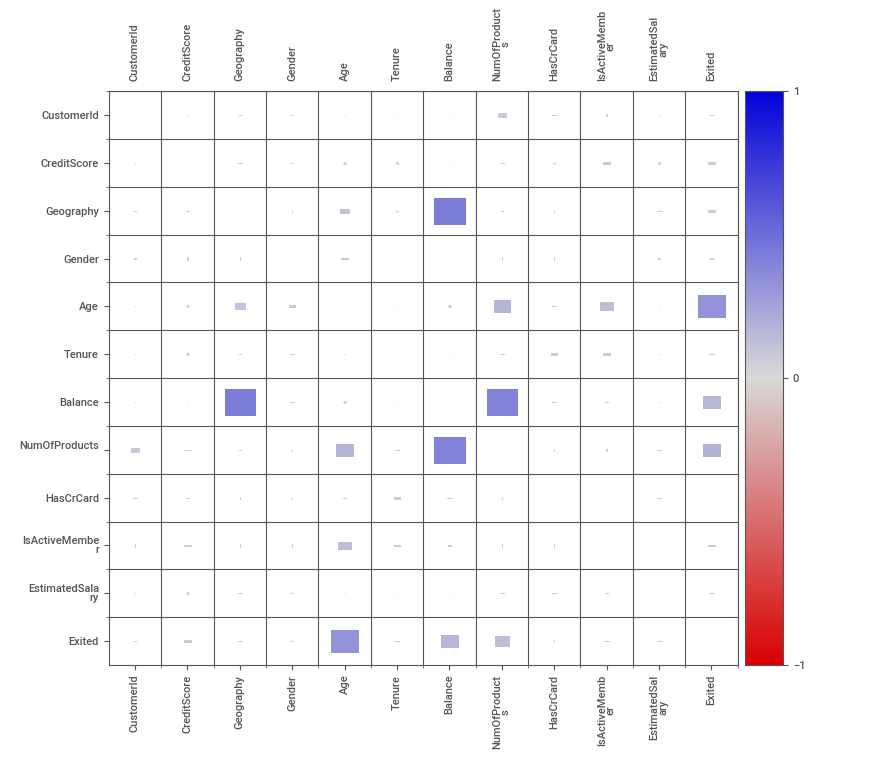
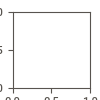

In [21]:
report = sv.analyze(tips)
report.show_notebook()

Es posible comparar diferentes cortes de base. Por ejemplo, compare el subconjunto de fumadores y no fumadores:

In [23]:
report = sv.compare_intra(tips,tips["smoker"] == "Yes",["Smoker","No Smoker"])
report.show_notebook()

KeyError: ignored

O el subconjunto de clientes masculinos y femeninos:

In [24]:
report = sv.compare_intra(tips,tips["sex"] == "Male",["Male","Female"])
report.show_notebook()

KeyError: ignored

O los subgrupos de almuerzo y cena:

                                             |          | [  0%]   00:00 -> (? left)


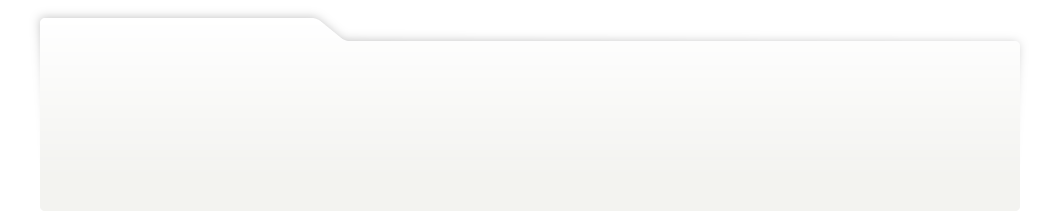
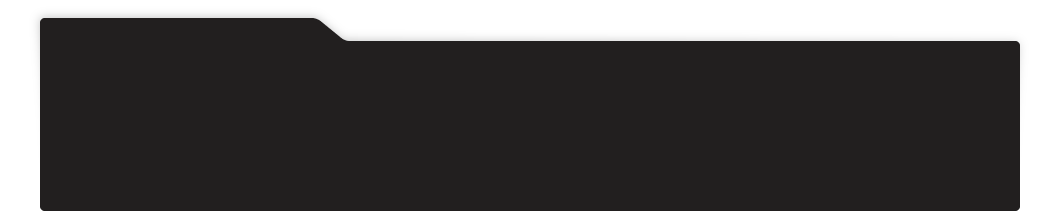
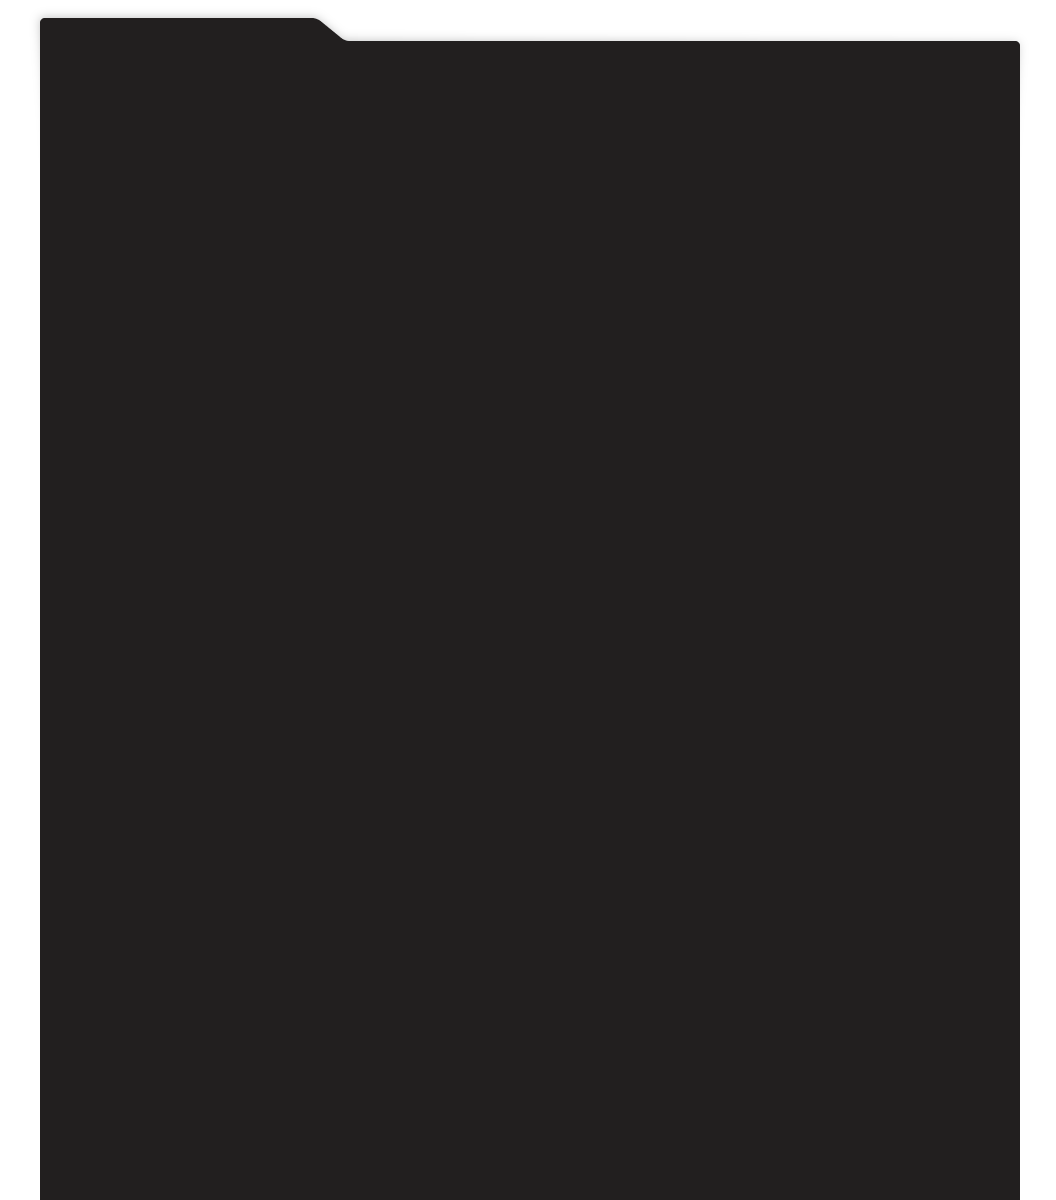
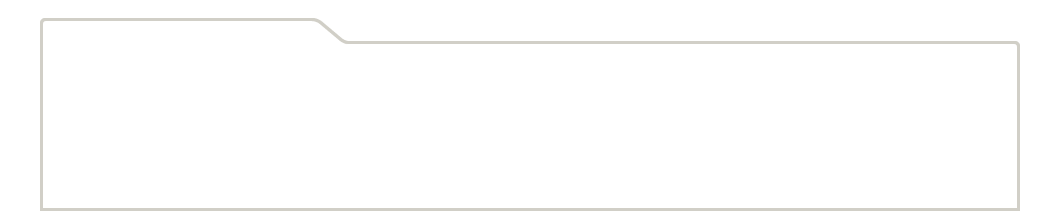
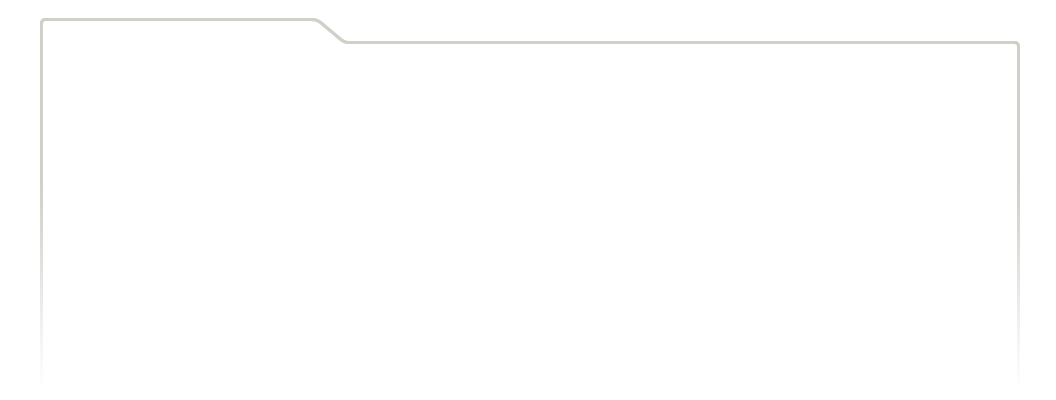
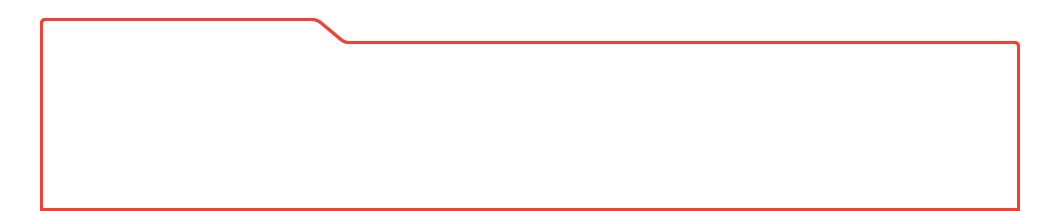
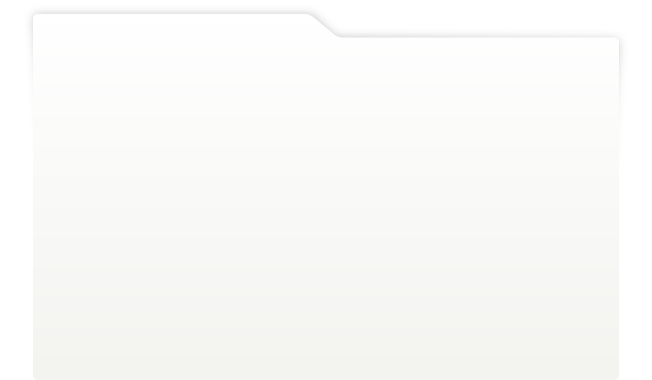
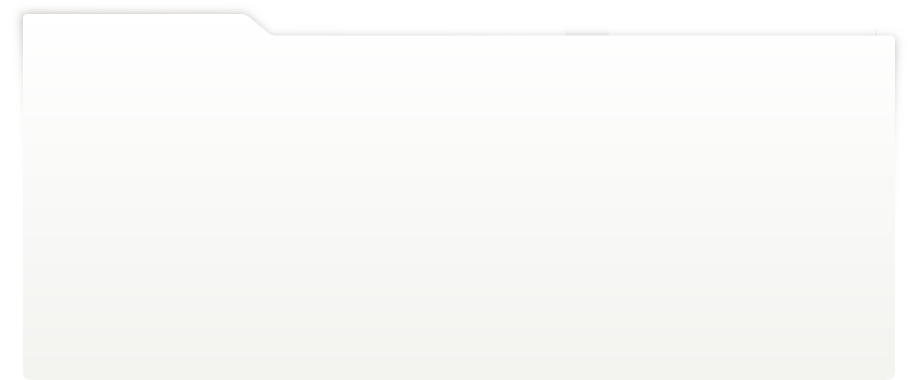
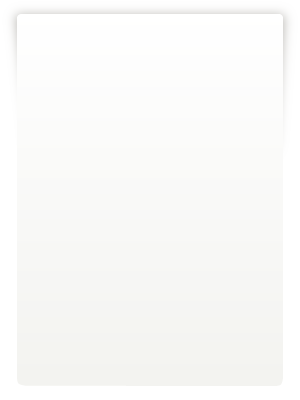
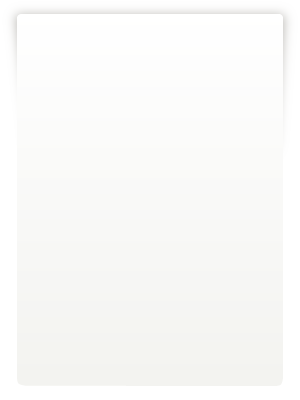
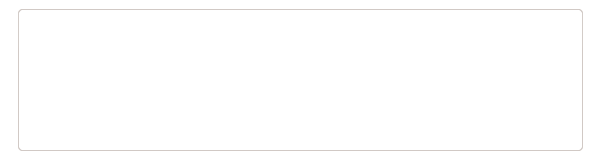
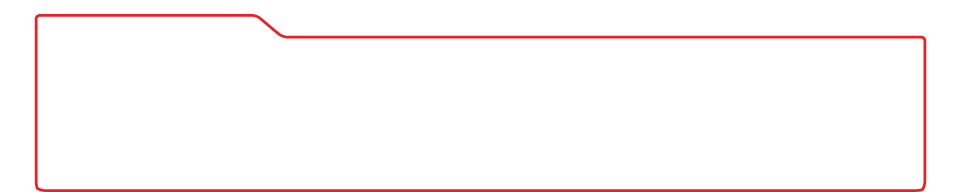
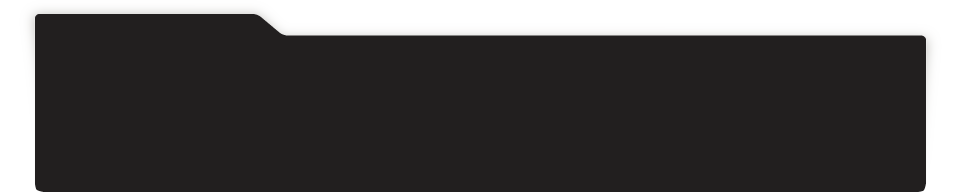
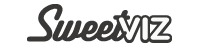
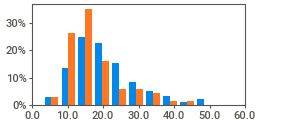
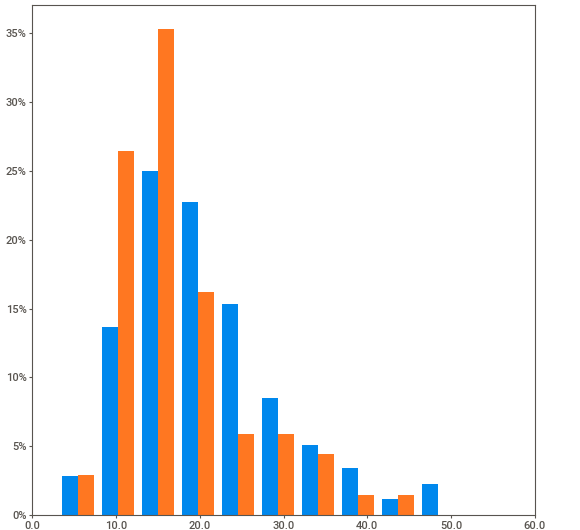
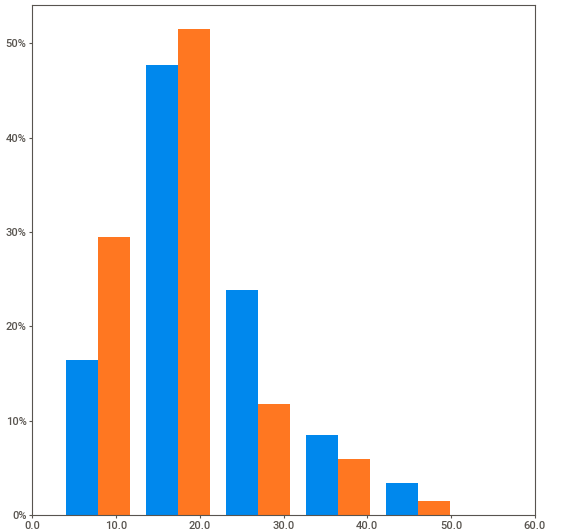
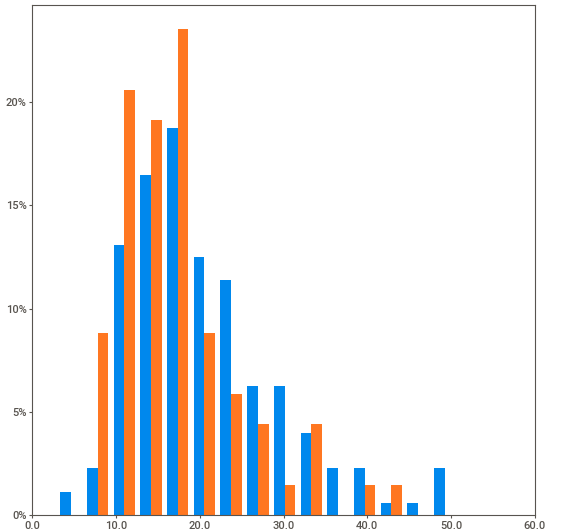
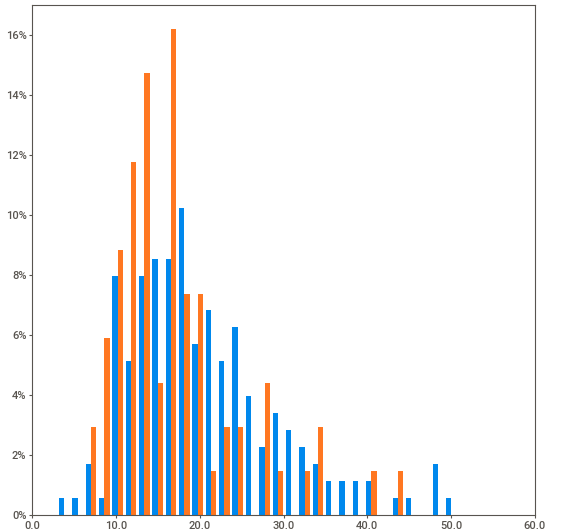
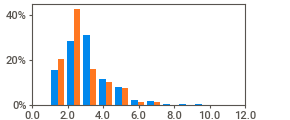
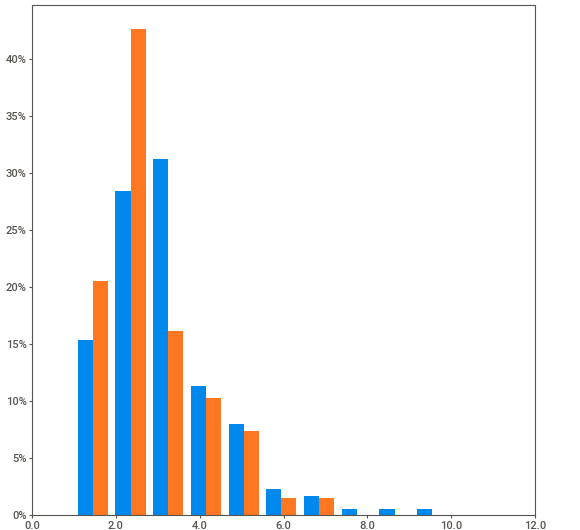
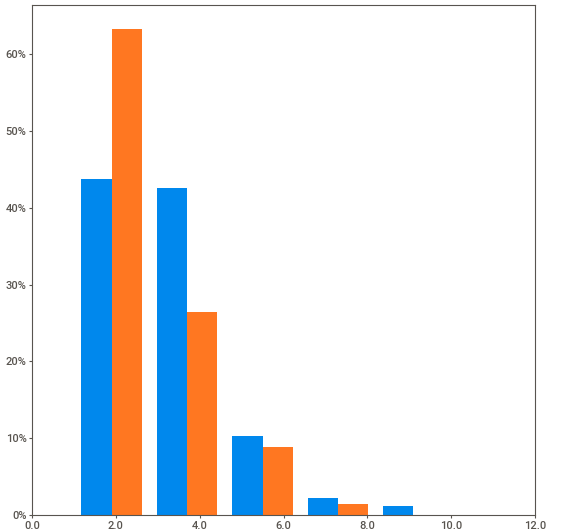
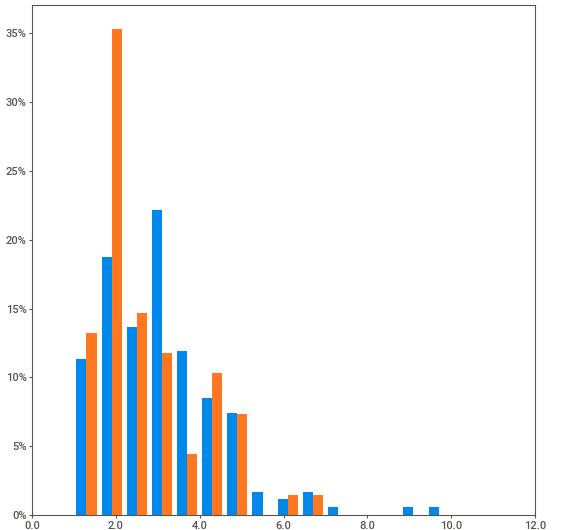
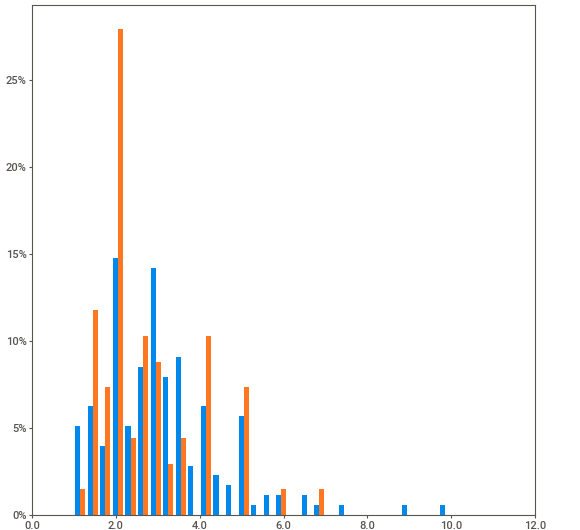
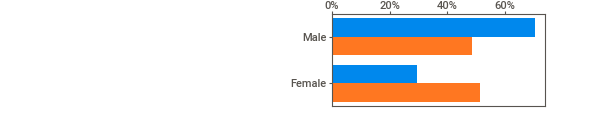
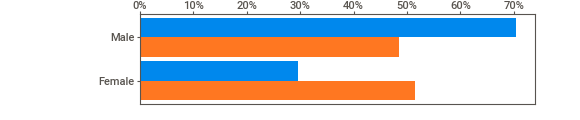
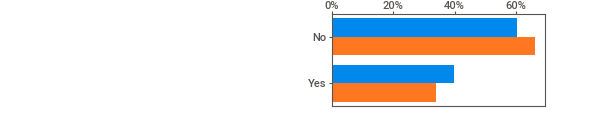
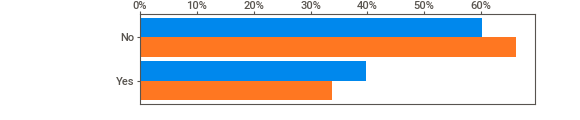
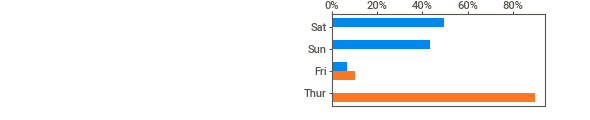
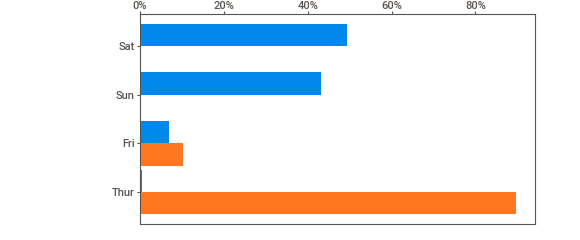
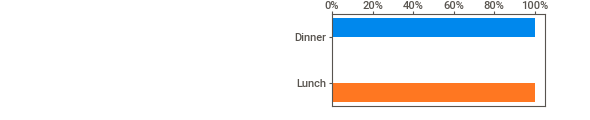
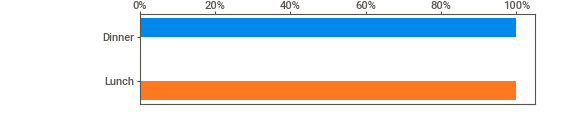
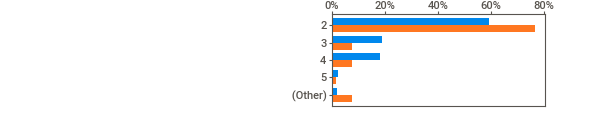
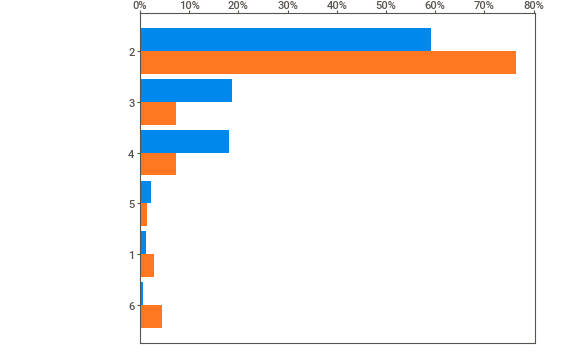
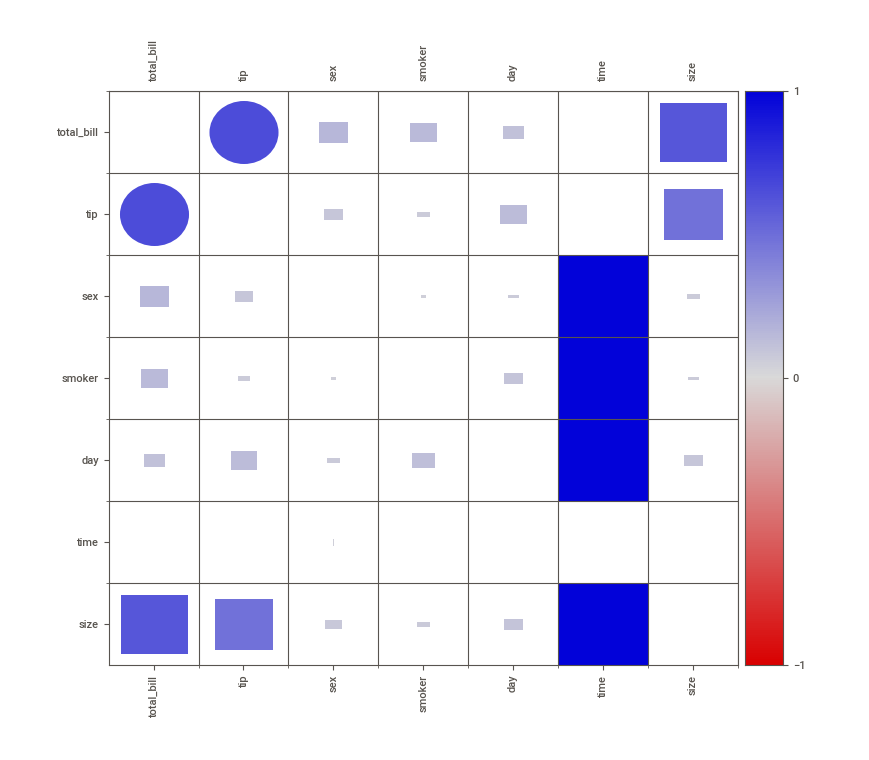
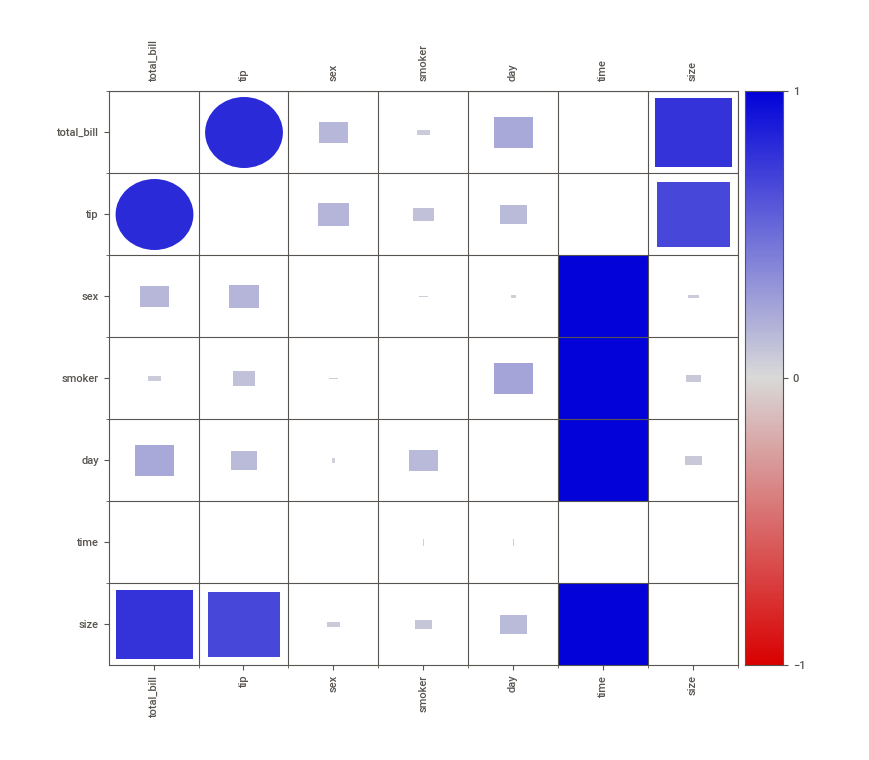

In [ ]:
report = sv.compare_intra(tips,tips["time"] == "Dinner",["Dinner","Lunch"])
report.show_notebook()

## Impacto de los valores perdidos

Para ilustrar la diferencia entre los mecanismos de valor perdido, simulemos diferentes mecanismos de valor perdido y comparemos bases de datos. Inicialmente haremos una copia de la base de datos:

In [25]:
tips_NA = tips.copy()

Y luego seleccionamos una muestra aleatoria del 20%,

In [26]:
sample = np.random.choice(list(tips_NA.index),int(len(tips)*0.2))
tips_NA.loc[sample,['total_bill','tip']] = np.nan

Comparemos los dos conjuntos de datos:

                                             |          | [  0%]   00:00 -> (? left)


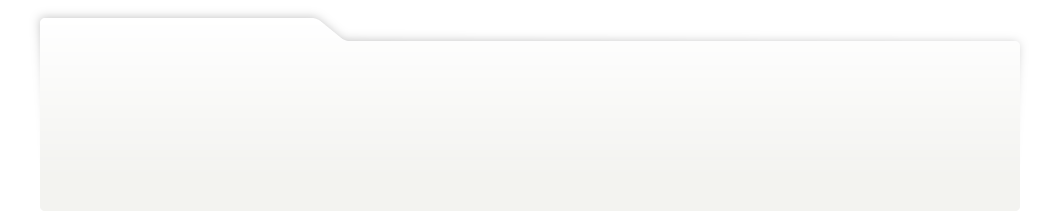
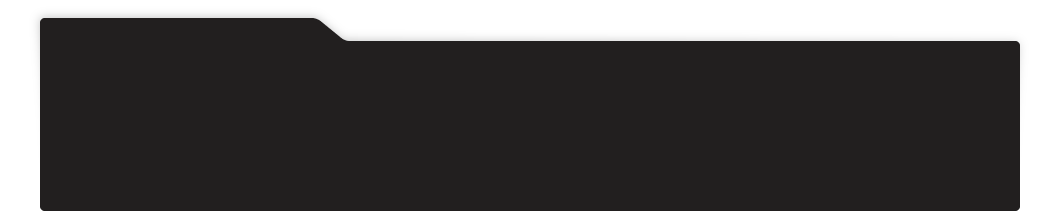
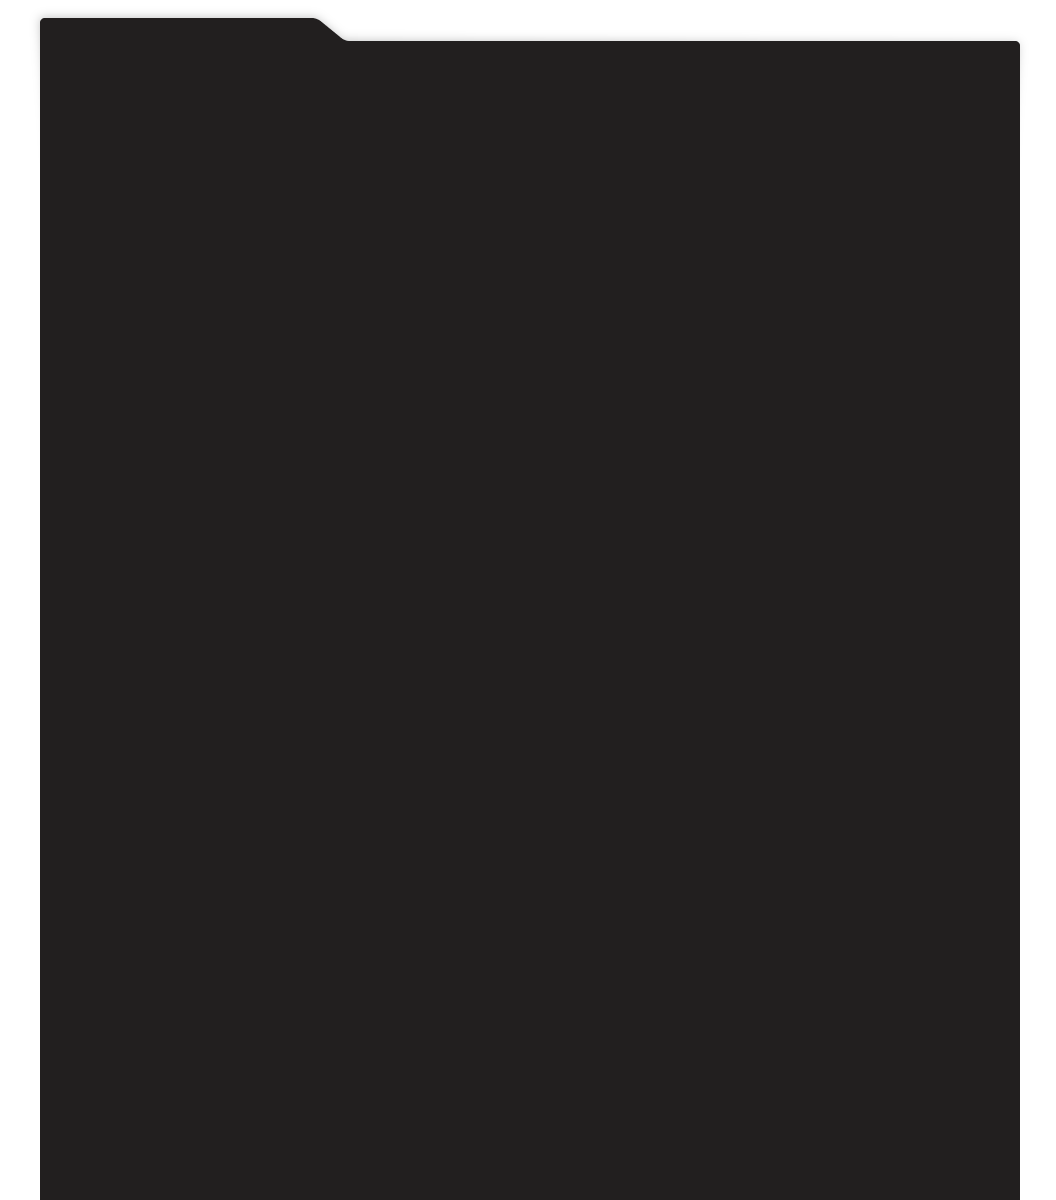
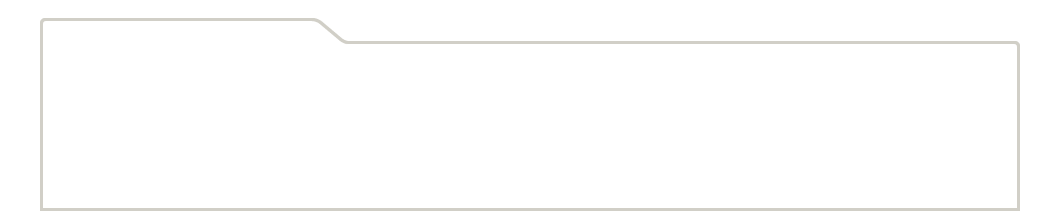
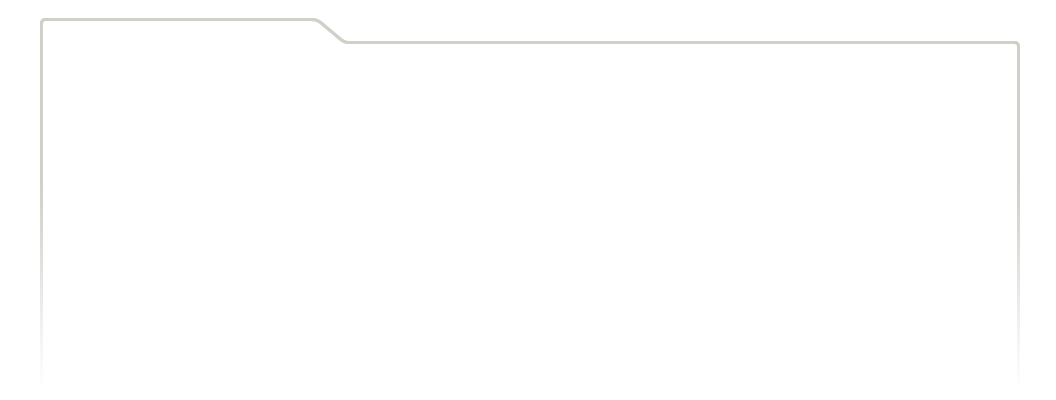
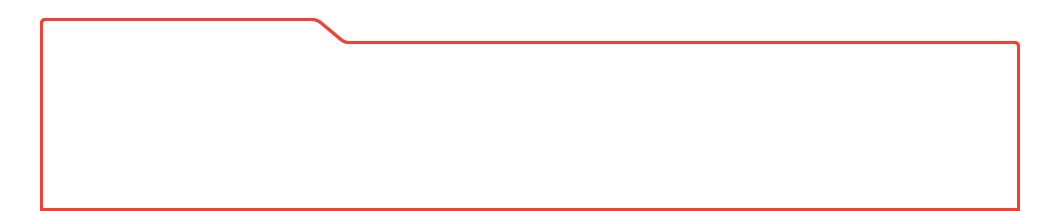
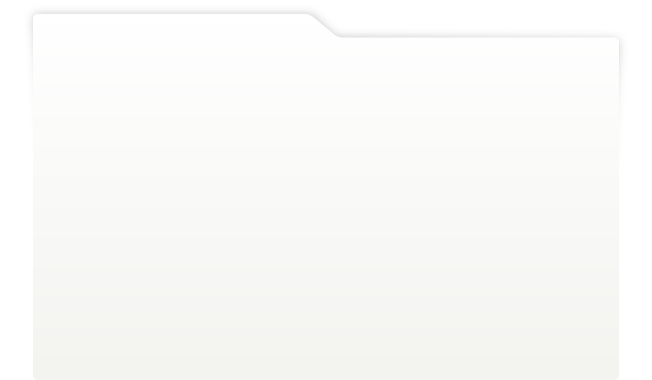
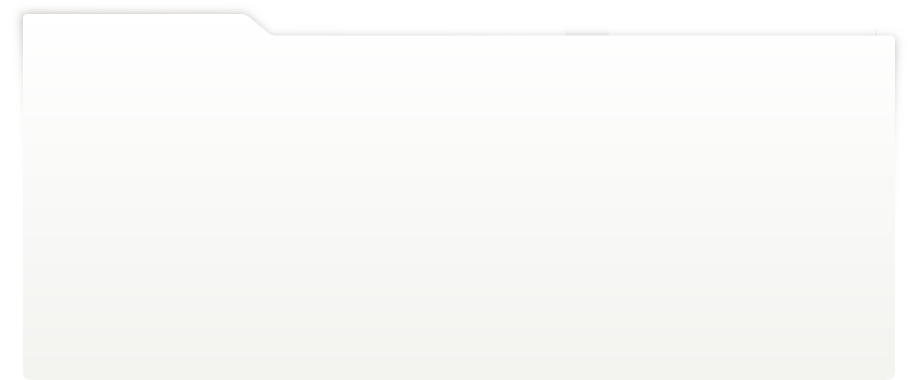
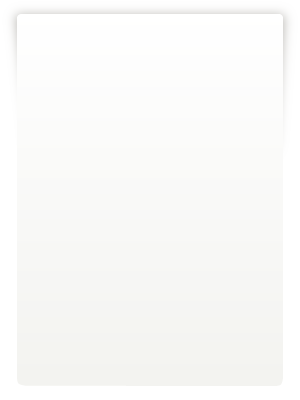
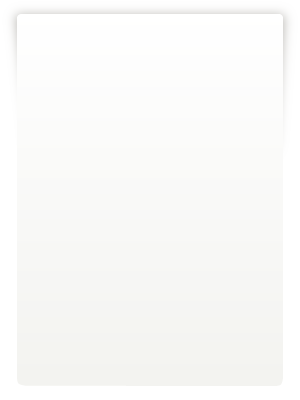
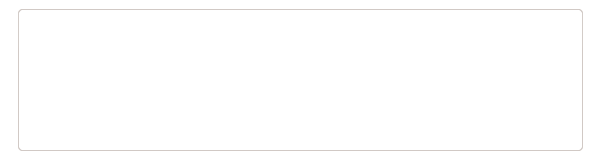
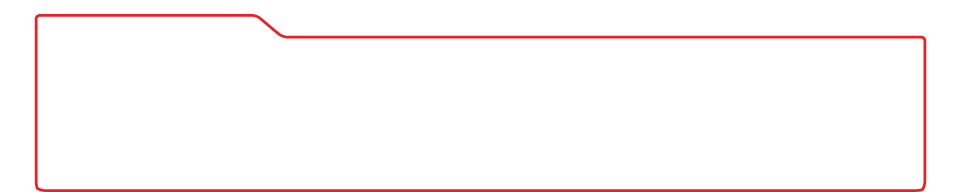
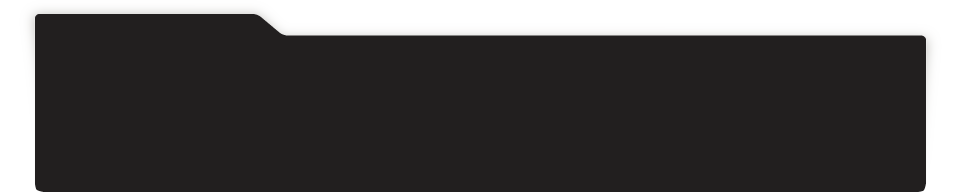
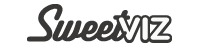
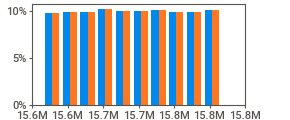
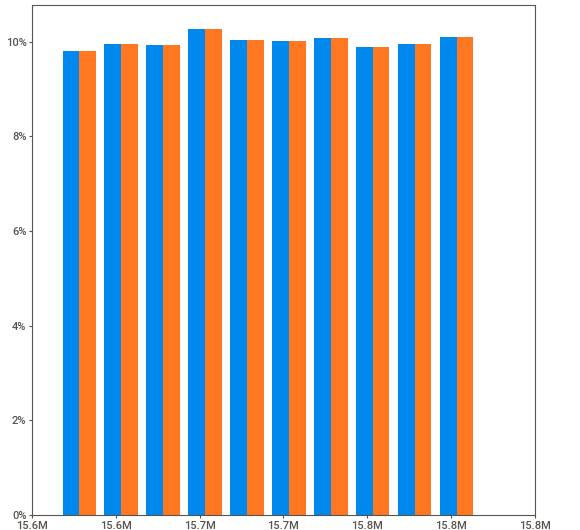
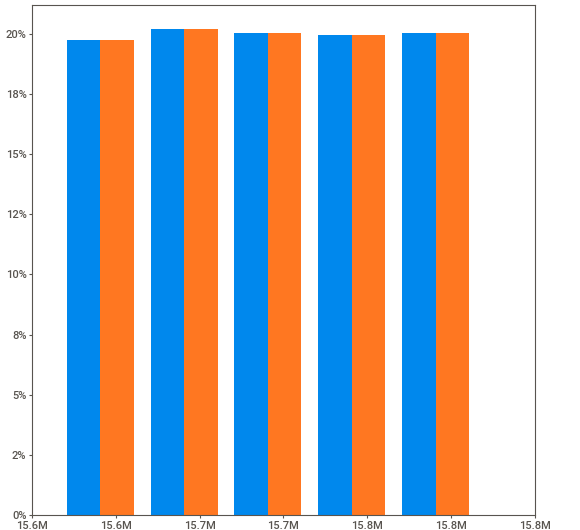
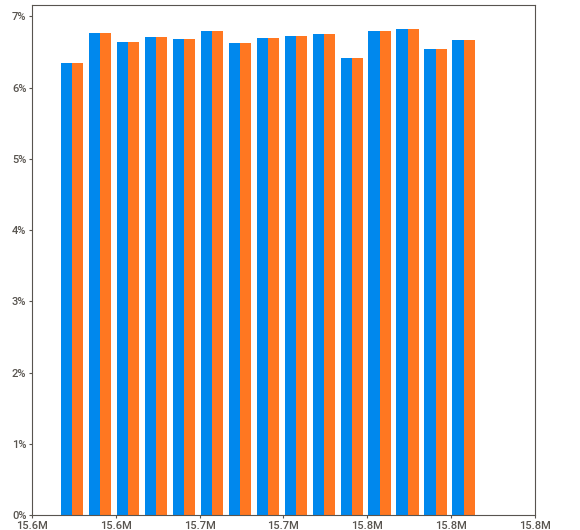
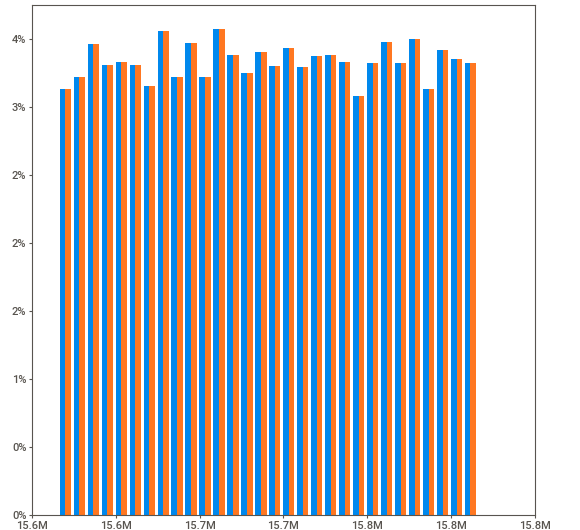
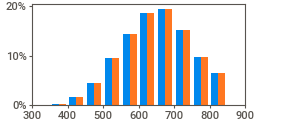
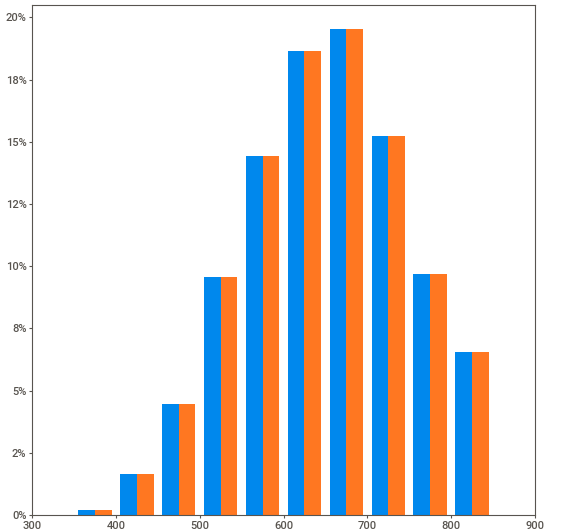
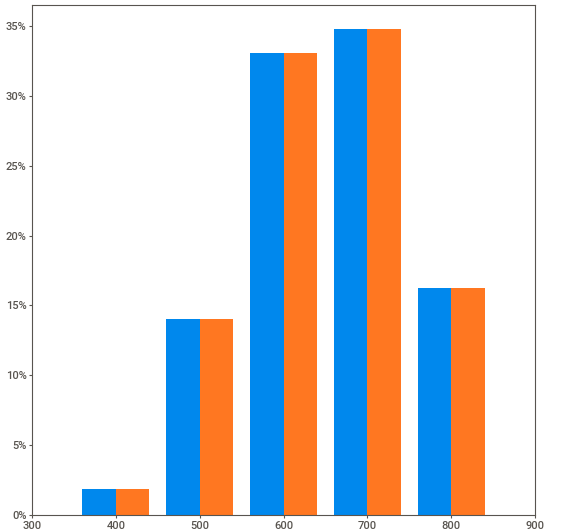
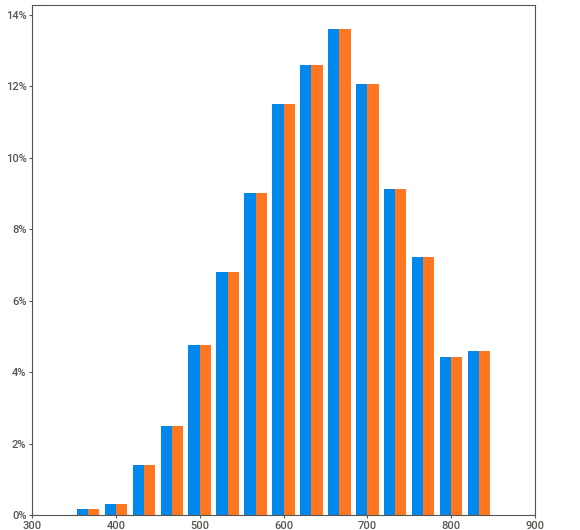
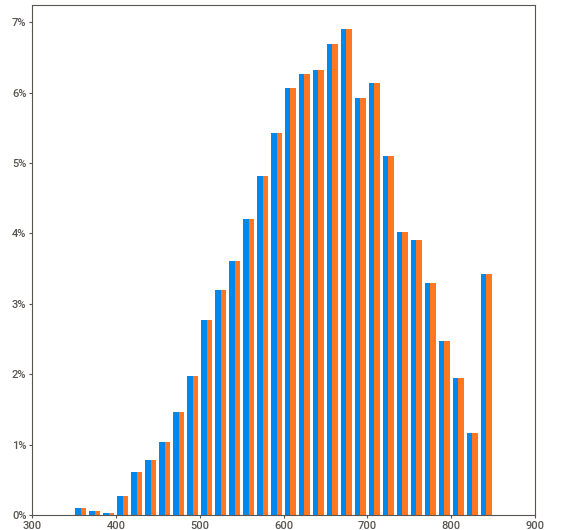
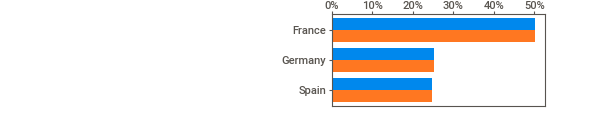
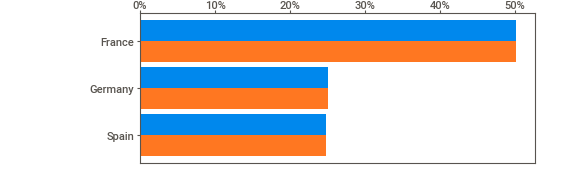
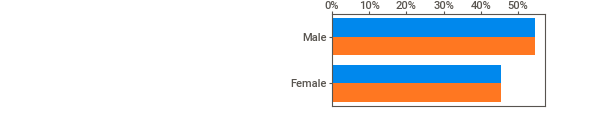
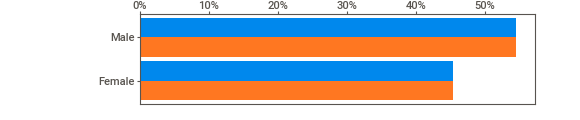
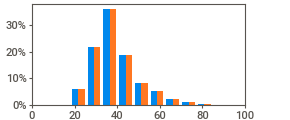
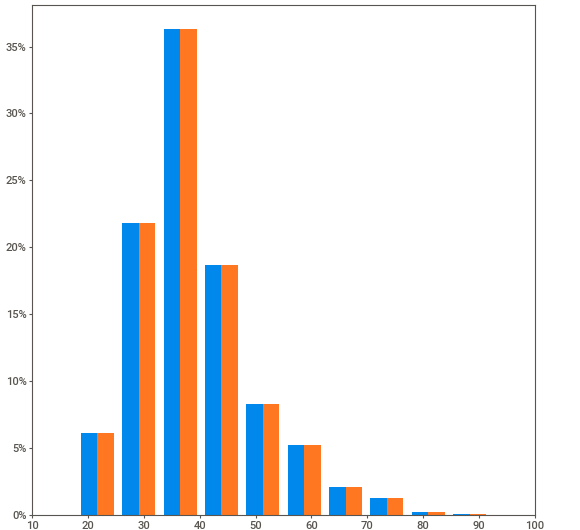
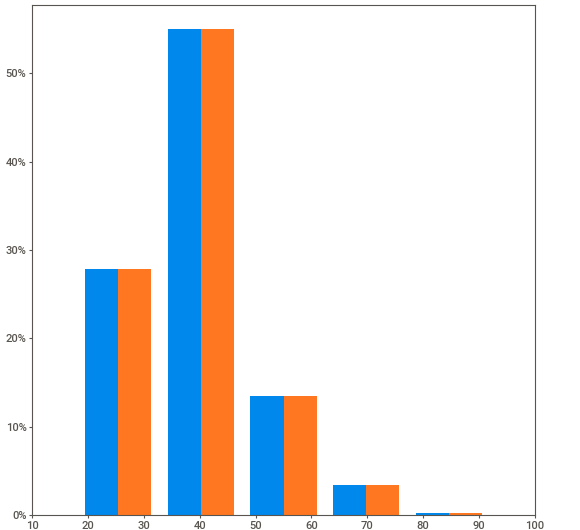
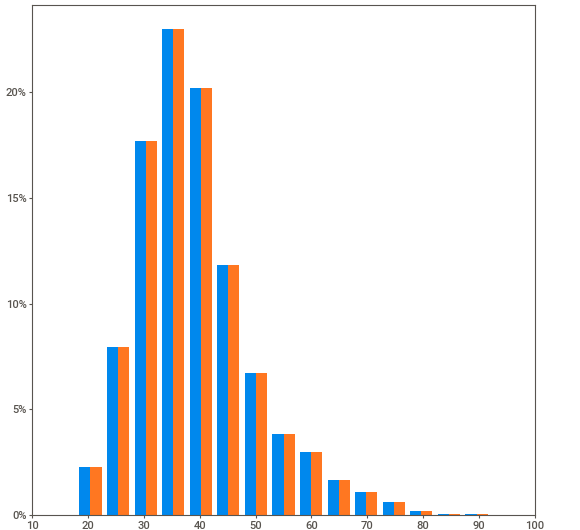
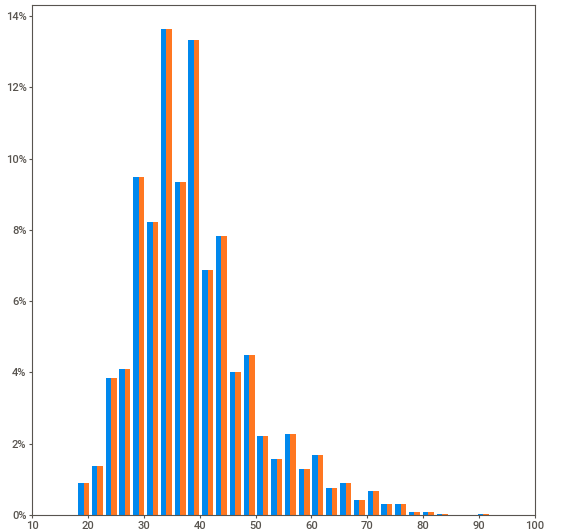
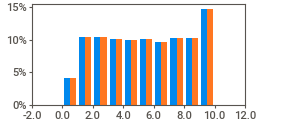
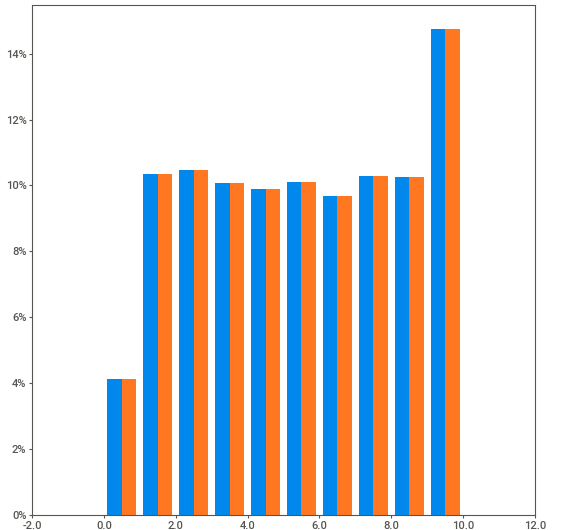
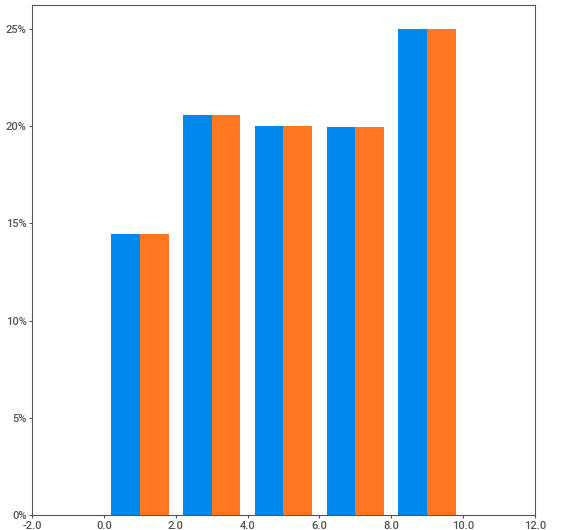
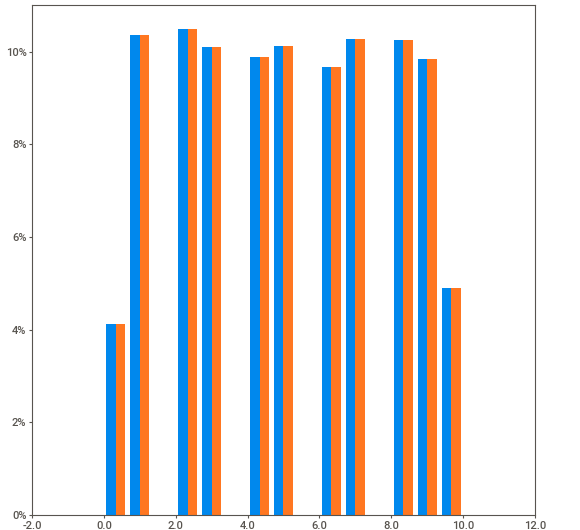
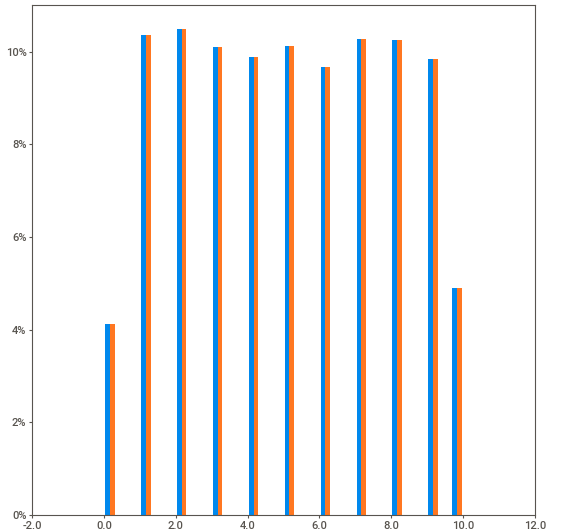
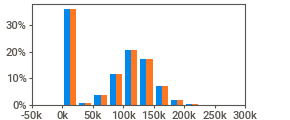
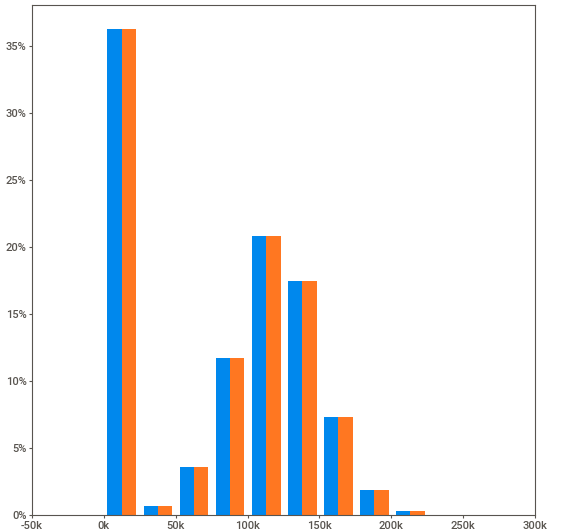
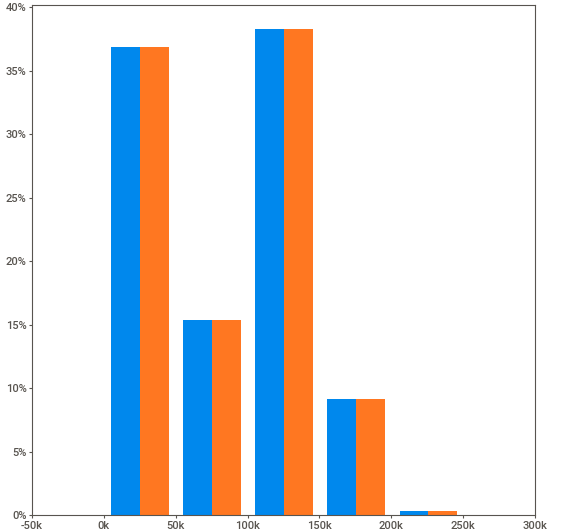
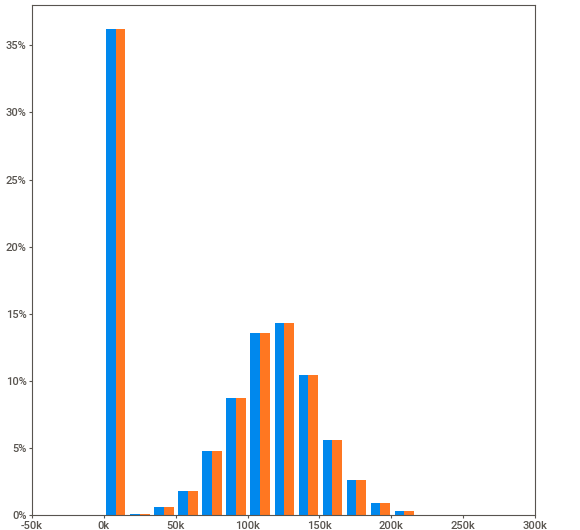
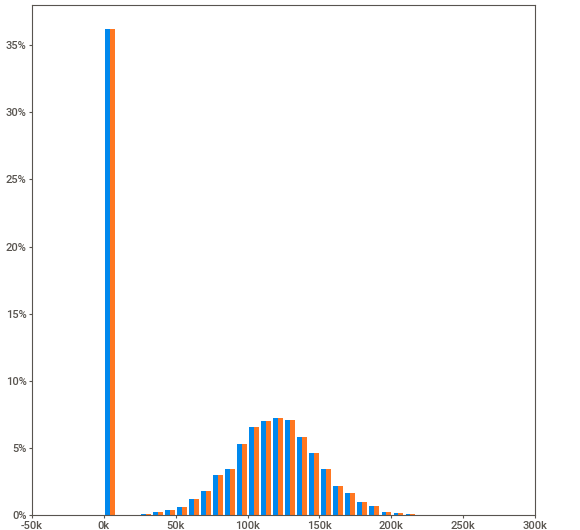
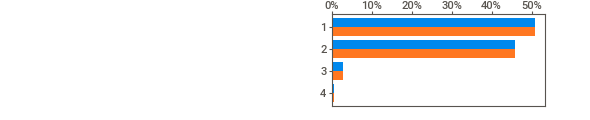
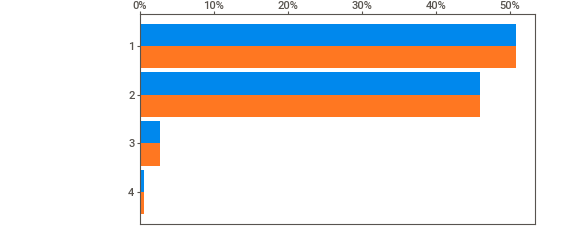
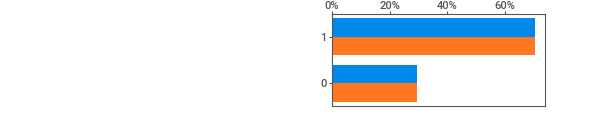
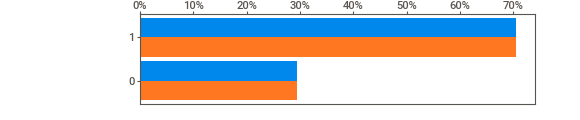
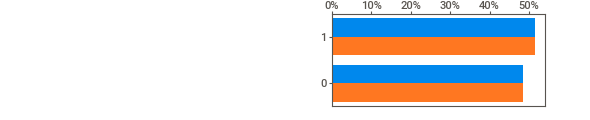
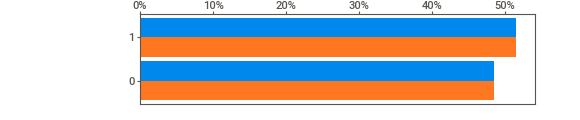
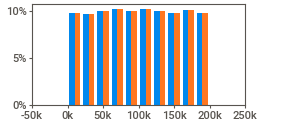
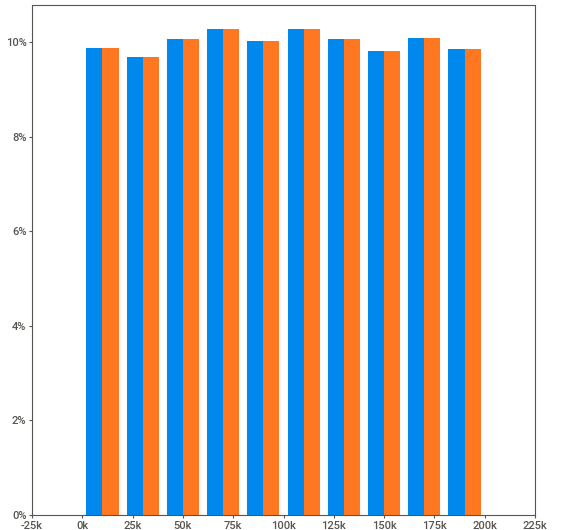
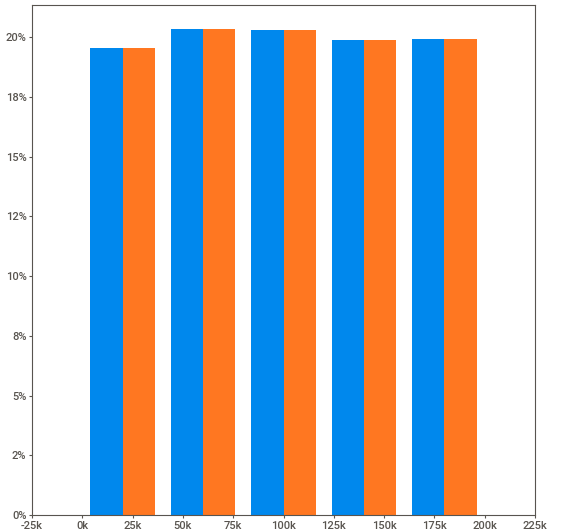
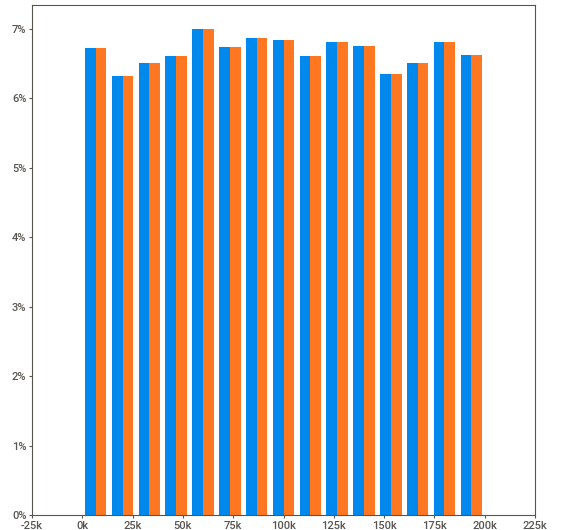
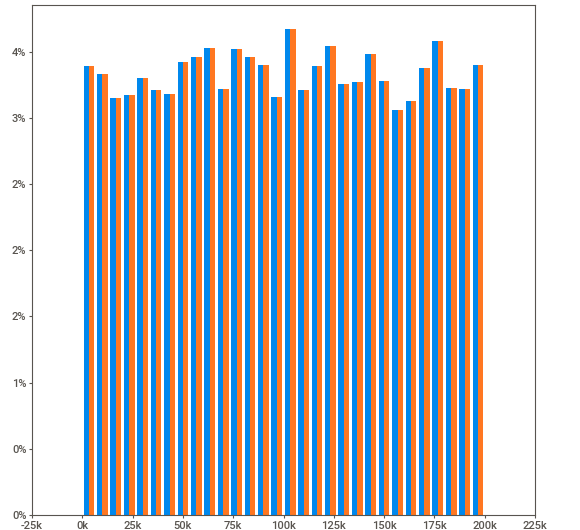
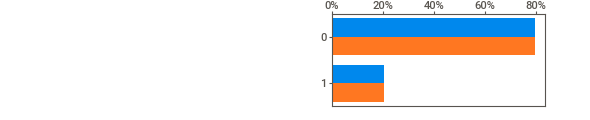
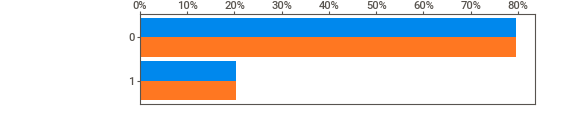
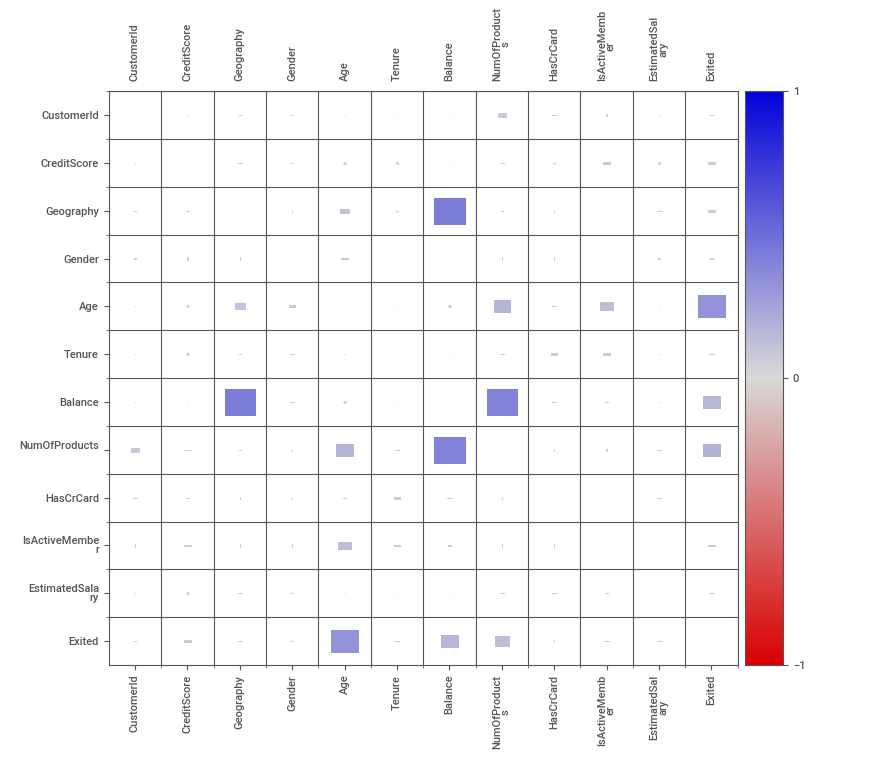
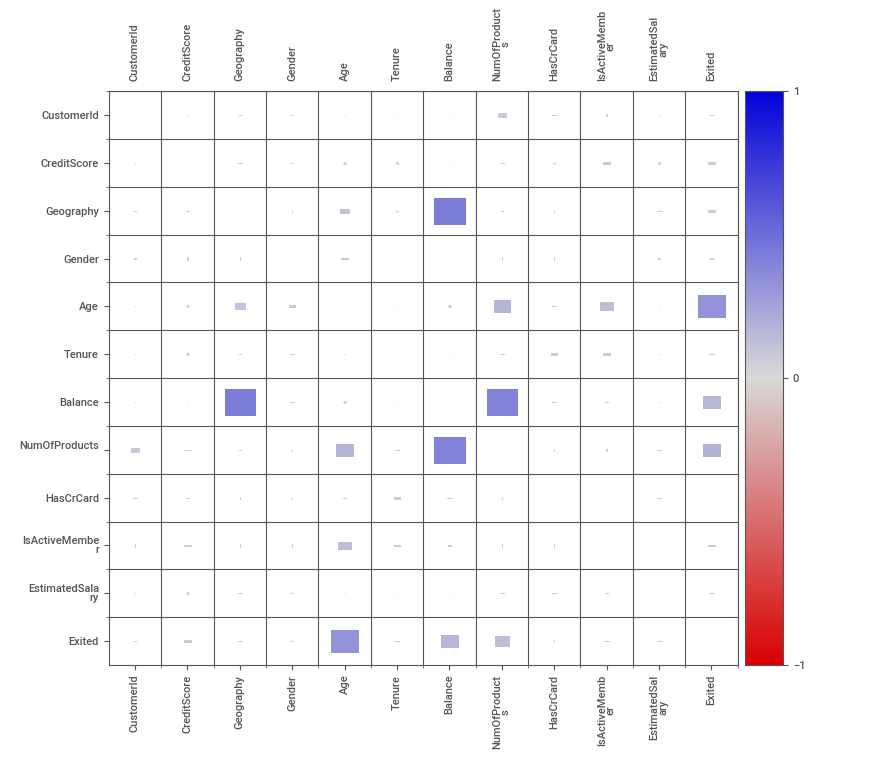

In [27]:
report = sv.compare([tips,"Original"],[tips_NA,"Ausentes"])
report.show_notebook()

Una de las técnicas utilizadas para lidar con datos faltantes es eliminar las filas que contienen un valor faltante, utilizando la función `.dropna ()`.

In [28]:
tips_removido = tips_NA.dropna()
report = sv.compare([tips,"Original"],[tips_removido,"Removido"])
report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)

TypeError: ignored

Otra de las técnicas utilizadas para lidar con datos faltantes es inputar las filas que contienen un valor perdido, utilizando la función `.fillna()`.

                                             |          | [  0%]   00:00 -> (? left)


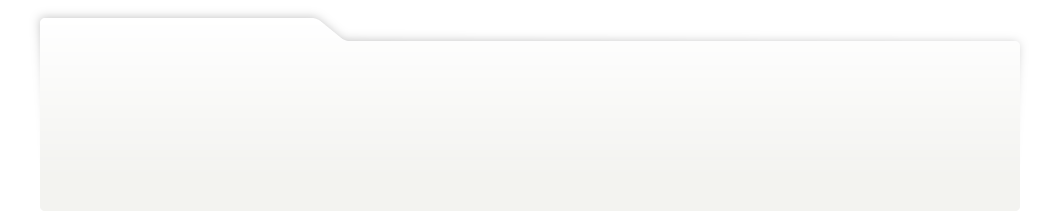
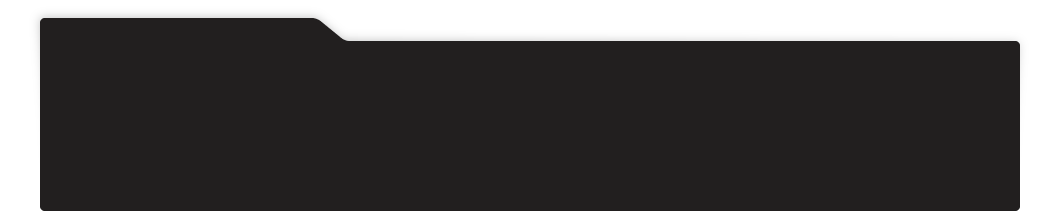
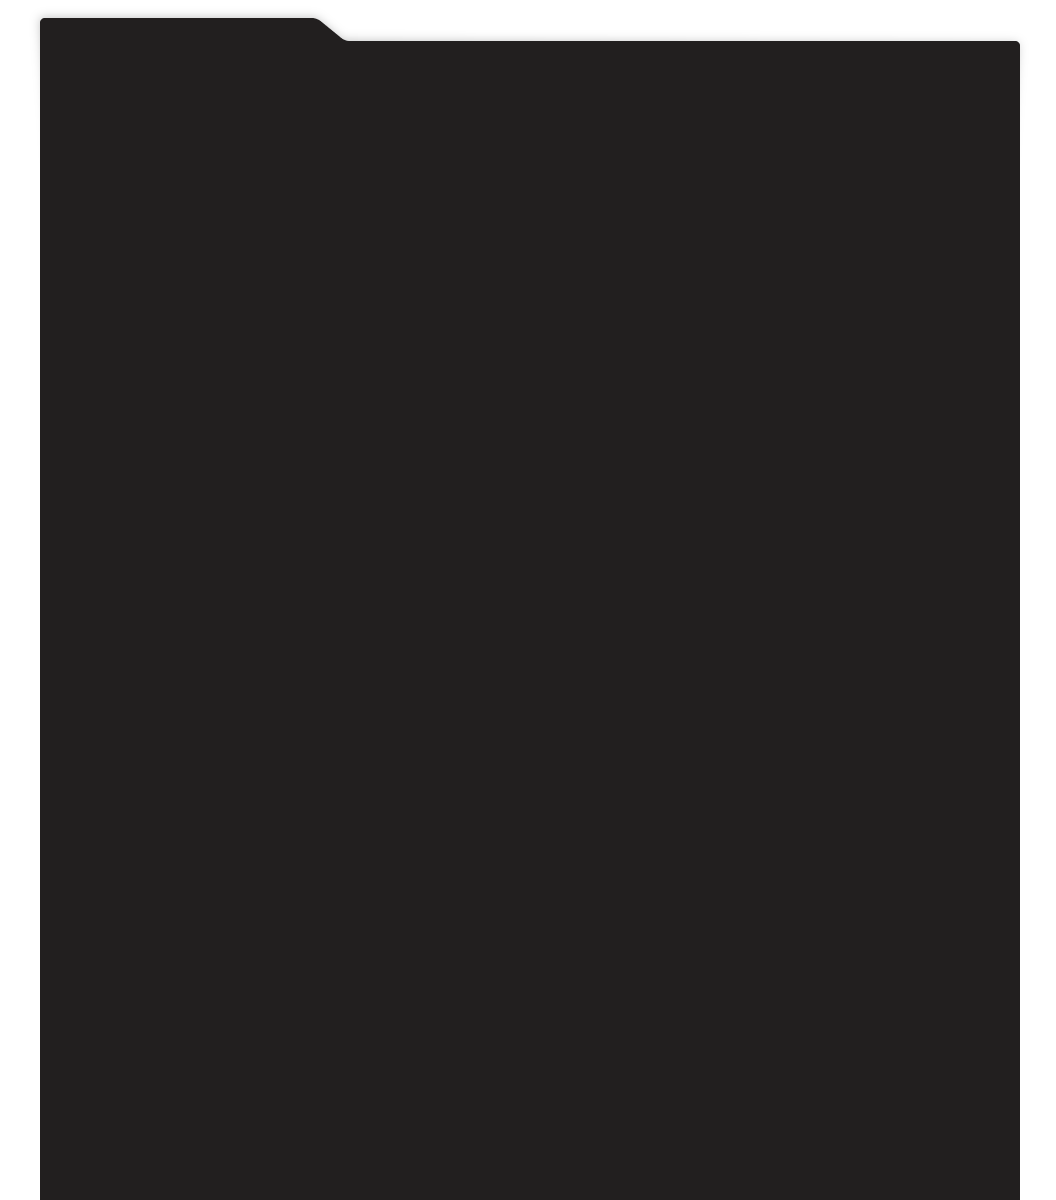
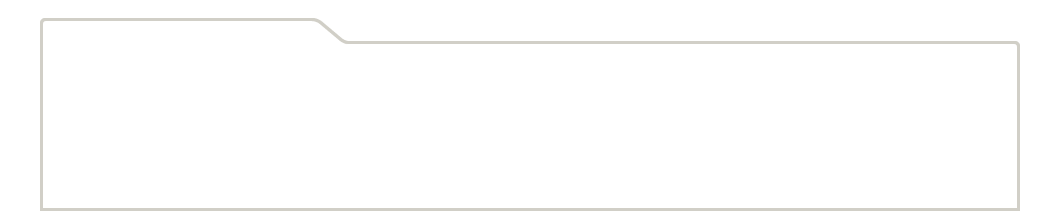
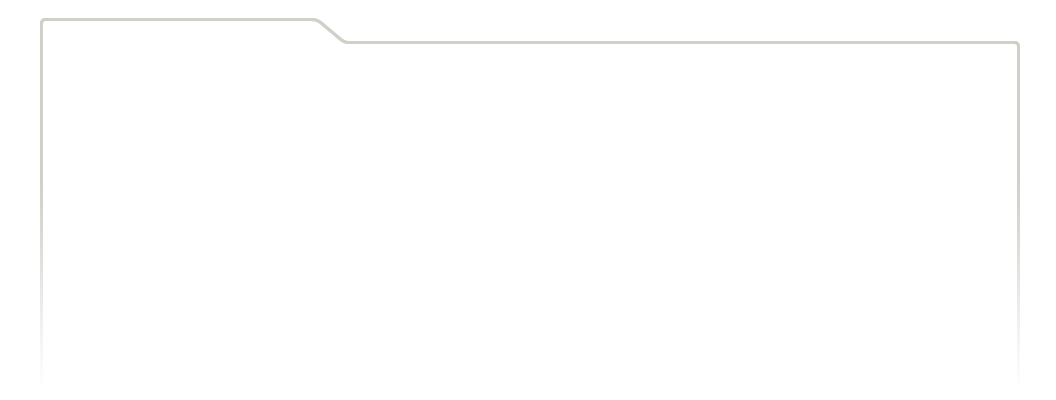
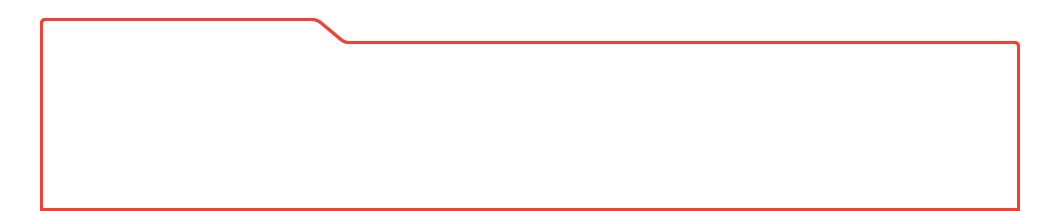
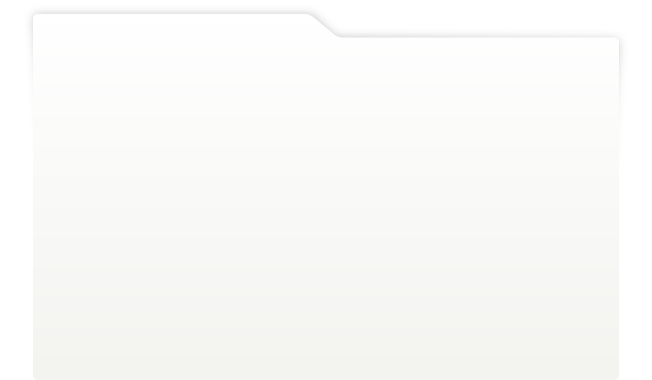
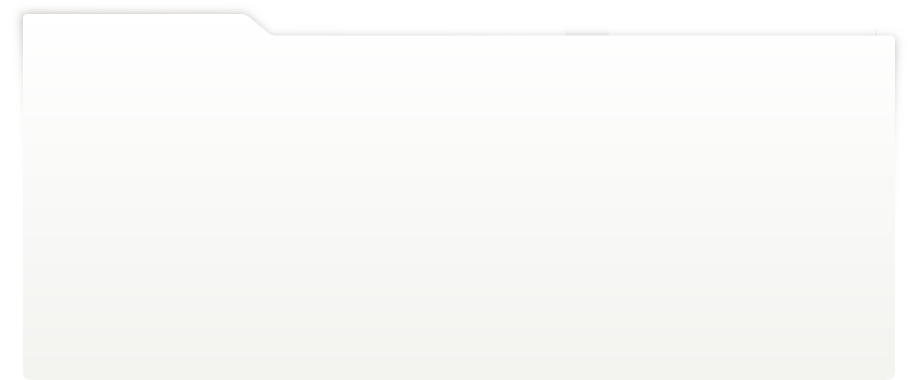
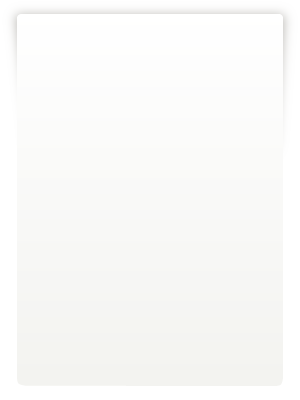
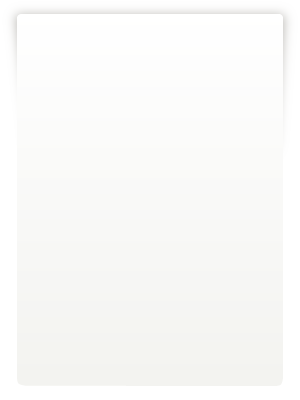
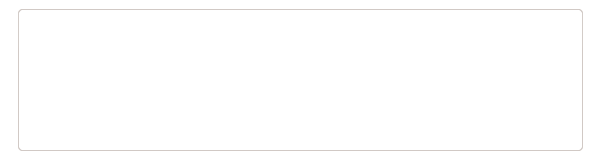
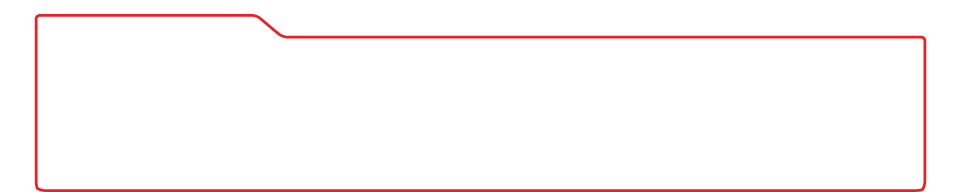
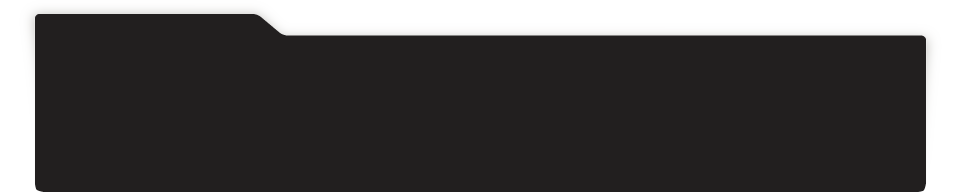
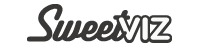
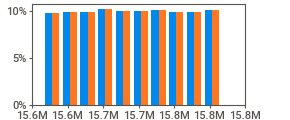
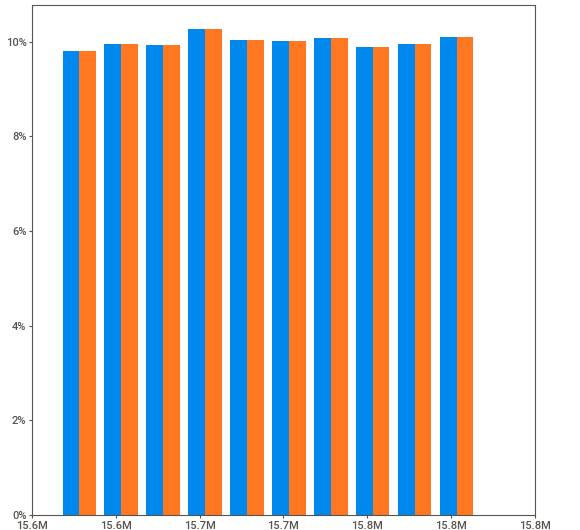
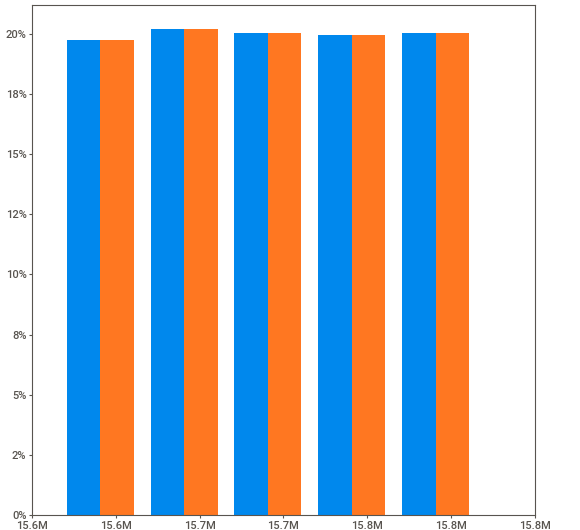
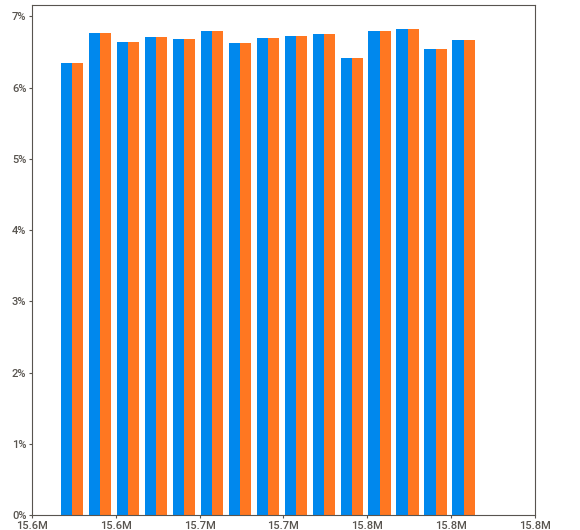
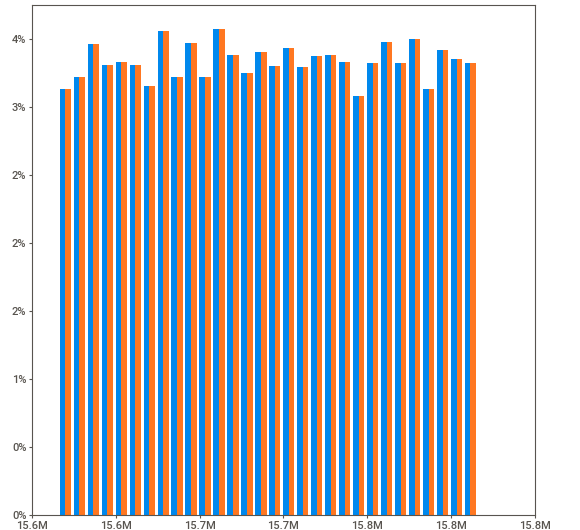
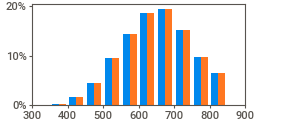
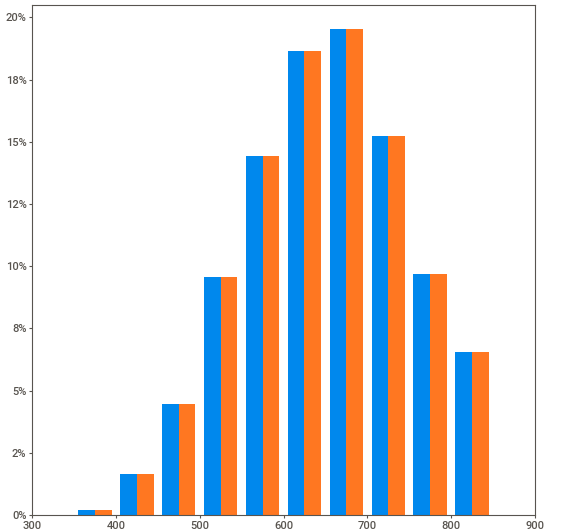
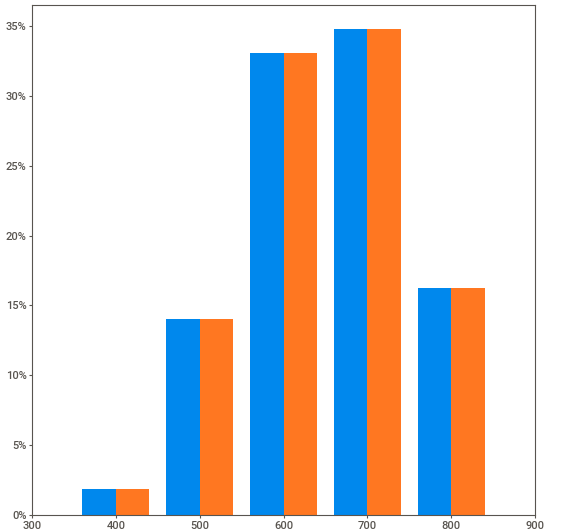
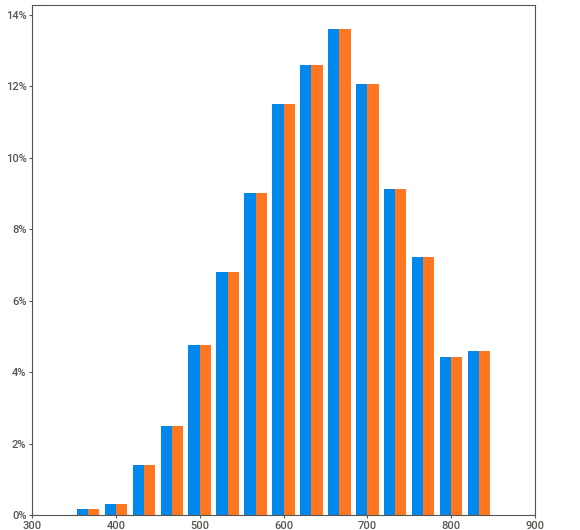
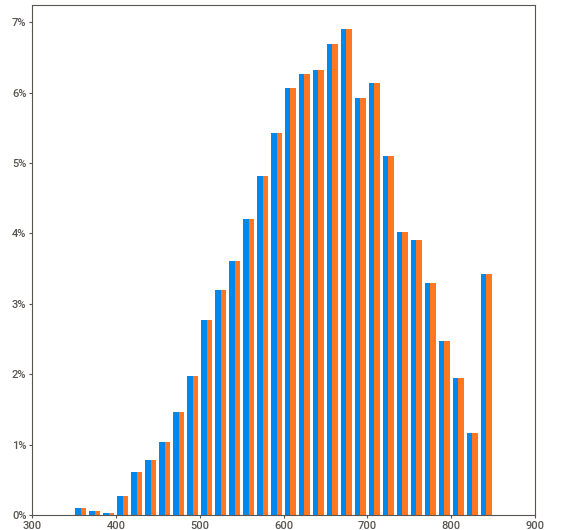
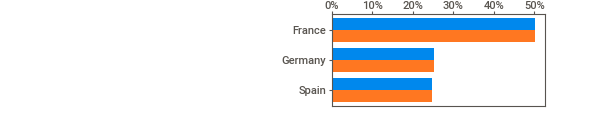
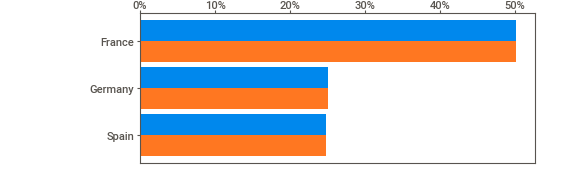
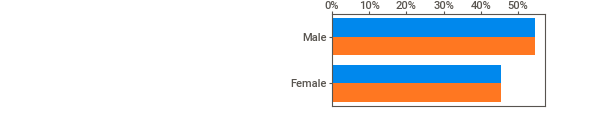
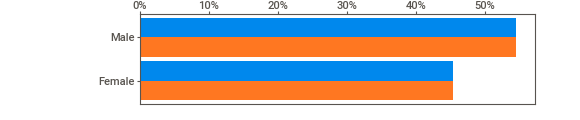
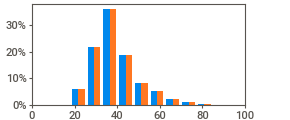
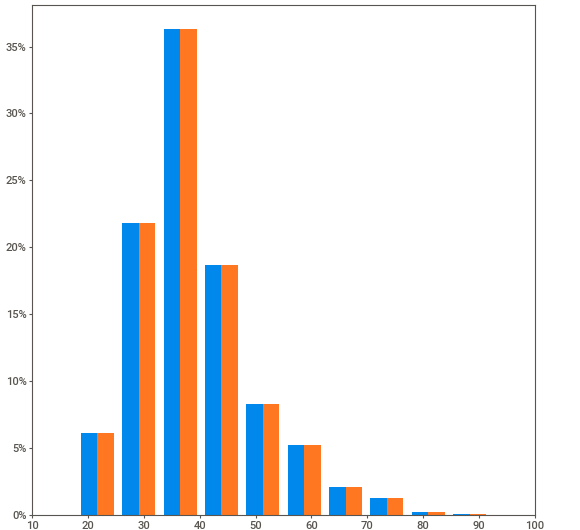
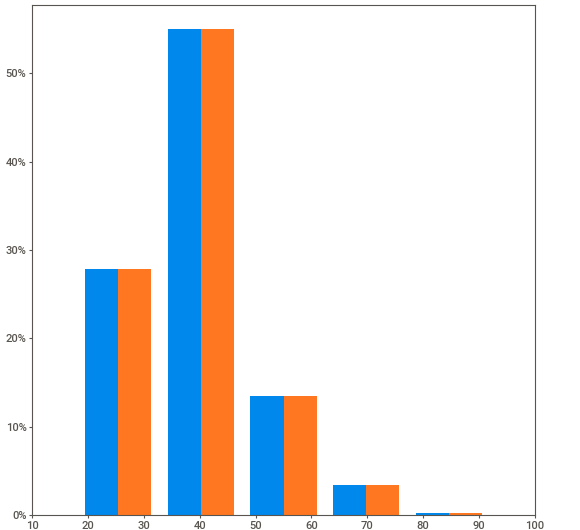
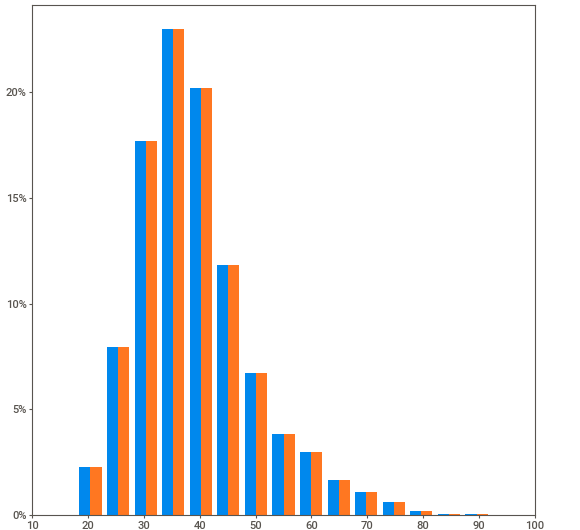
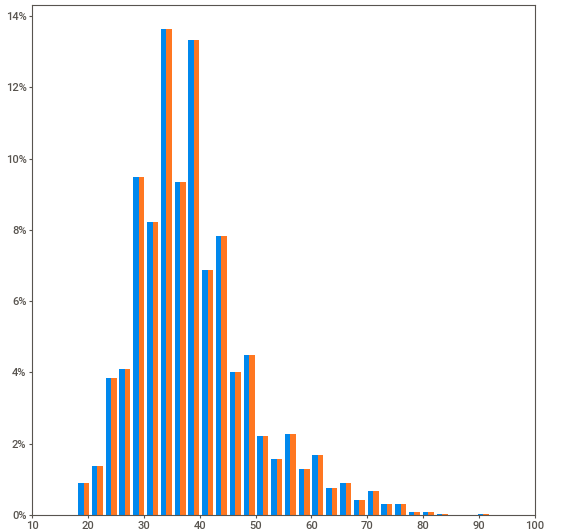
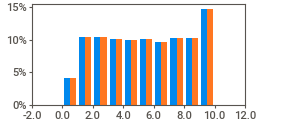
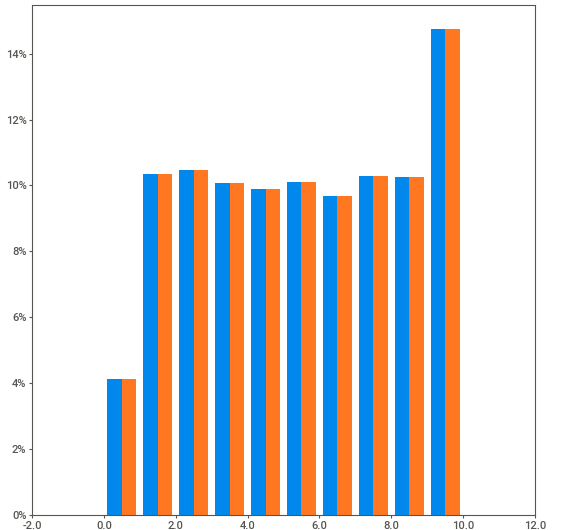
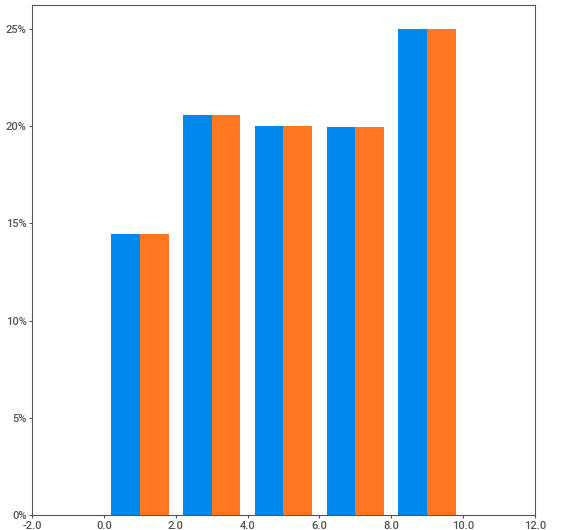
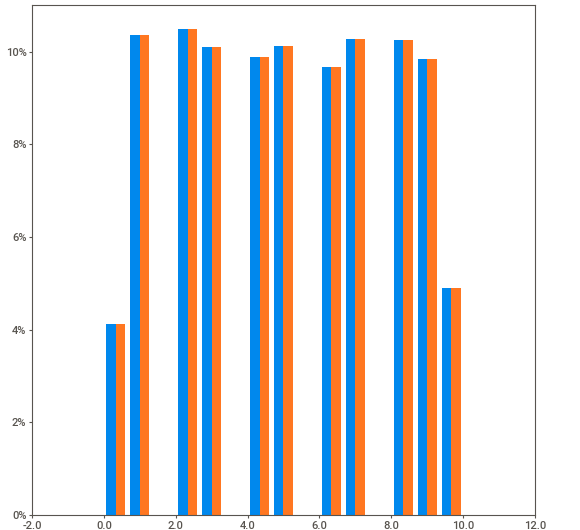
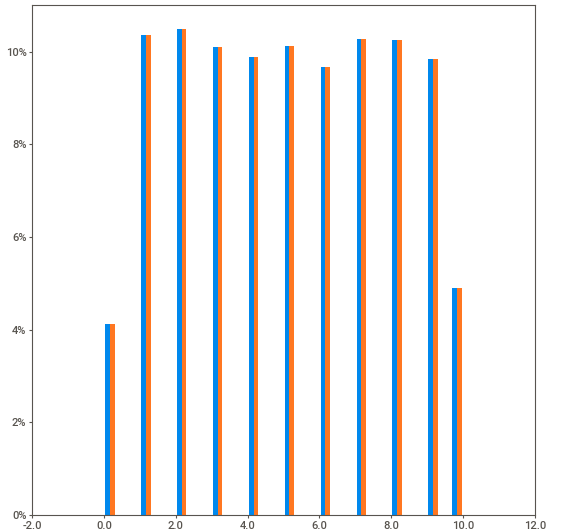
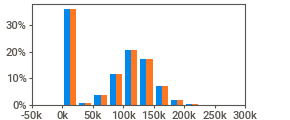
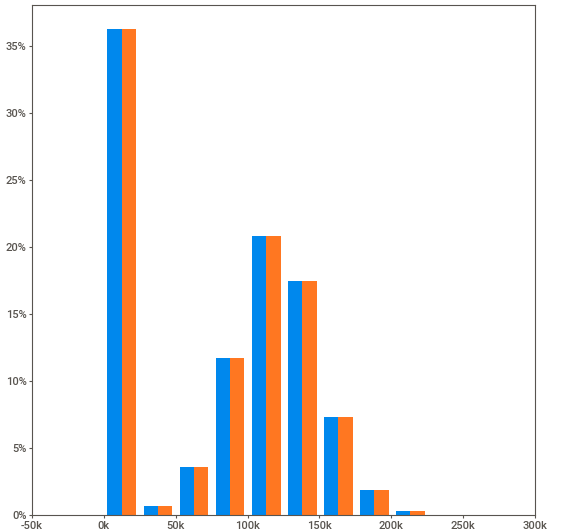
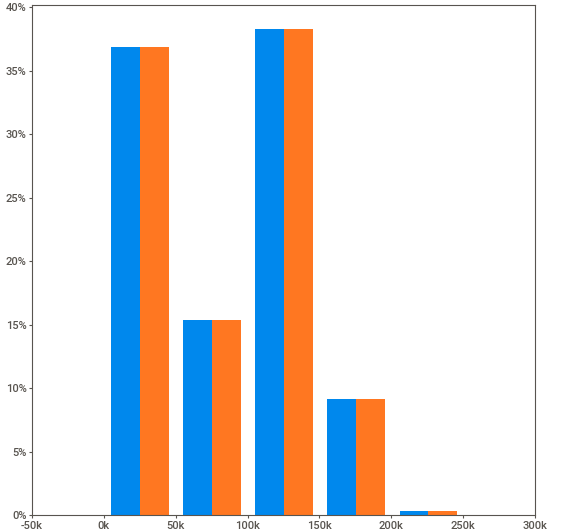
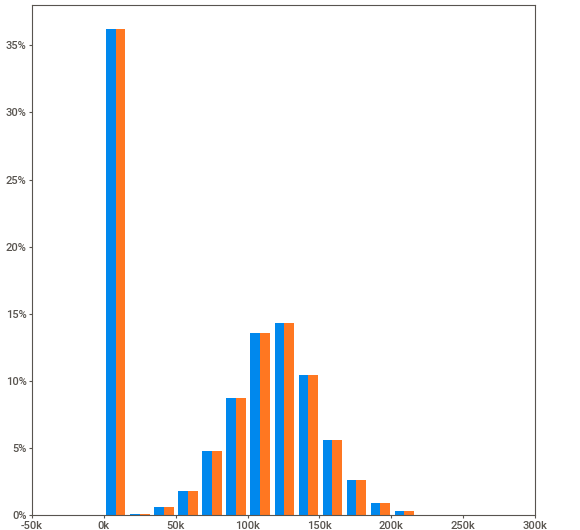
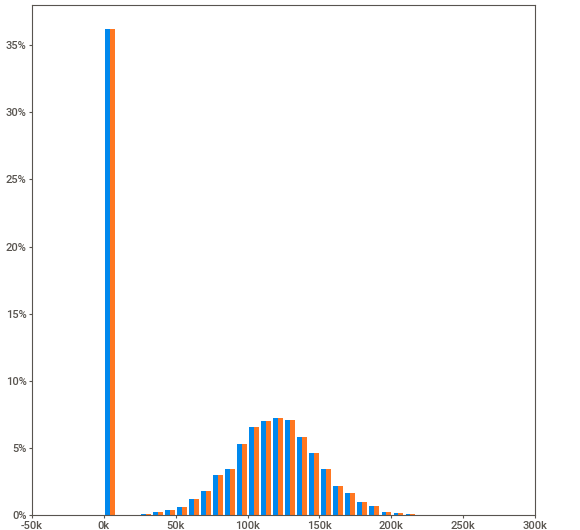
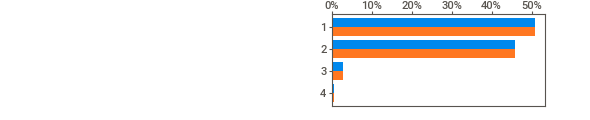
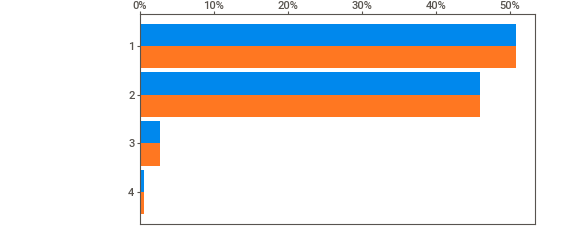
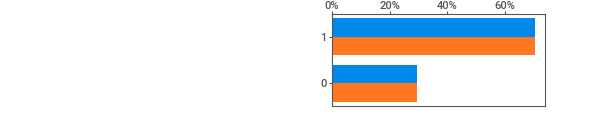
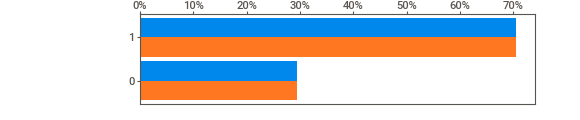
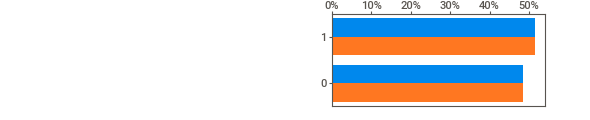
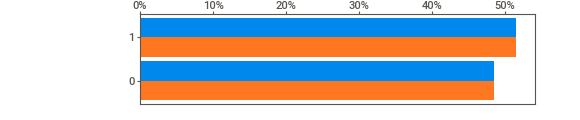
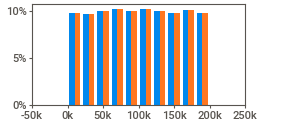
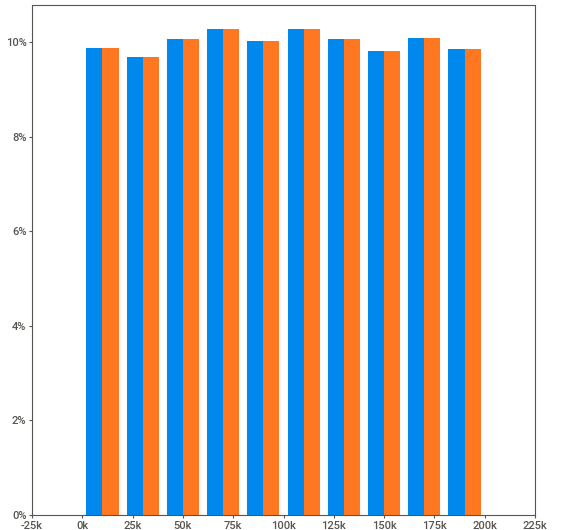
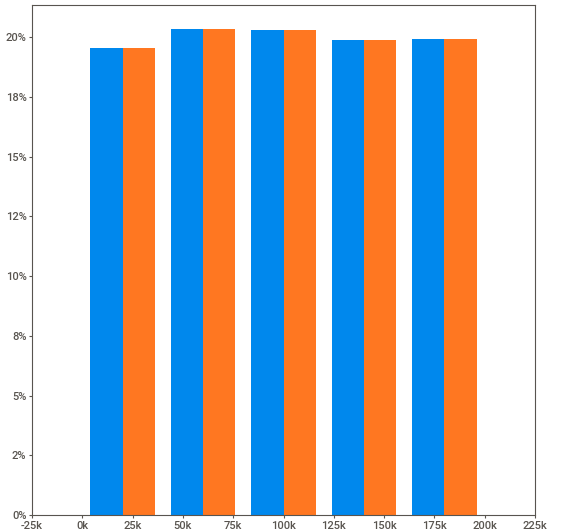
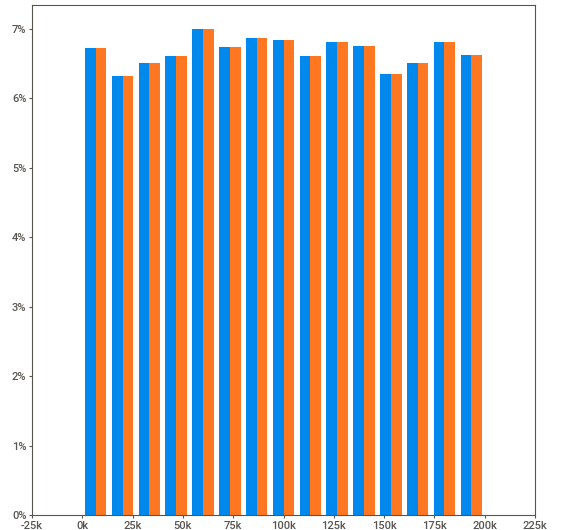
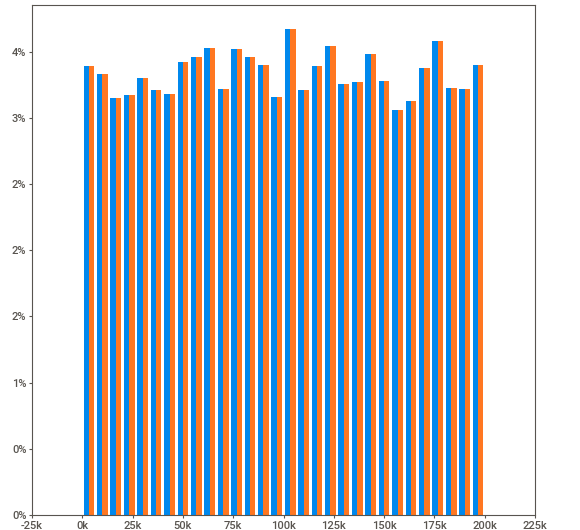
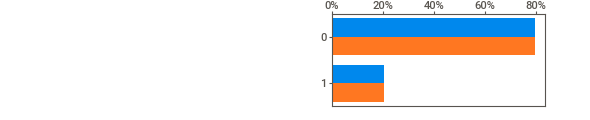
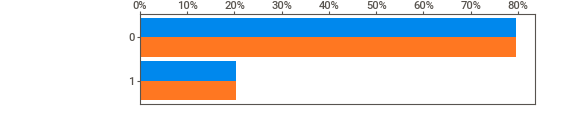
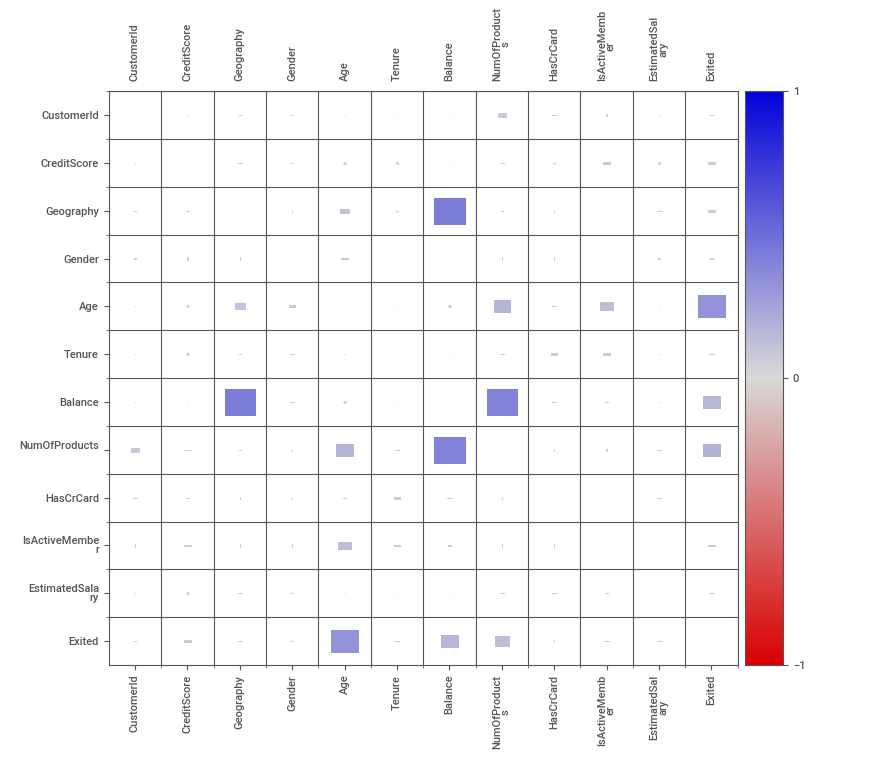
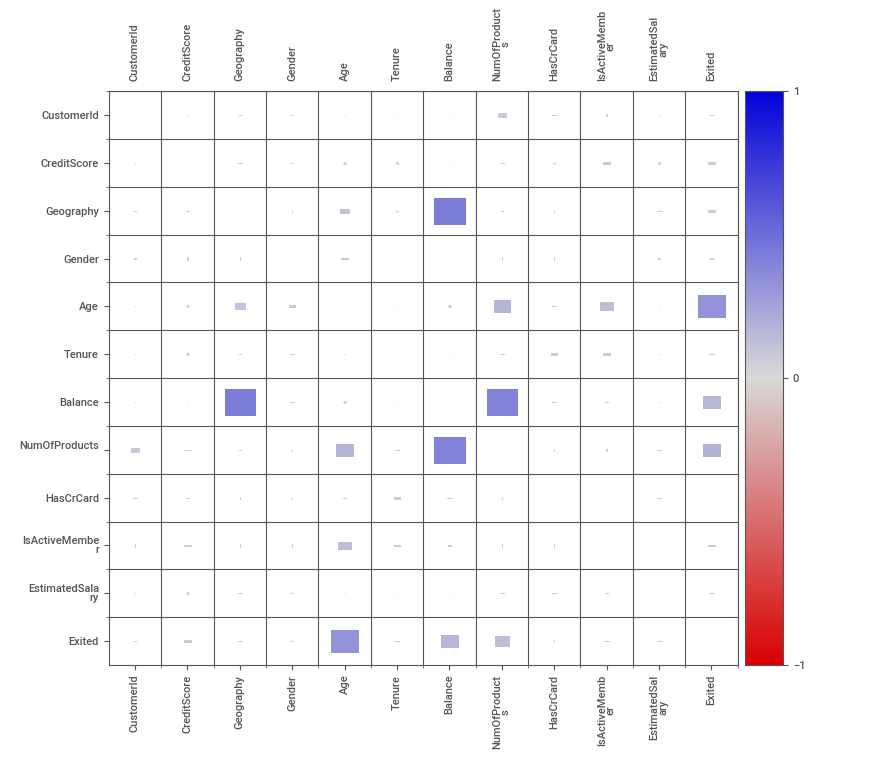

In [29]:
tips_input = tips_NA.fillna(tips_NA.median())
report = sv.compare([tips,"Original"],[tips_input,"Inputado"])
report.show_notebook() 

Datos faltantes con prioridad en las mesas para fumadores

In [ ]:
#crear una columnas de probabilidades, al inicio todos con probabilidad 1
p = np.ones(len(tips['smoker']))
# escojer la probabilidad de 0.5 para mesas de no fumadores
p[np.where(tips['smoker']=='No')] = 0.5
#calcular la probabilidad par cada item del dat set
p = p/sum(p)

In [ ]:
p

array([0.00296736, 0.00296736, 0.00296736, 0.00296736, 0.00296736,
       0.00296736, 0.00296736, 0.00296736, 0.00296736, 0.00296736,
       0.00296736, 0.00296736, 0.00296736, 0.00296736, 0.00296736,
       0.00296736, 0.00296736, 0.00296736, 0.00296736, 0.00296736,
       0.00296736, 0.00296736, 0.00296736, 0.00296736, 0.00296736,
       0.00296736, 0.00296736, 0.00296736, 0.00296736, 0.00296736,
       0.00296736, 0.00296736, 0.00296736, 0.00296736, 0.00296736,
       0.00296736, 0.00296736, 0.00296736, 0.00296736, 0.00296736,
       0.00296736, 0.00296736, 0.00296736, 0.00296736, 0.00296736,
       0.00296736, 0.00296736, 0.00296736, 0.00296736, 0.00296736,
       0.00296736, 0.00296736, 0.00296736, 0.00296736, 0.00296736,
       0.00296736, 0.00593472, 0.00296736, 0.00593472, 0.00296736,
       0.00593472, 0.00593472, 0.00593472, 0.00593472, 0.00296736,
       0.00296736, 0.00296736, 0.00593472, 0.00296736, 0.00593472,
       0.00296736, 0.00296736, 0.00593472, 0.00593472, 0.00296

In [ ]:
tips_NA2 = tips.copy()
sample = np.random.choice(list(tips_NA2.index),int(len(tips)*0.2), p = p)
tips_NA2.loc[sample,['total_bill','tip']] = np.nan

                                             |          | [  0%]   00:00 -> (? left)


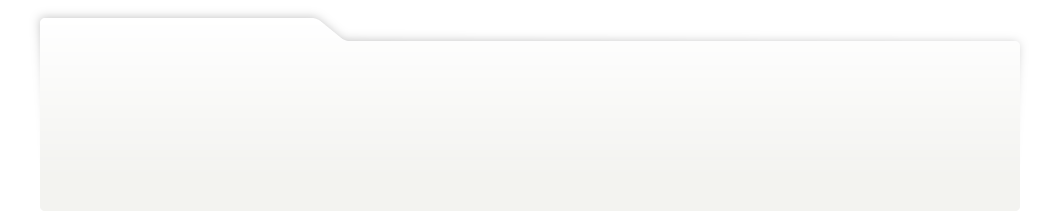
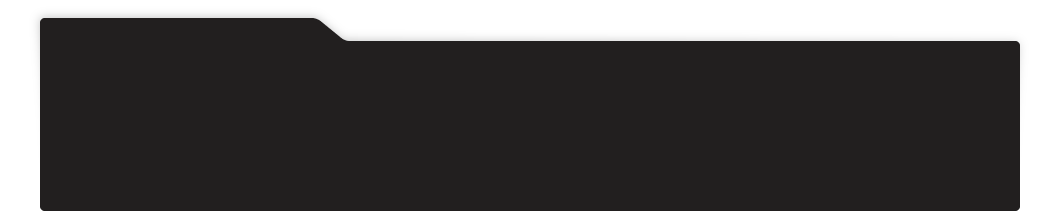
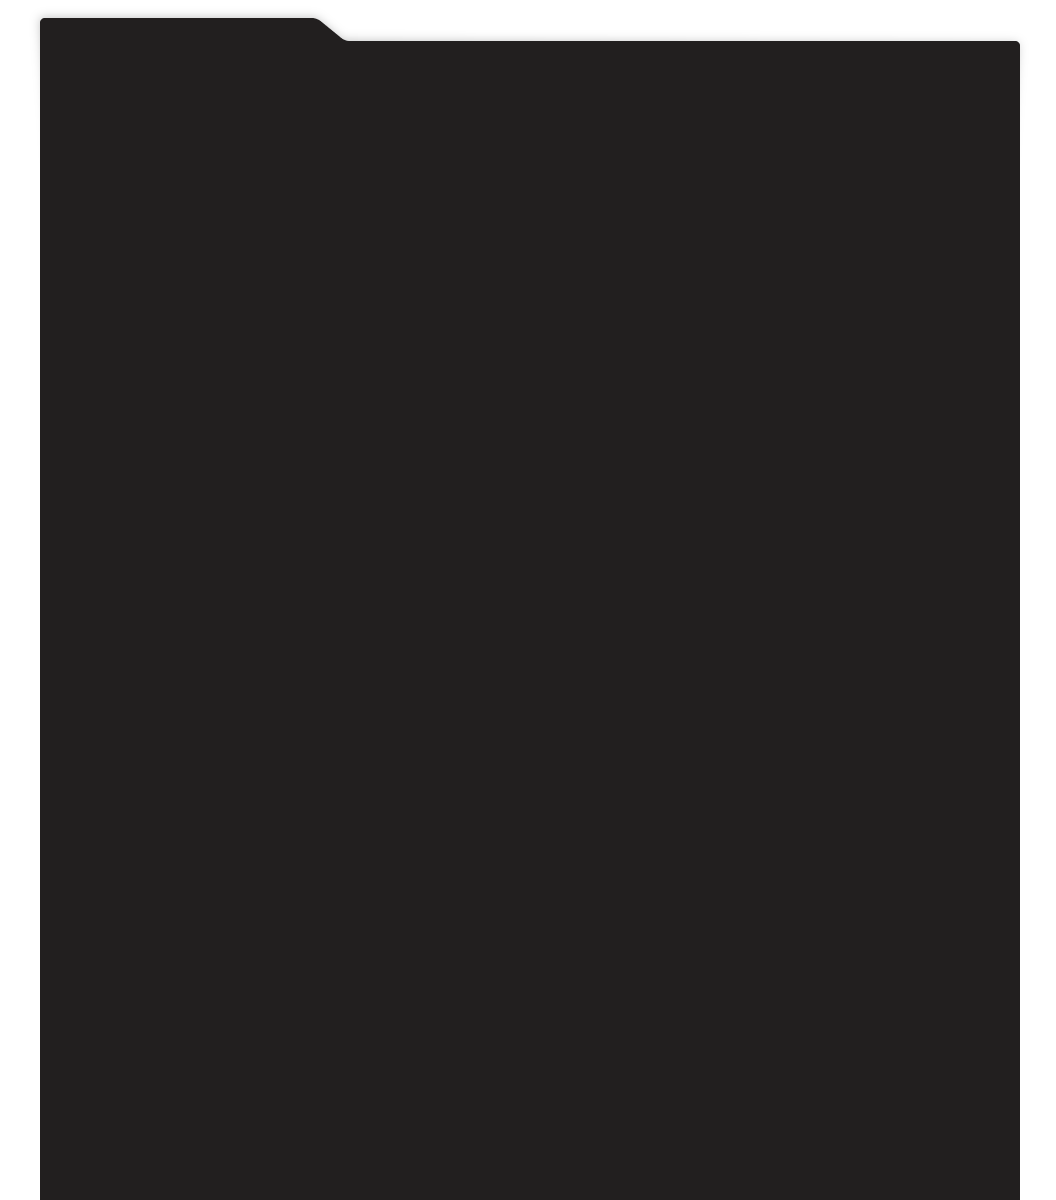
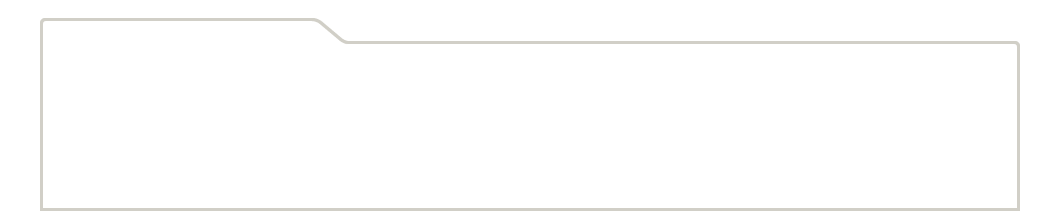
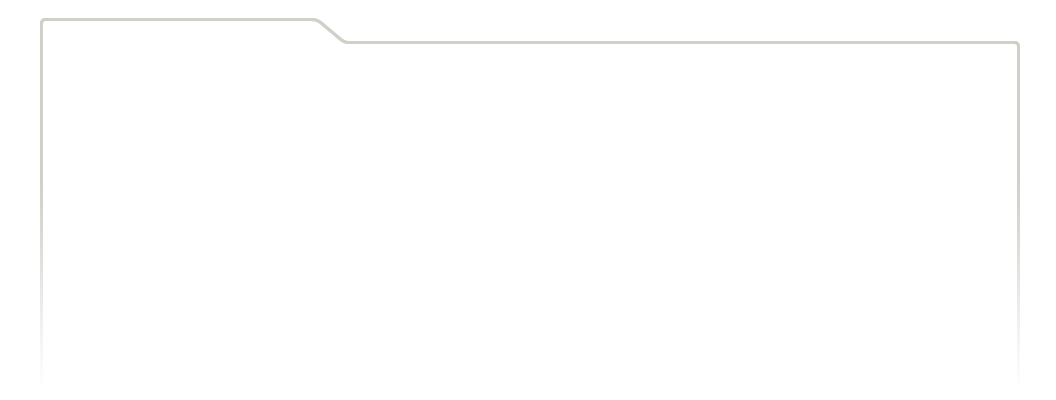
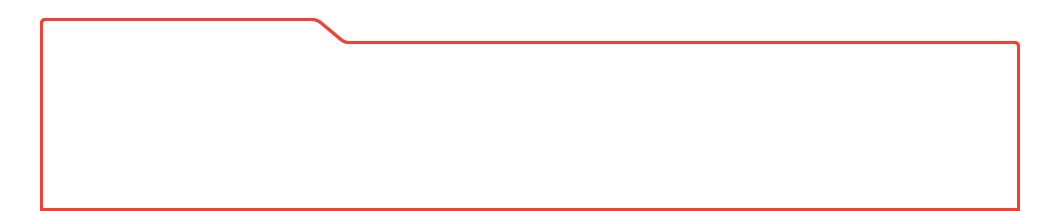
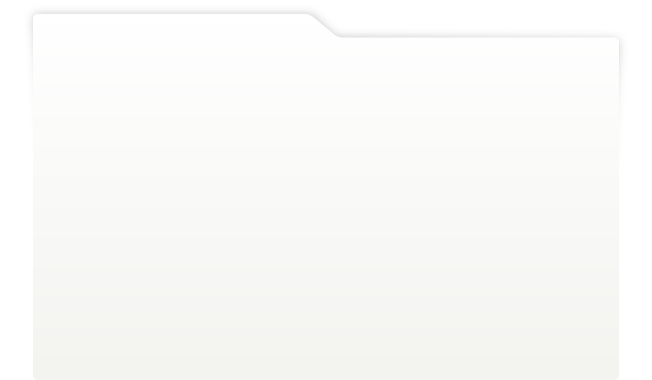
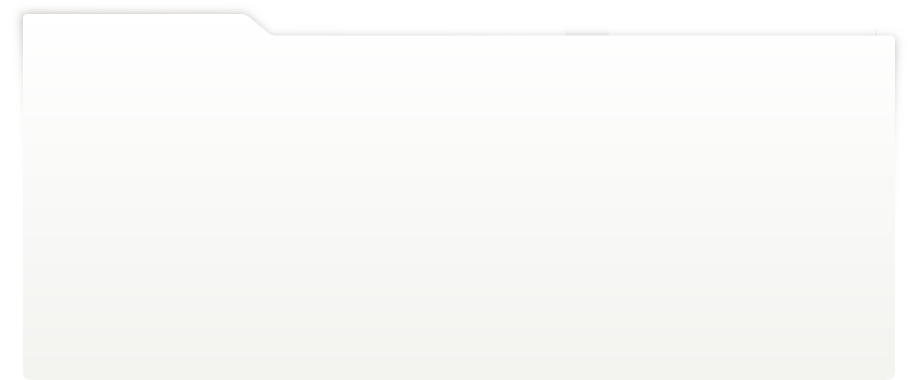
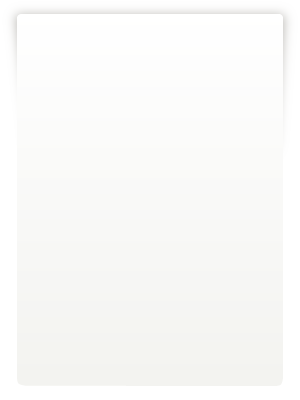
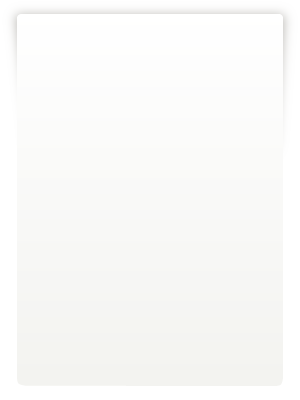
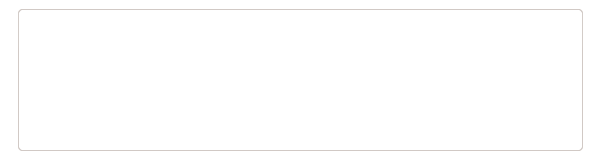
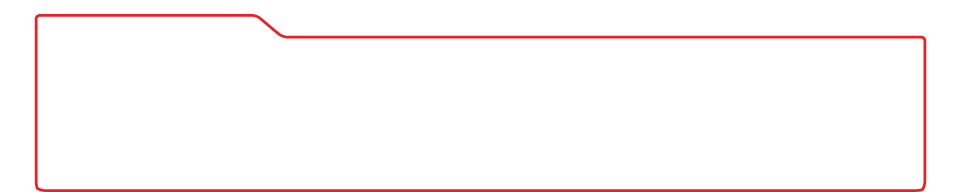
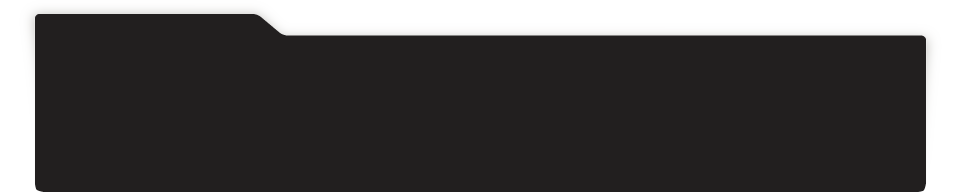
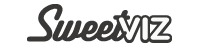
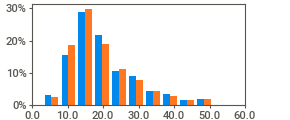
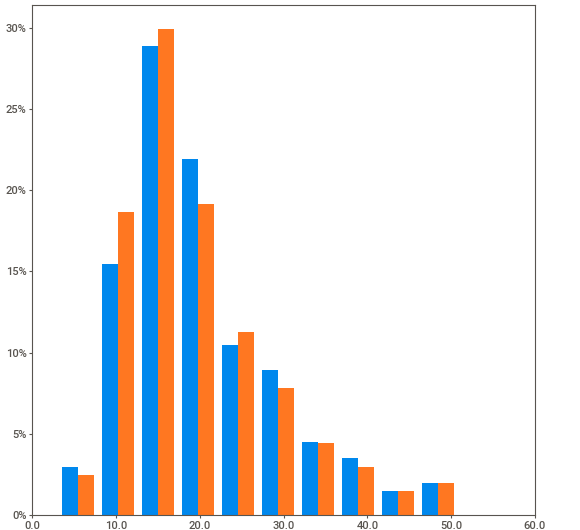
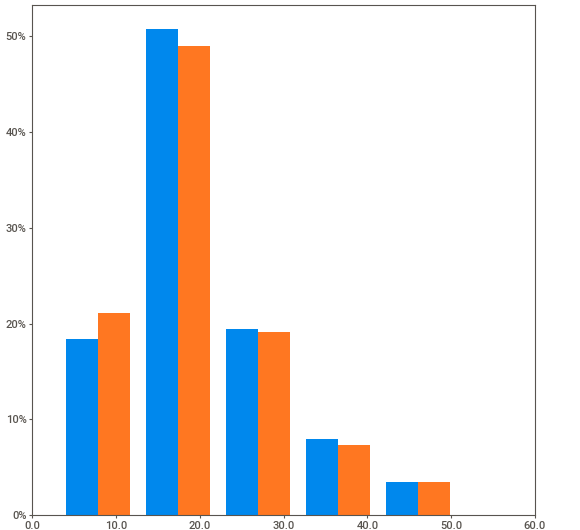
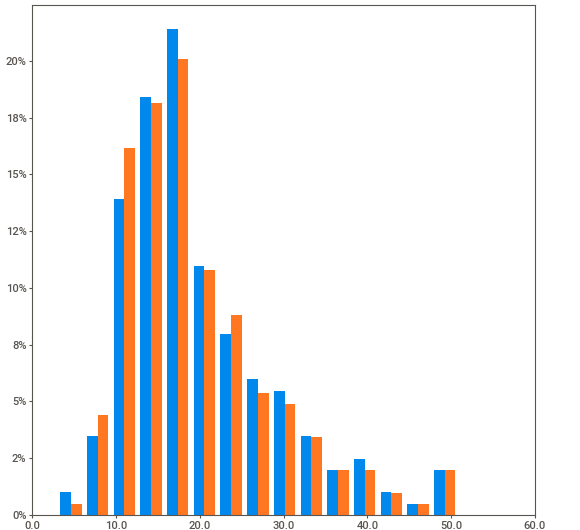
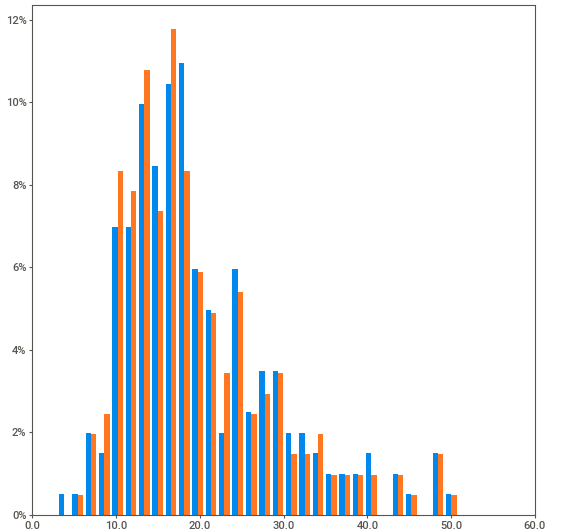
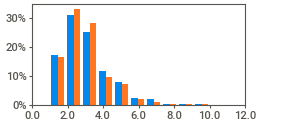
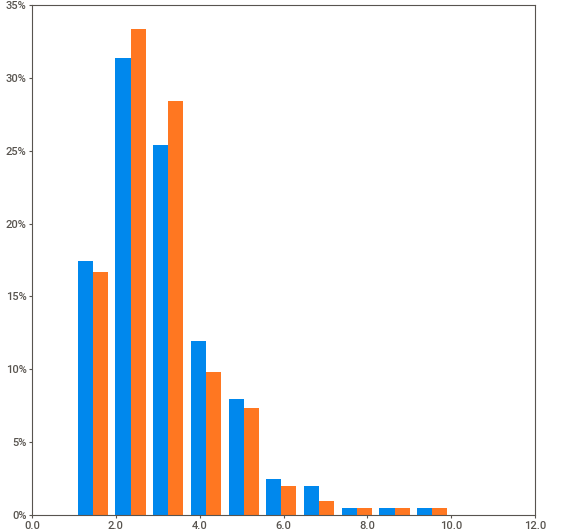
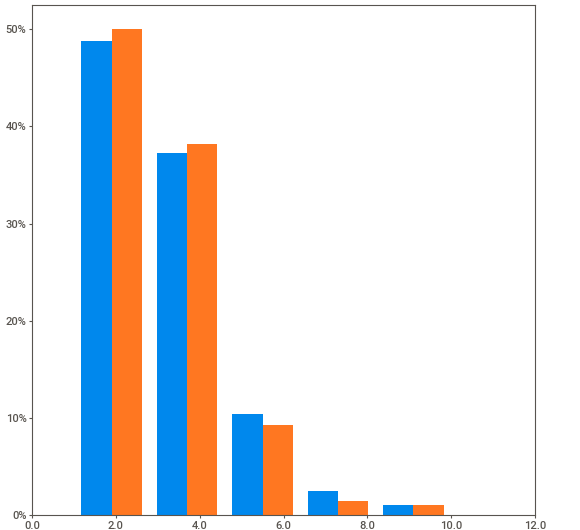
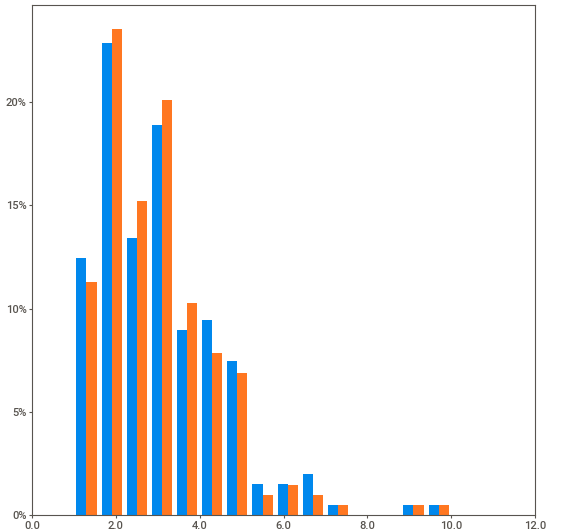
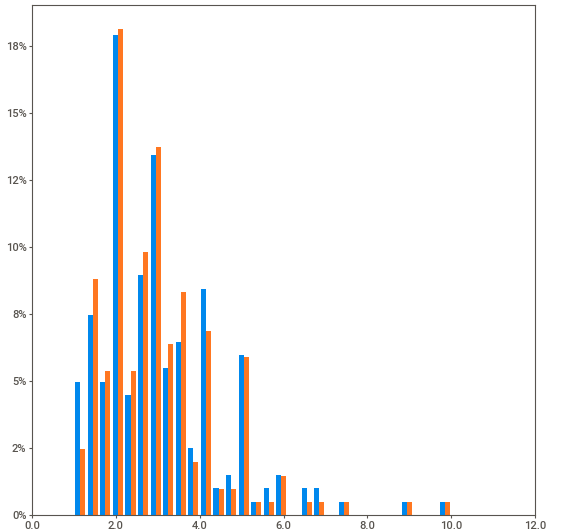
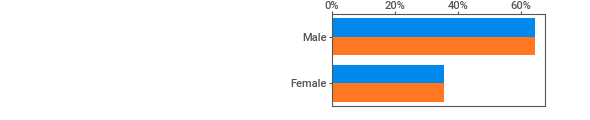
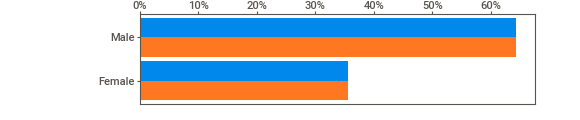
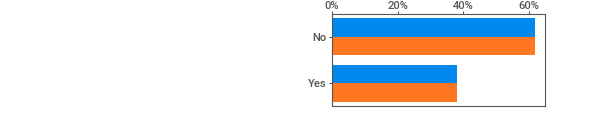
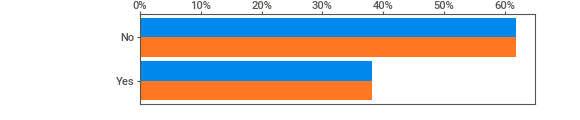
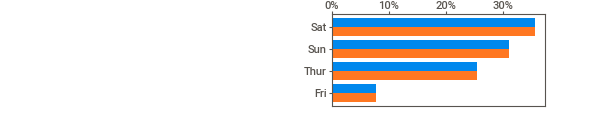
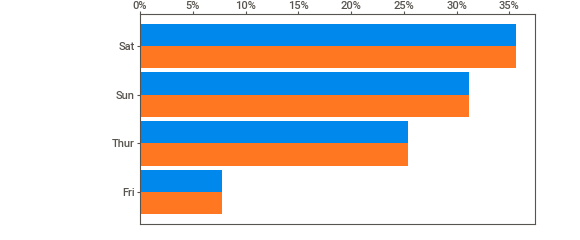
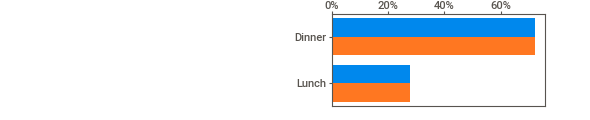
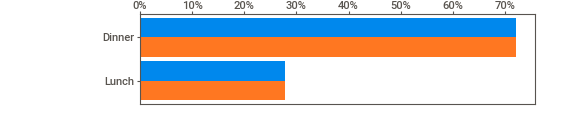
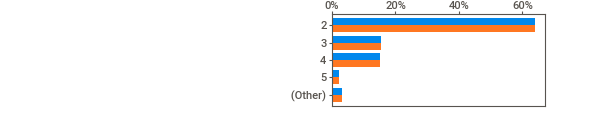
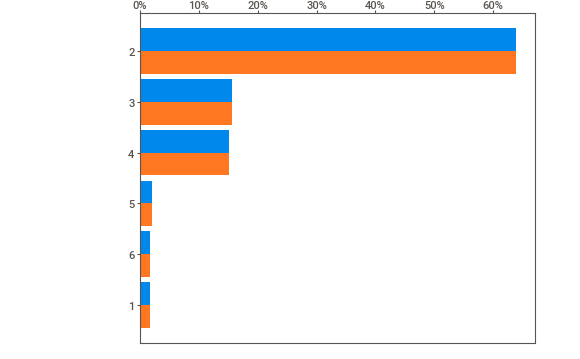
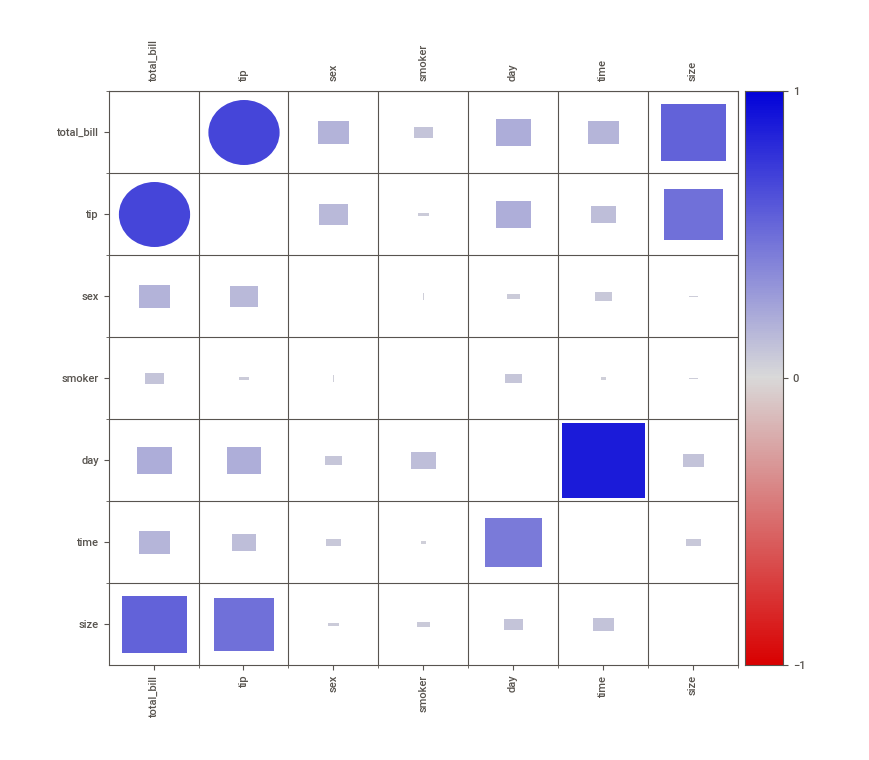
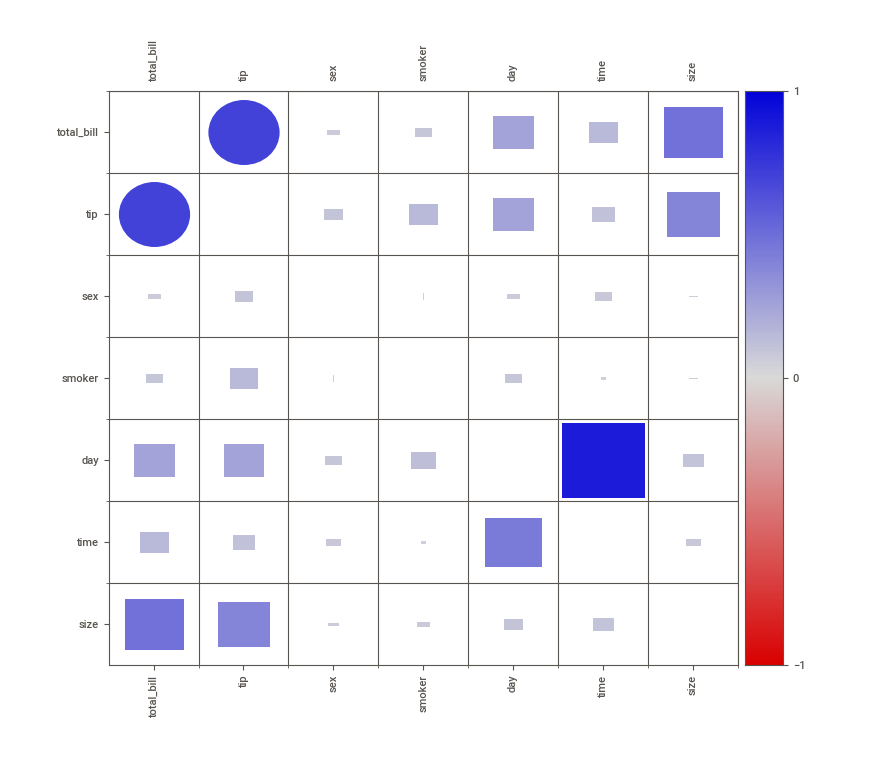

In [ ]:
report = sv.compare([tips_NA,"MCAR"],[tips_NA2,"MAR"])
report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


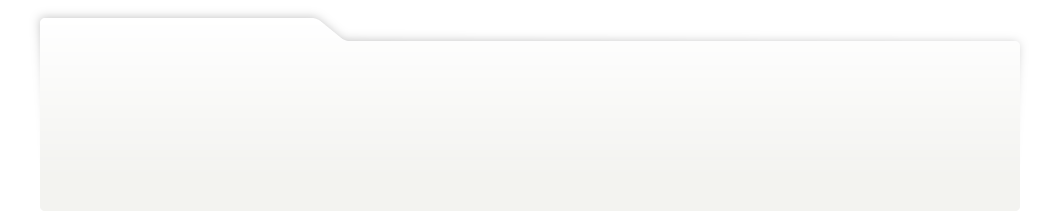
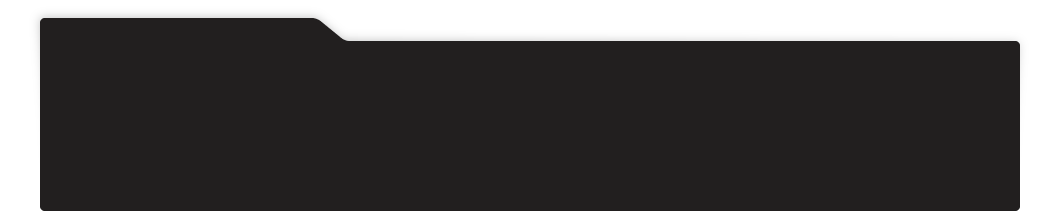
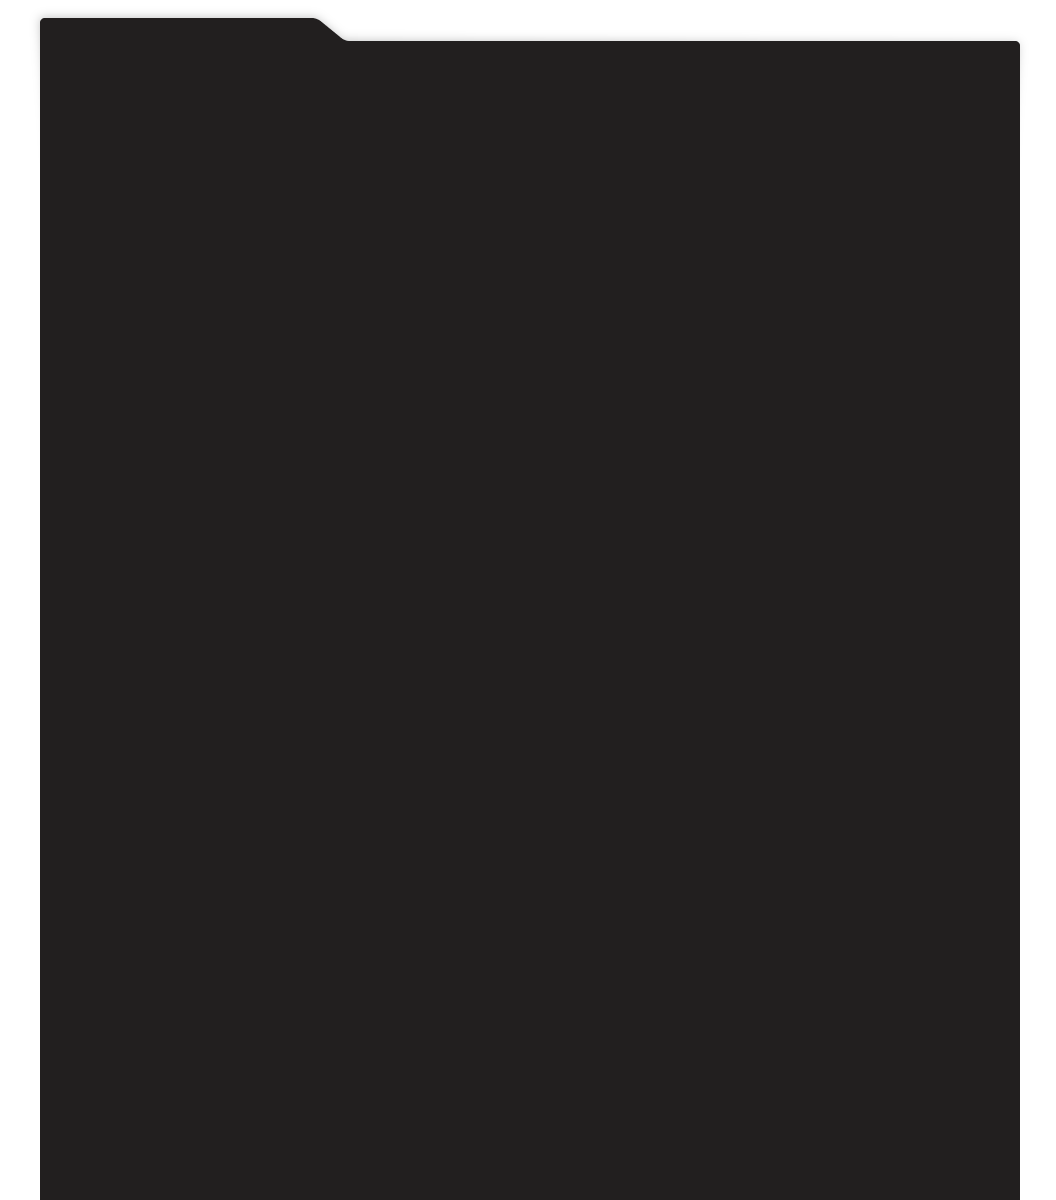
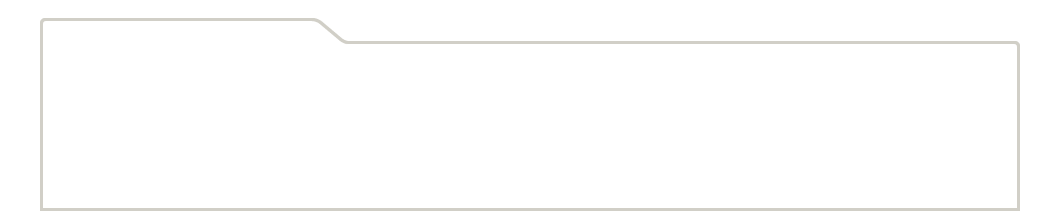
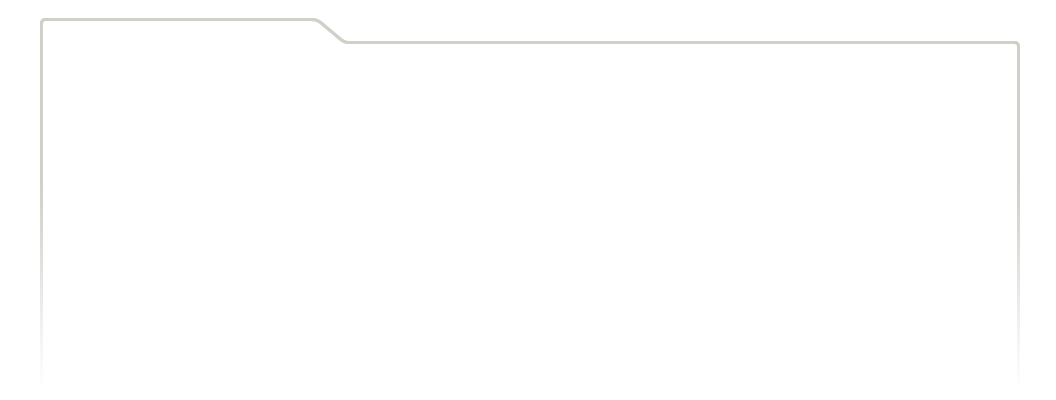
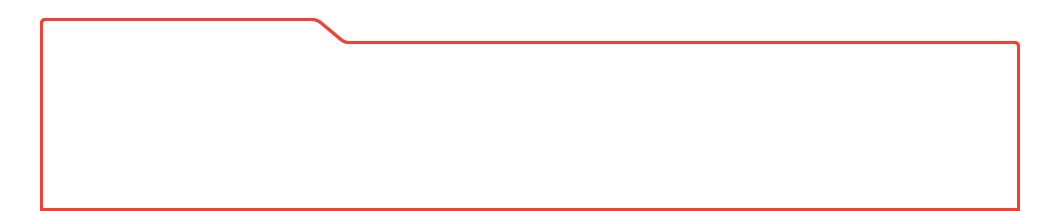
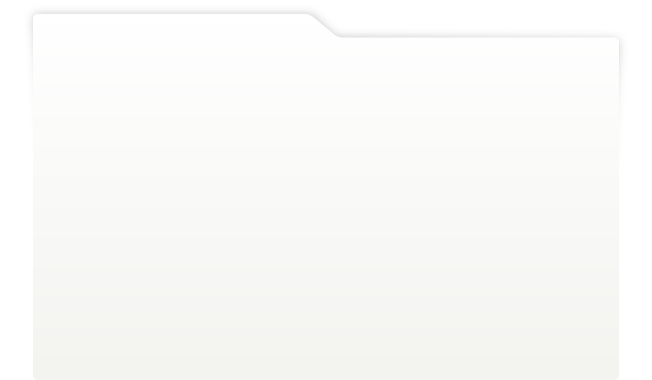
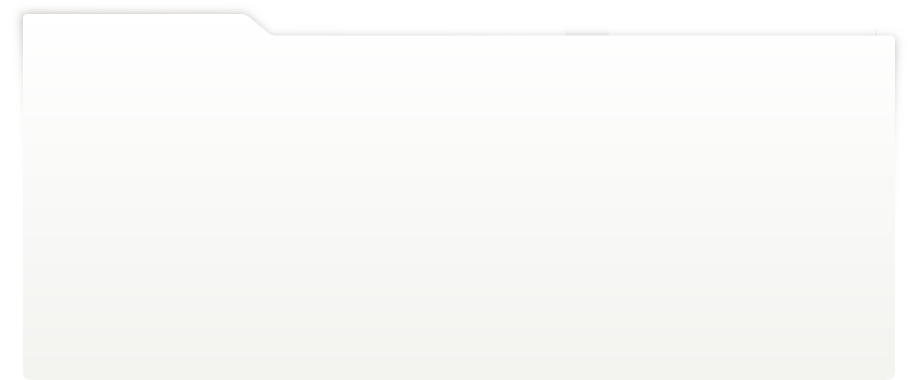
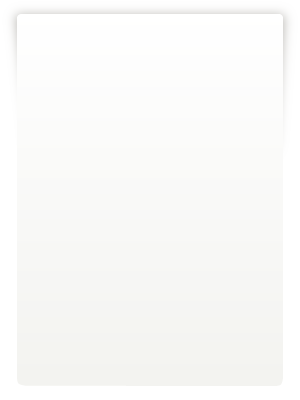
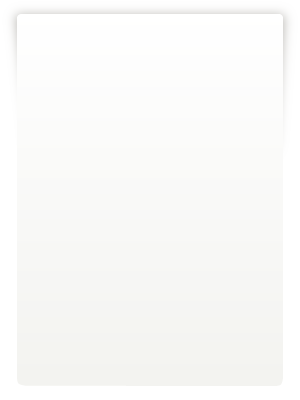
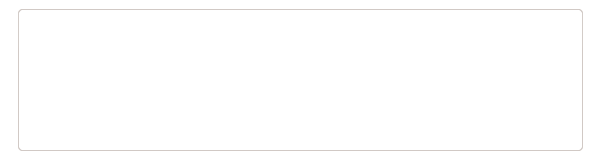
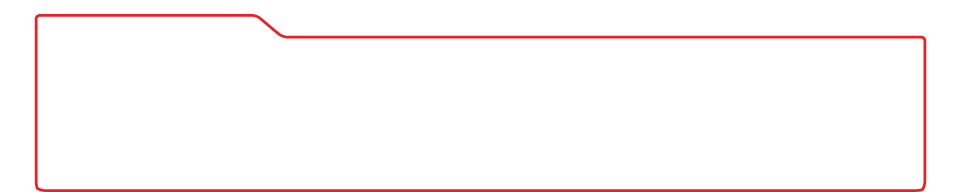
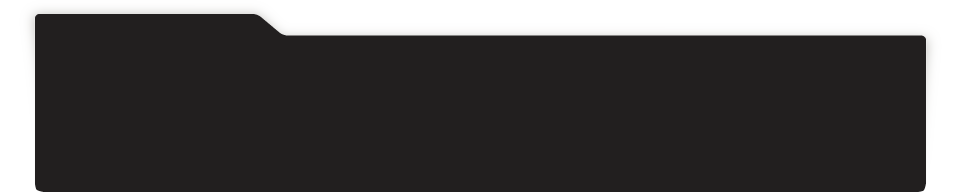
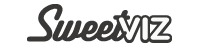
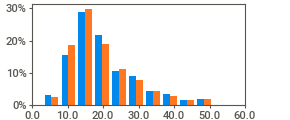
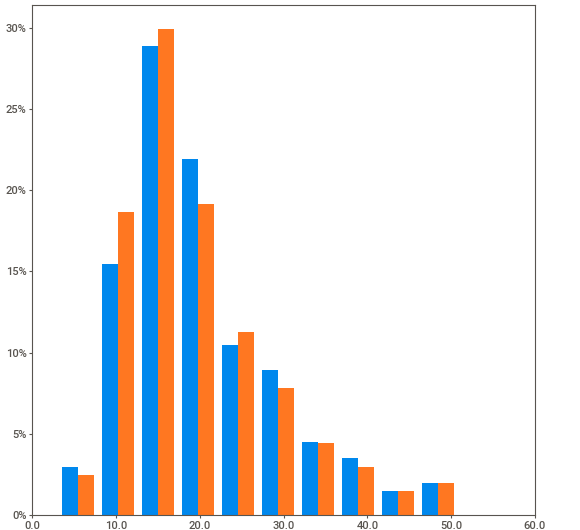
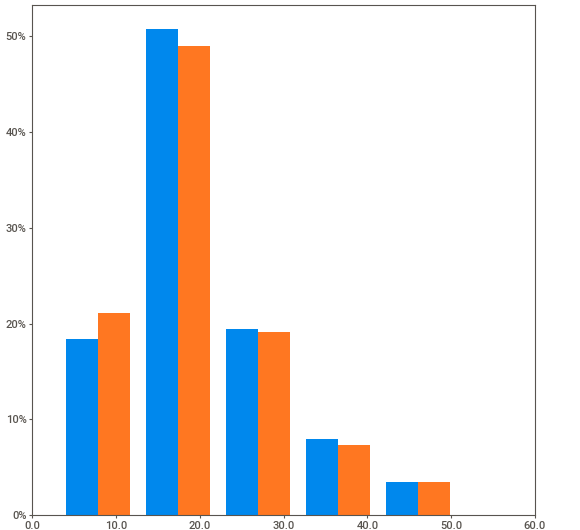
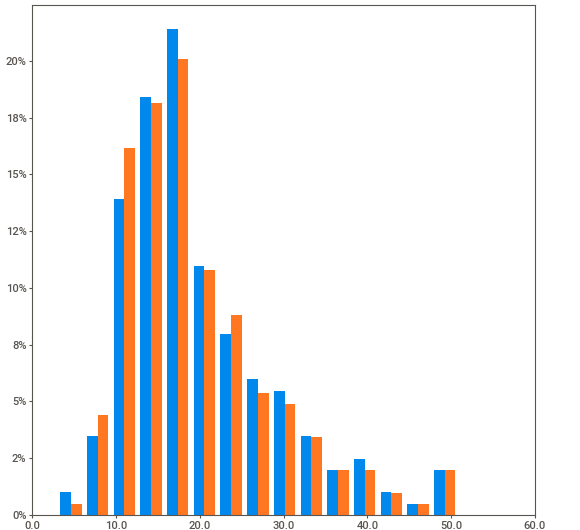
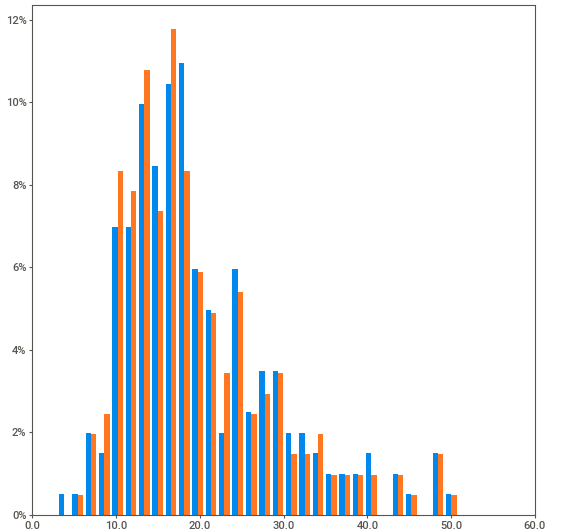
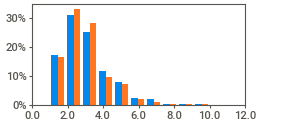
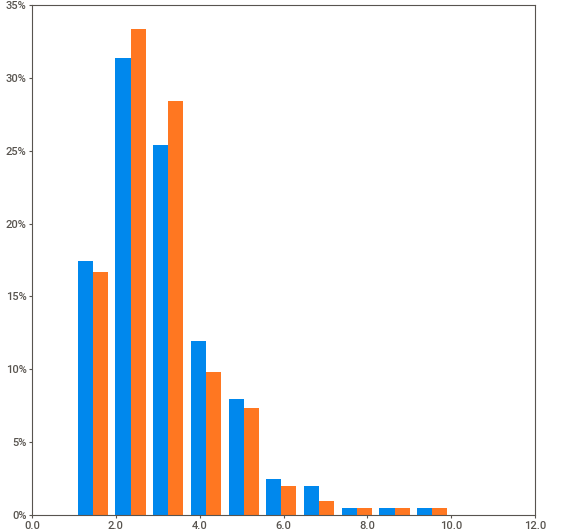
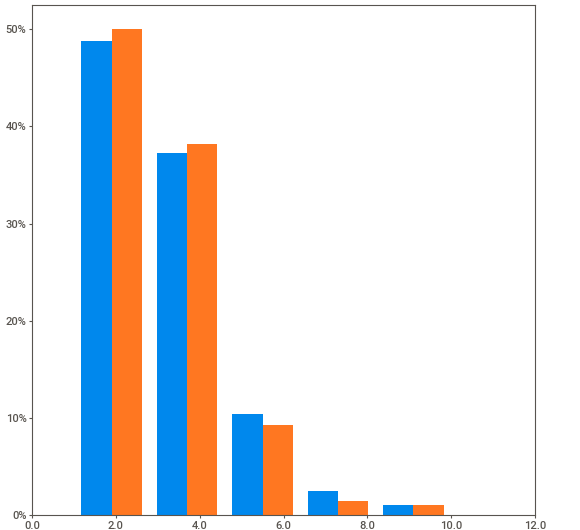
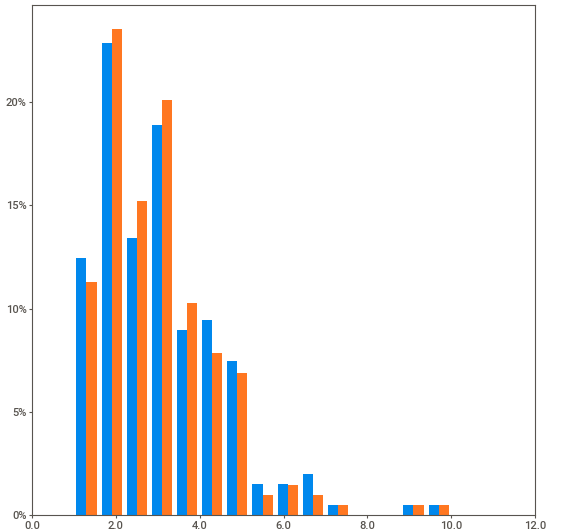
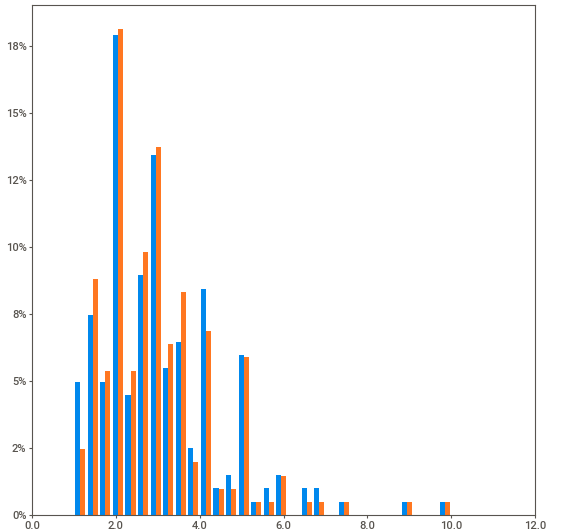
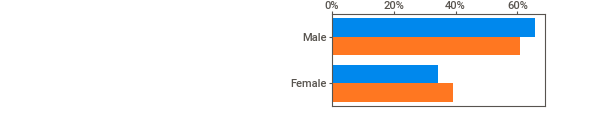
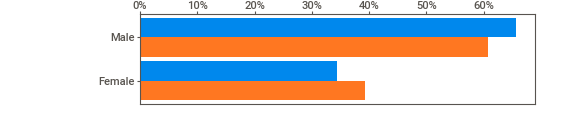
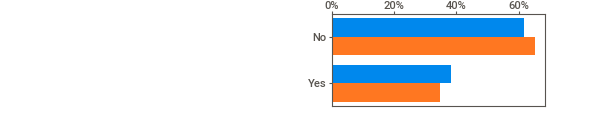
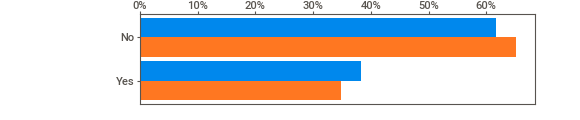
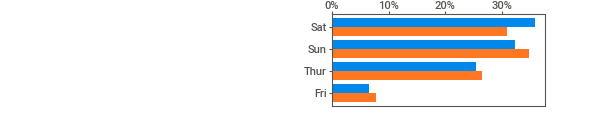
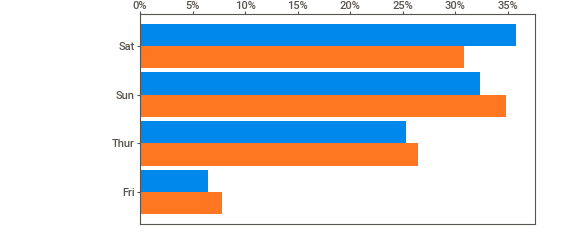
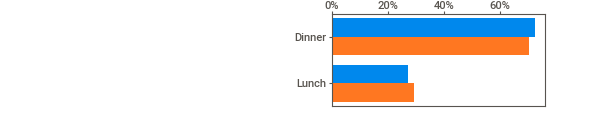
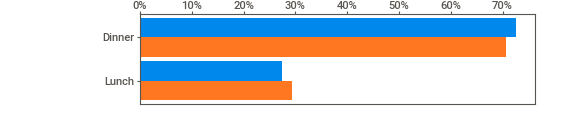
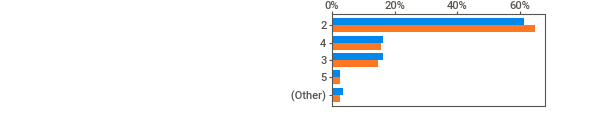
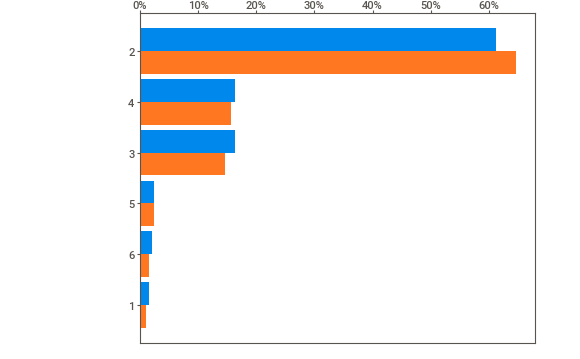
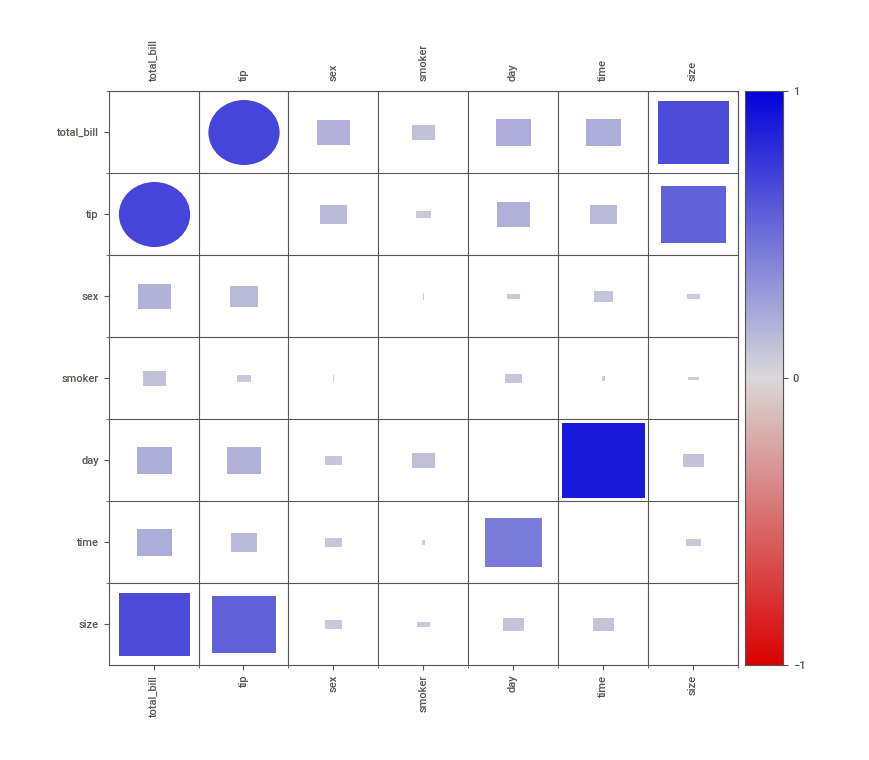
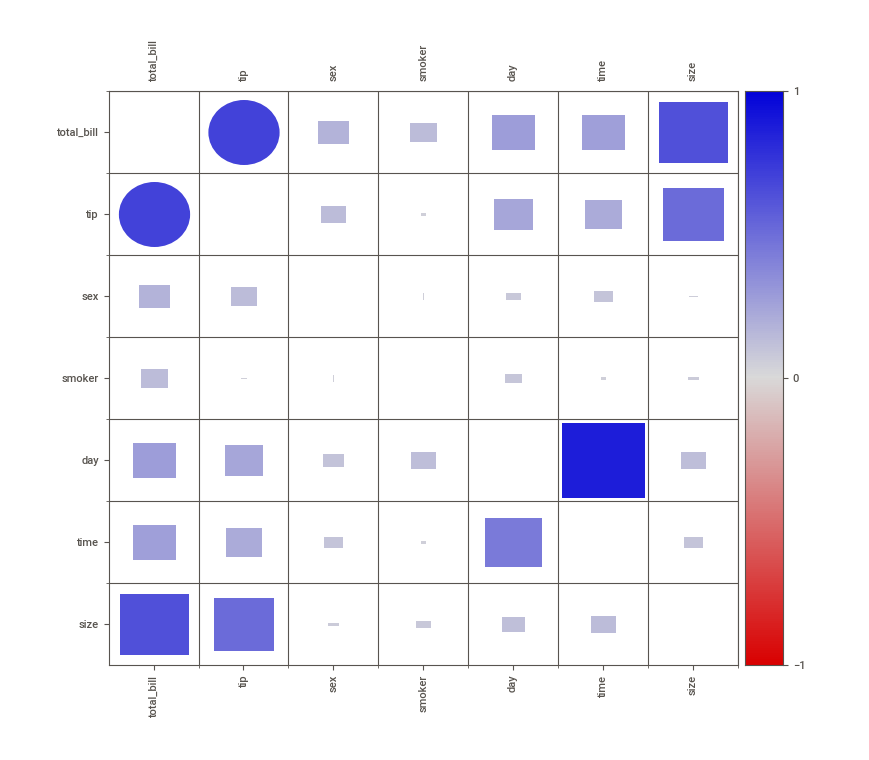

In [ ]:
tips_removido2 = tips_NA2.dropna()
report = sv.compare([tips_removido,"MCAR"],[tips_removido2,"MAR"])
report.show_notebook() 

                                             |          | [  0%]   00:00 -> (? left)


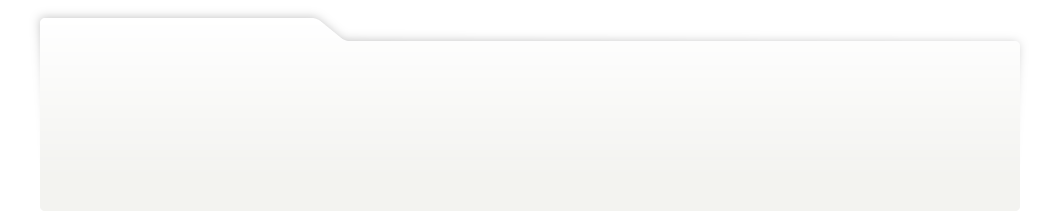
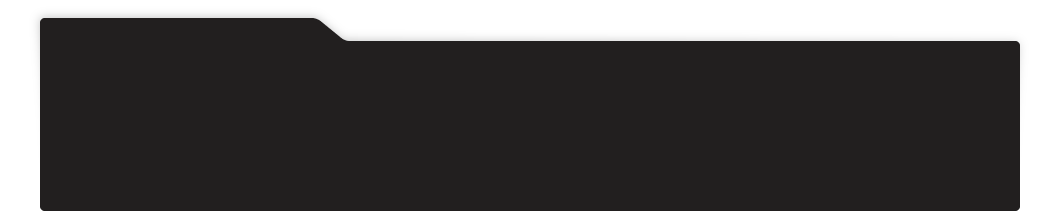
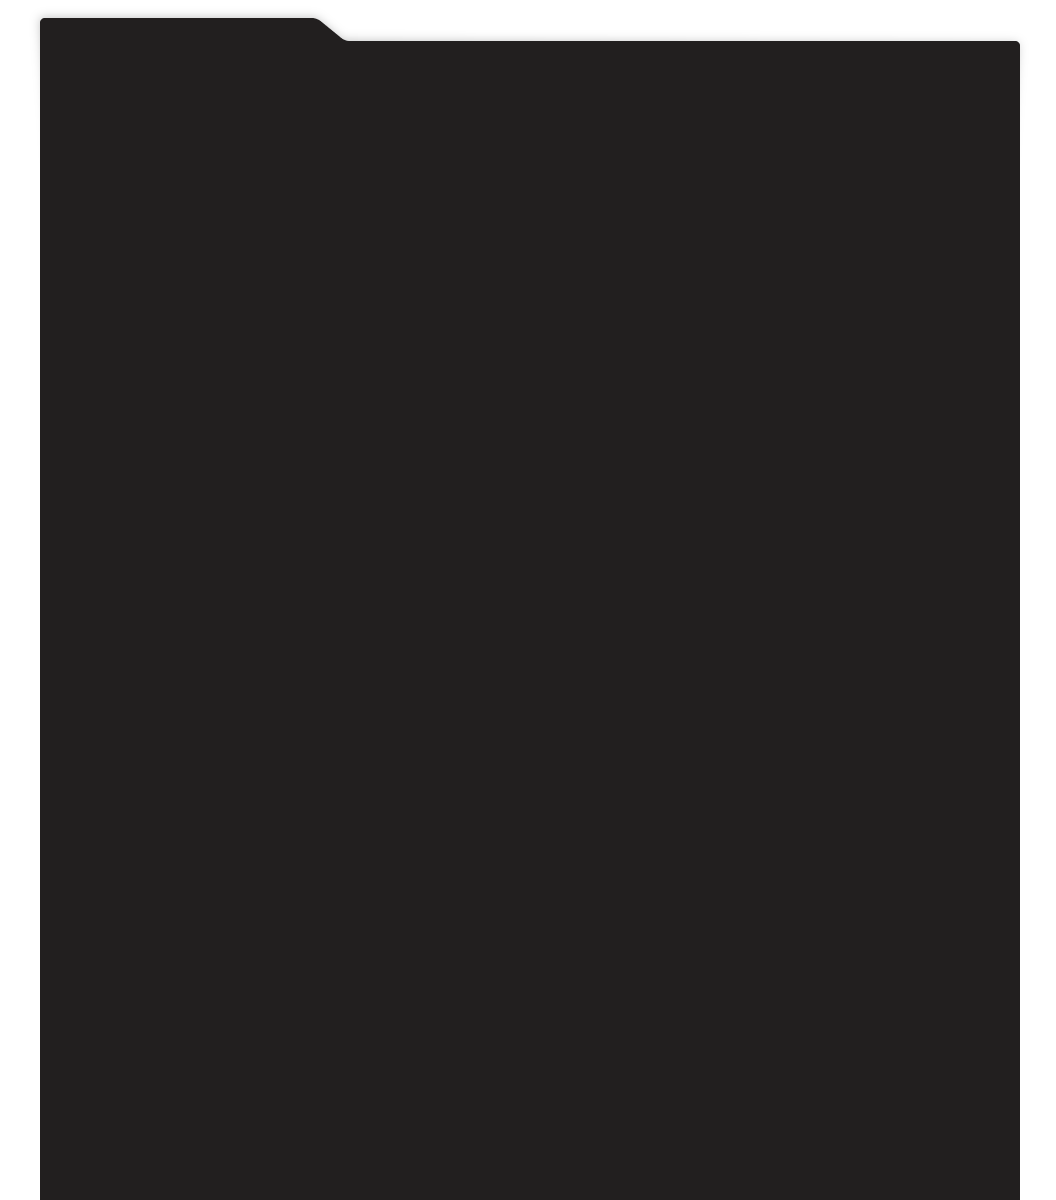
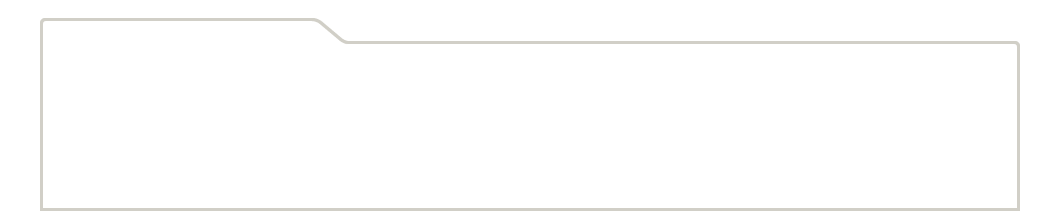
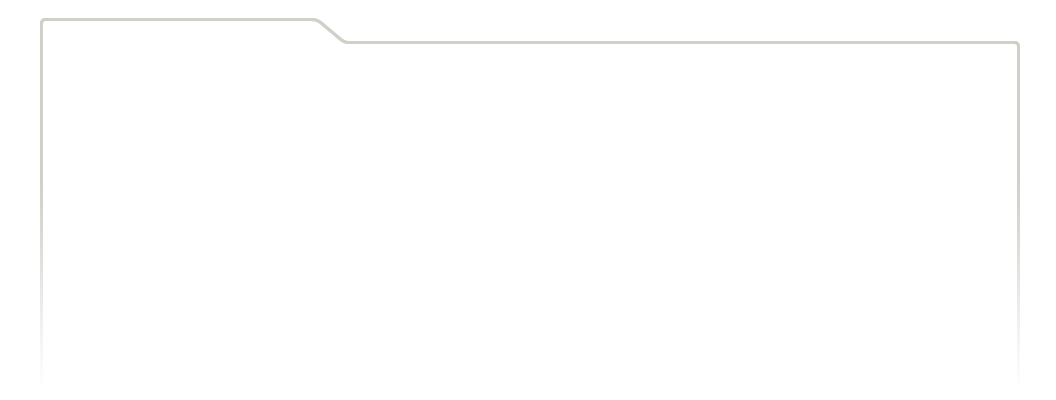
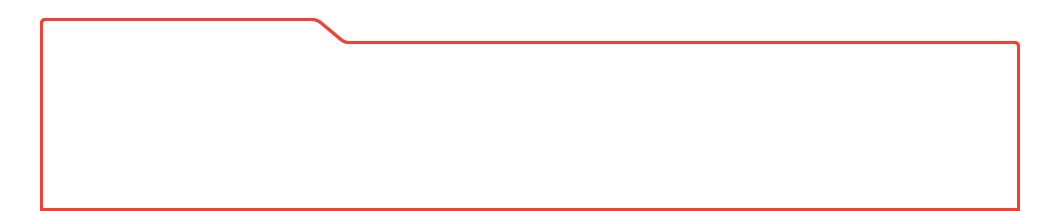
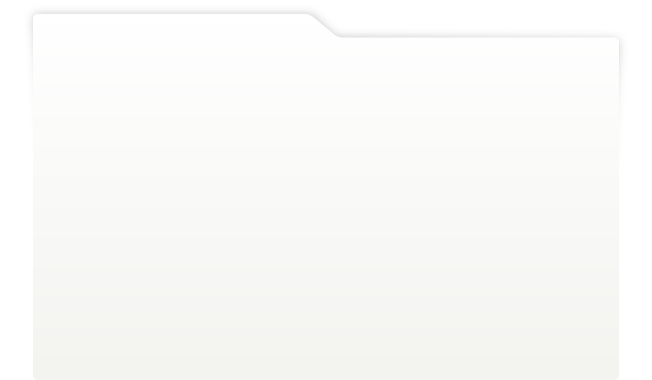
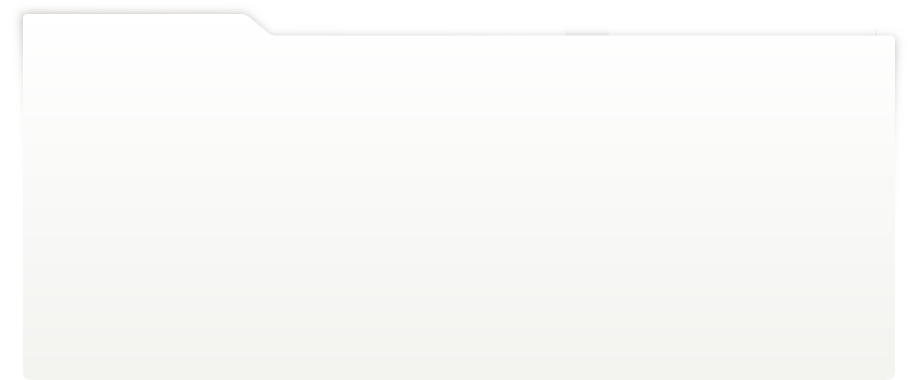
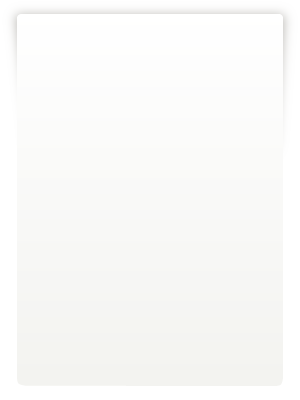
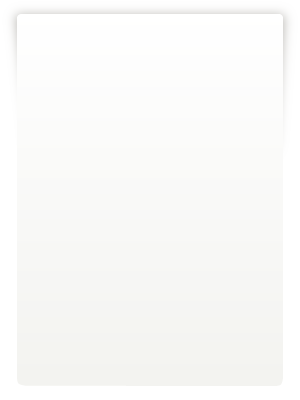
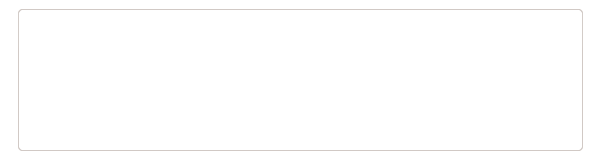
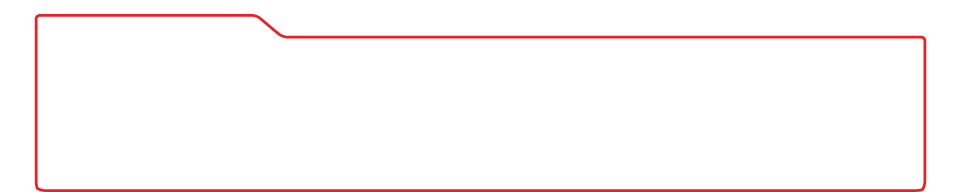
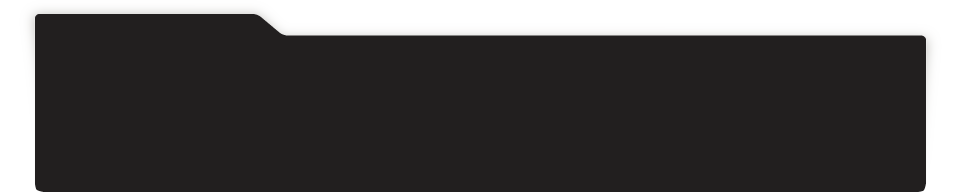
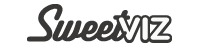
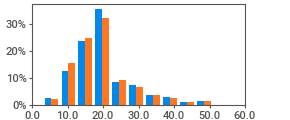
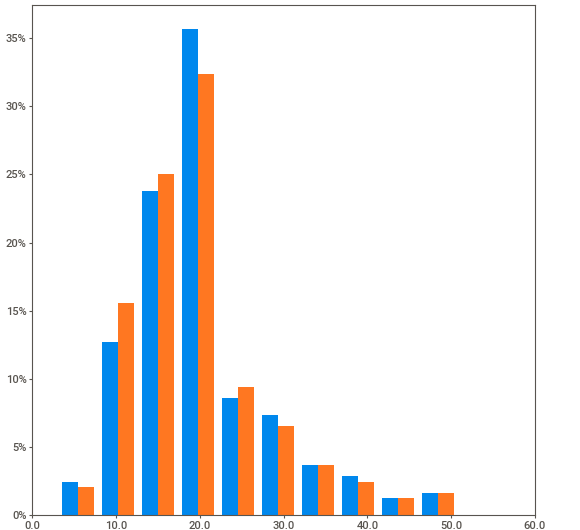
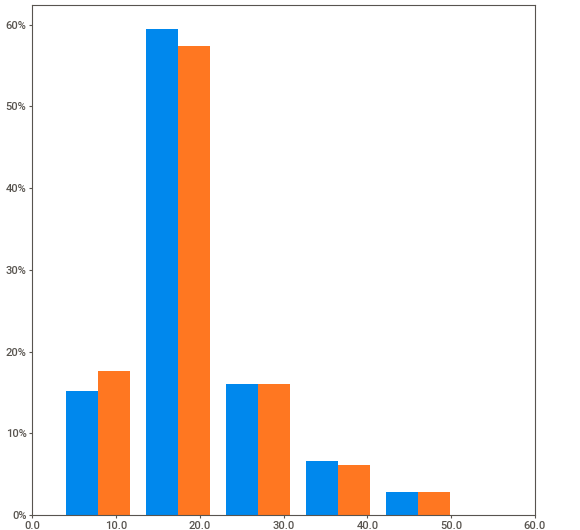
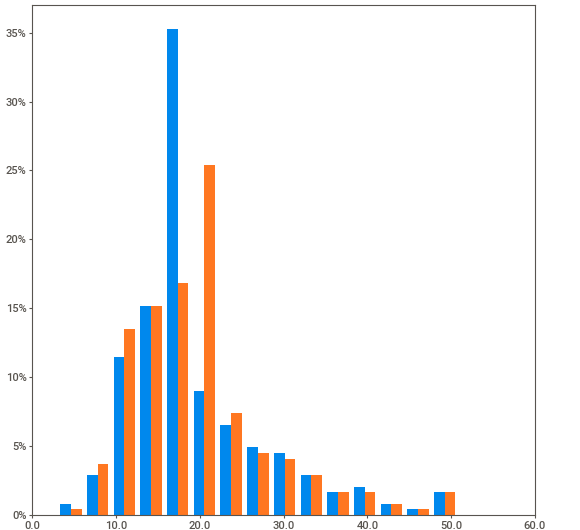
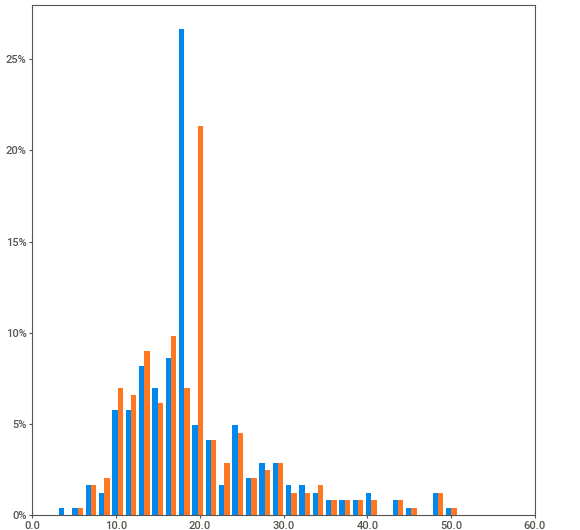
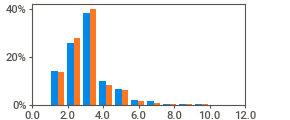
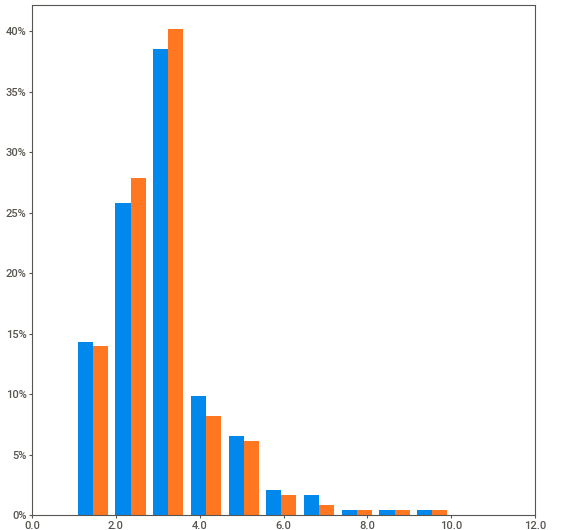
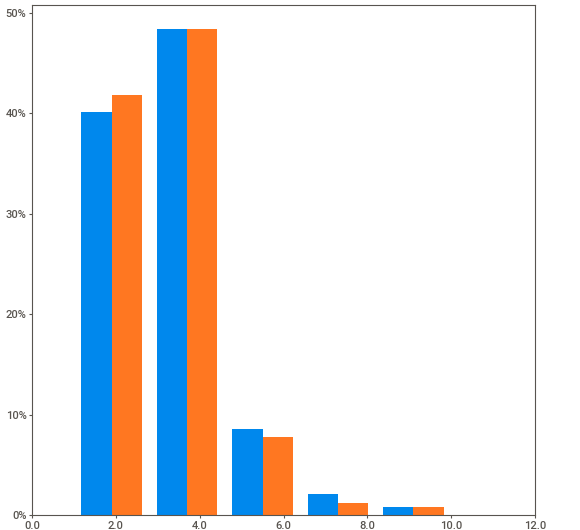
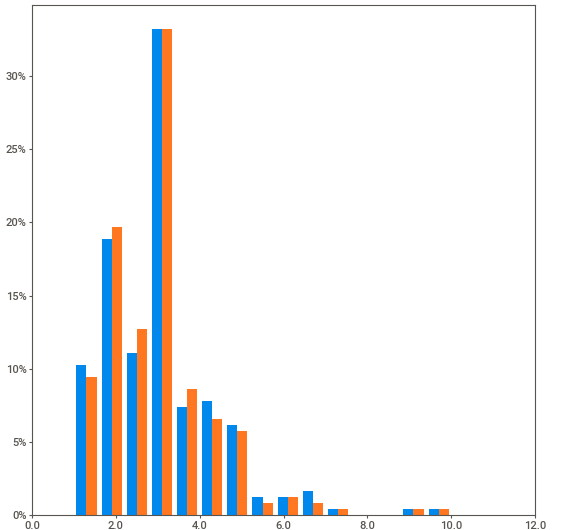
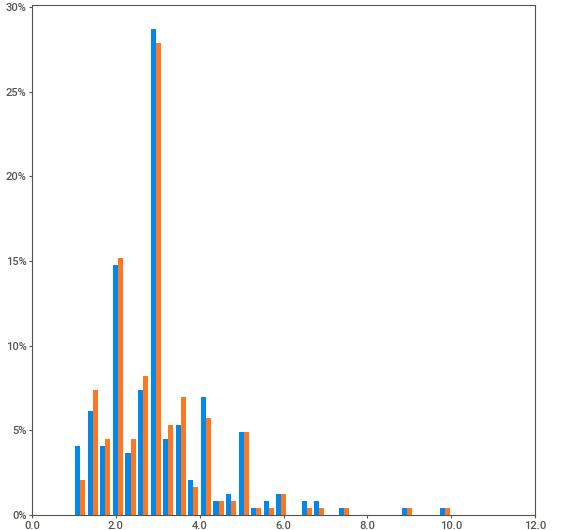
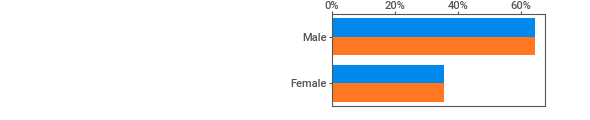
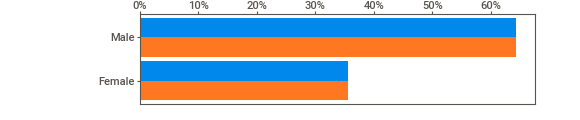
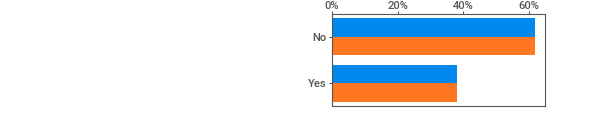
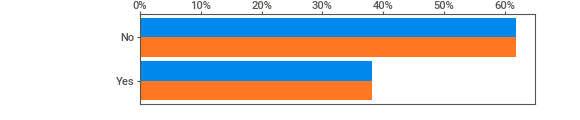
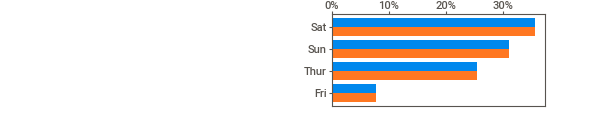
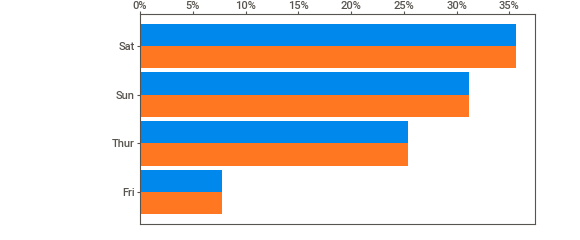
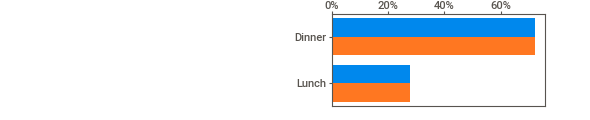
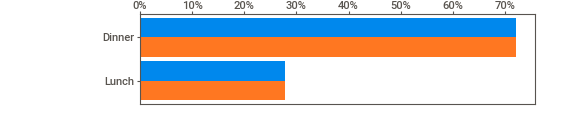
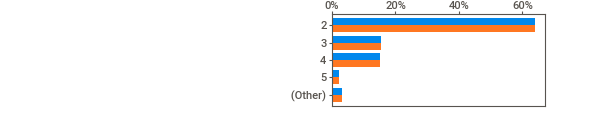
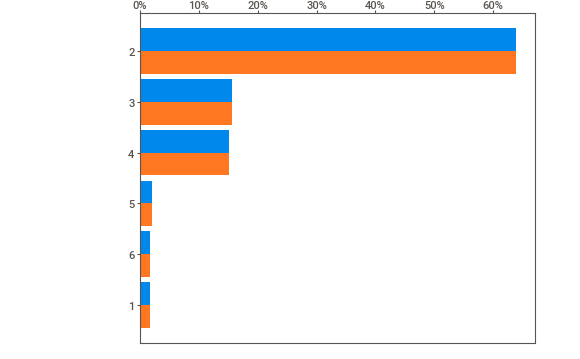
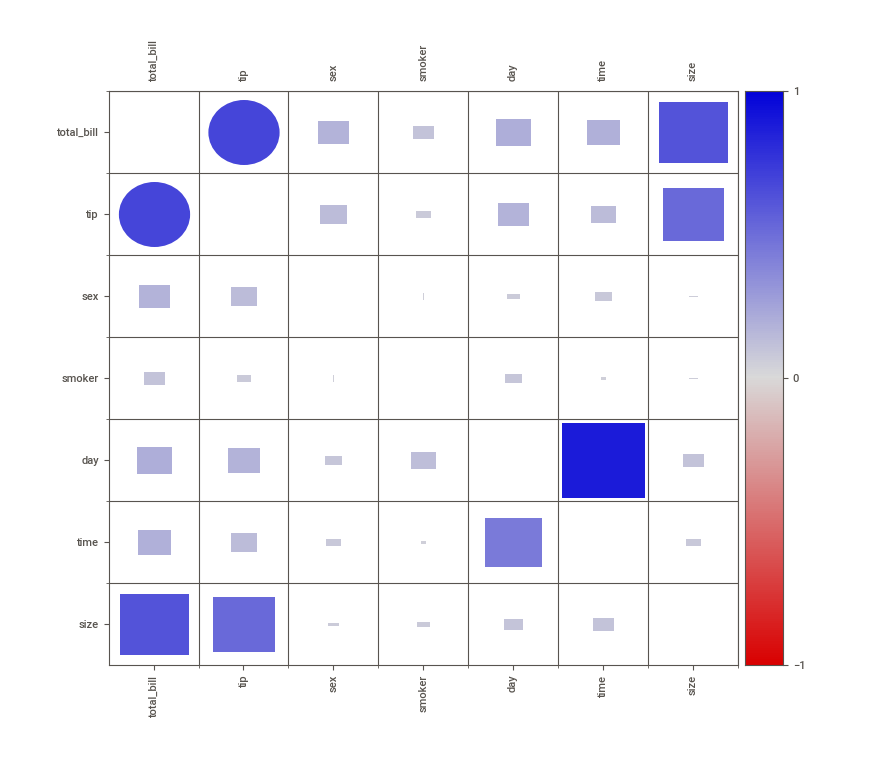
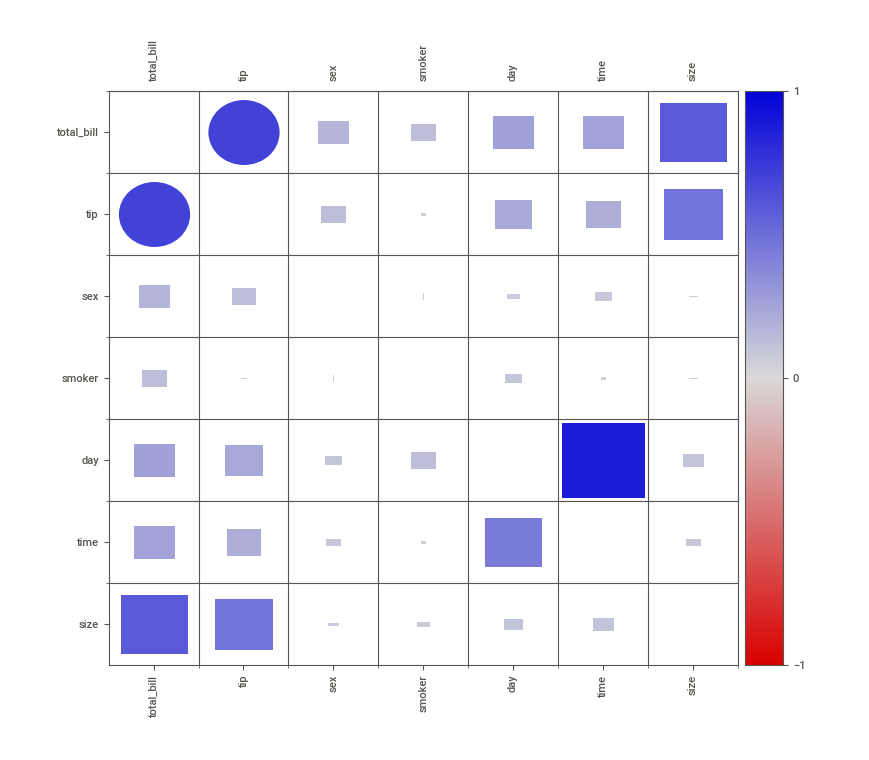

In [ ]:
tips_input2 = tips_NA2.fillna(tips_NA2.mean())
report = sv.compare([tips_input,"MCAR"],[tips_input2,"MAR"])
report.show_notebook() 

In [ ]:
p = tips['tip']/tips['tip'].sum()
tips_NA3 = tips.copy()
sample = np.random.choice(list(tips_NA3.index),int(len(tips)*0.2), p = p)
tips_NA3.loc[sample,['total_bill','tip']] = np.nan

In [ ]:
#tips['tip']/tips['tip'].sum()

                                             |          | [  0%]   00:00 -> (? left)


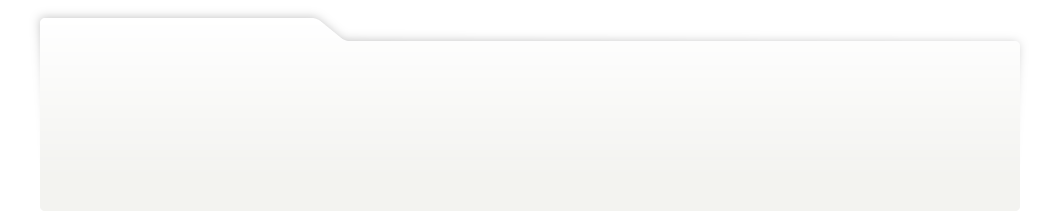
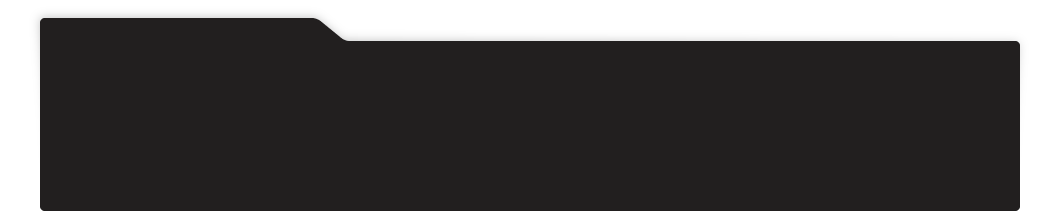
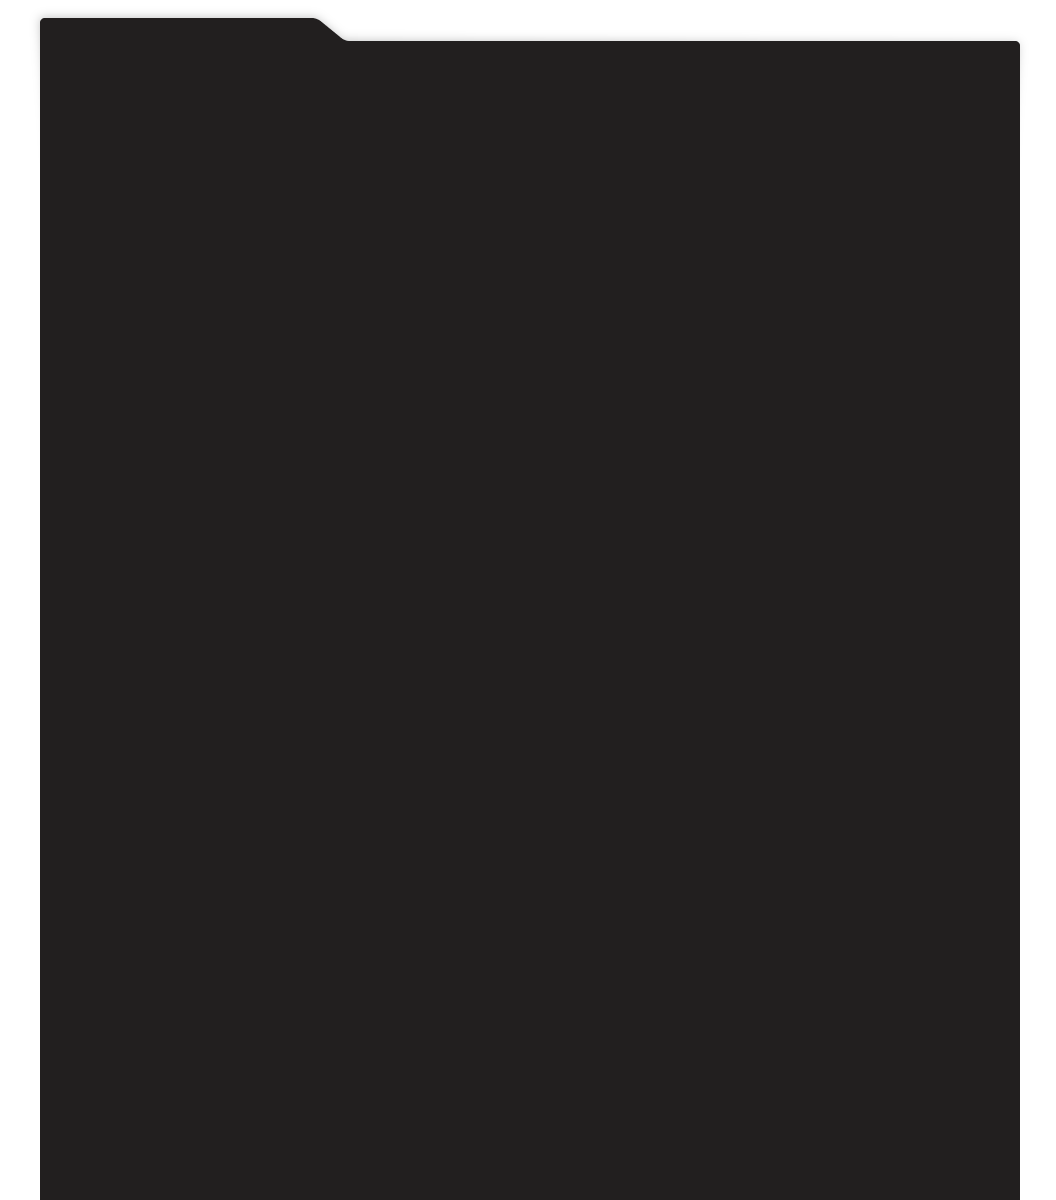
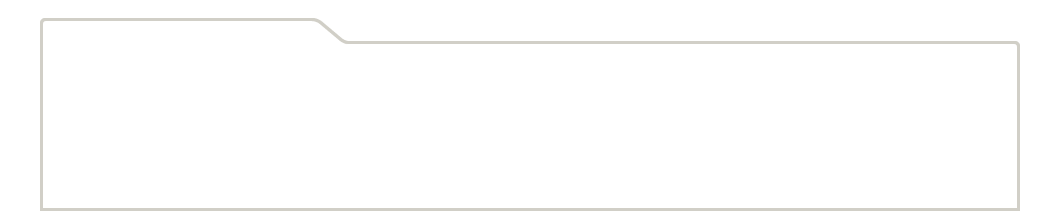
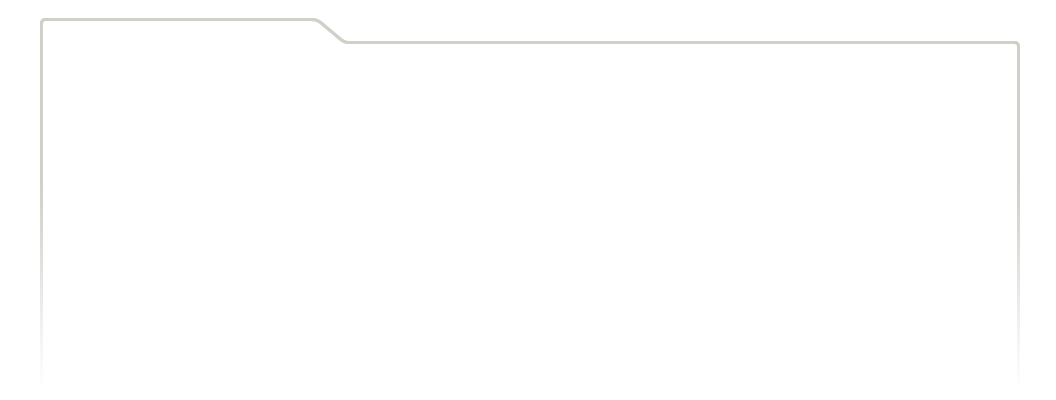
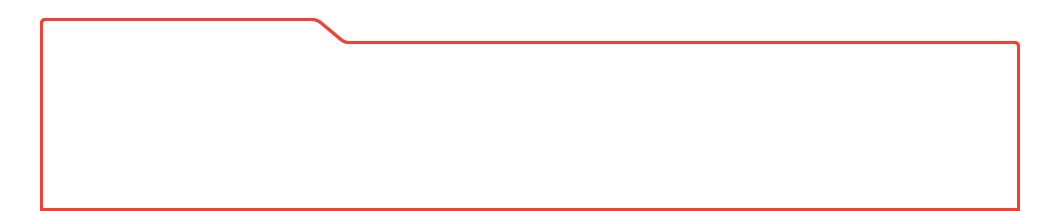
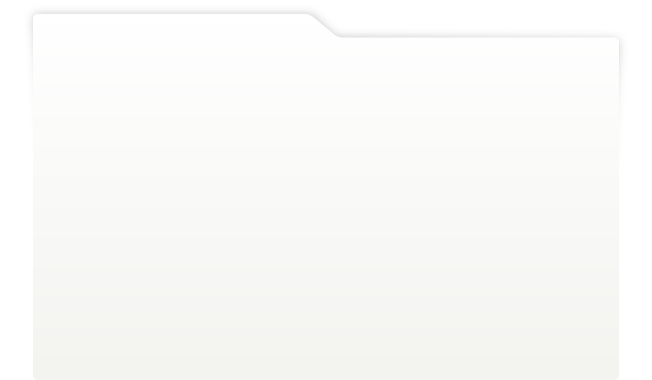
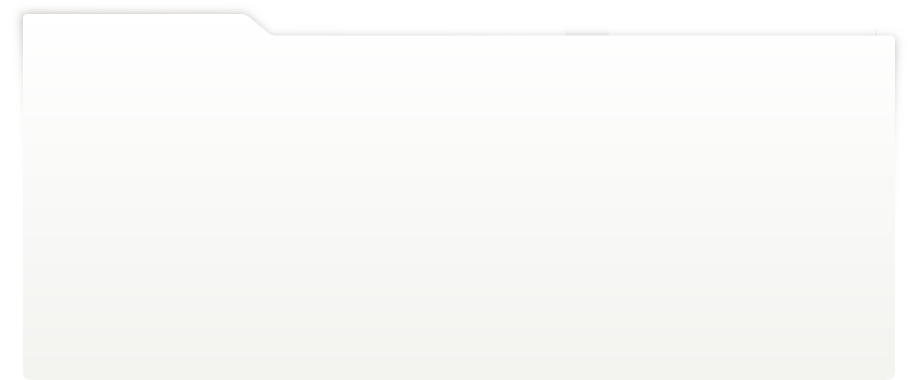
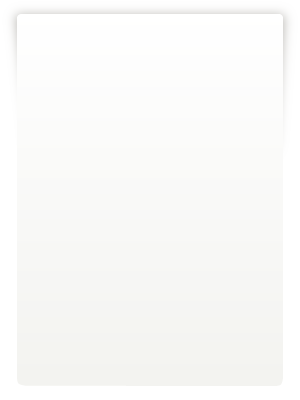
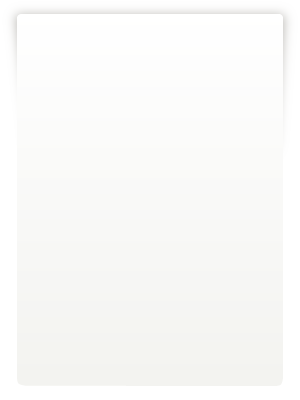
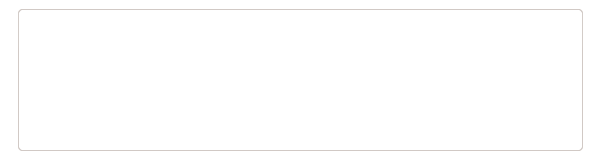
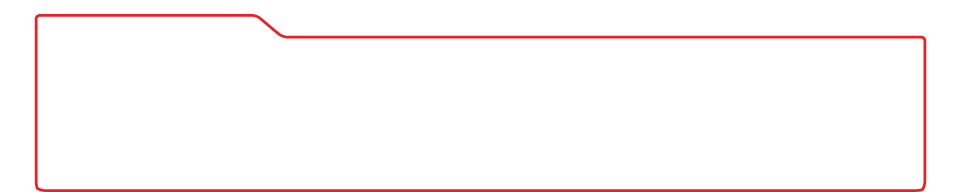
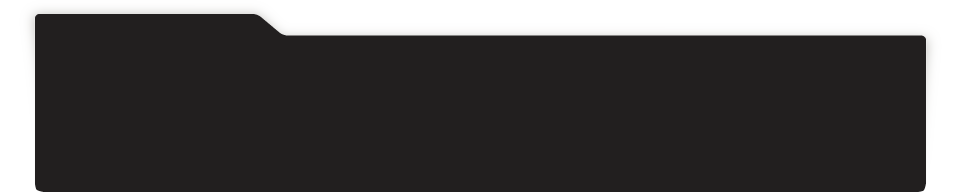
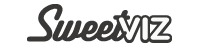
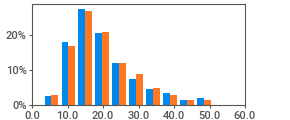
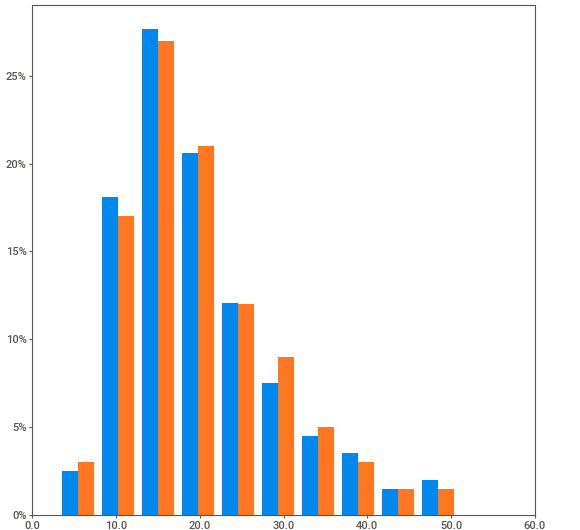
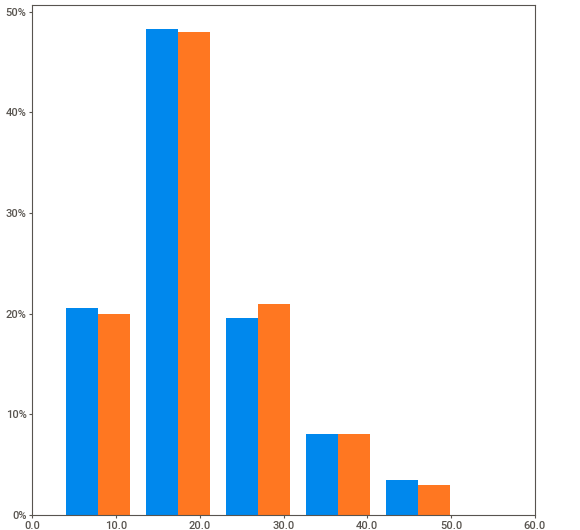
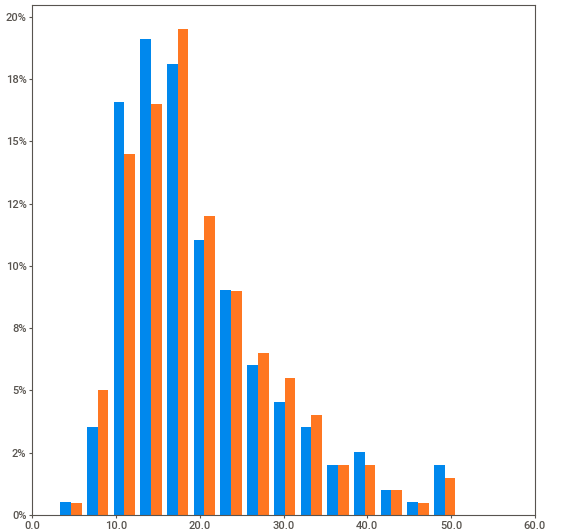
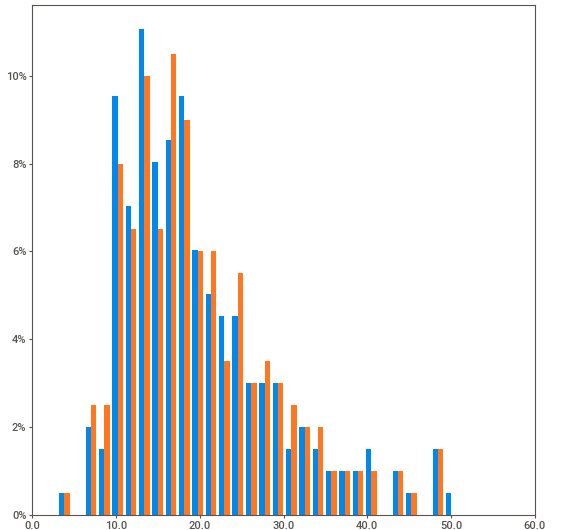
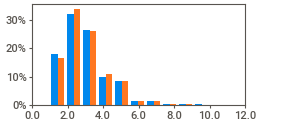
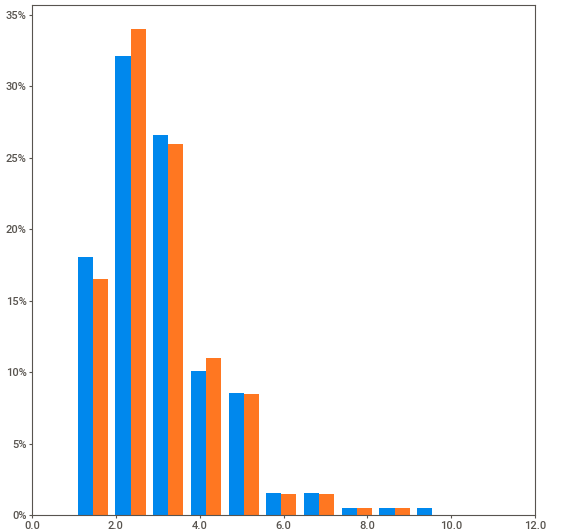
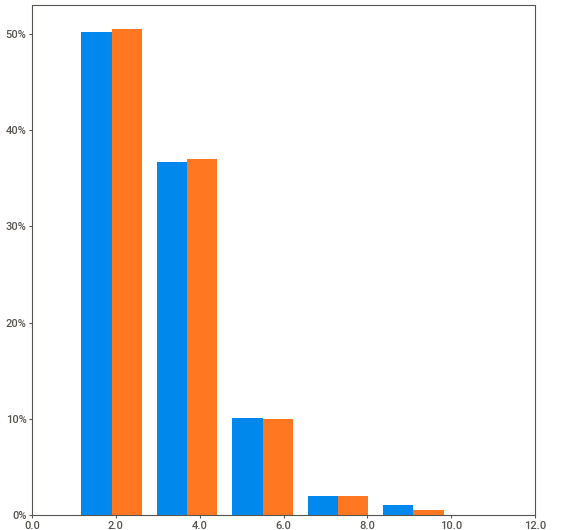
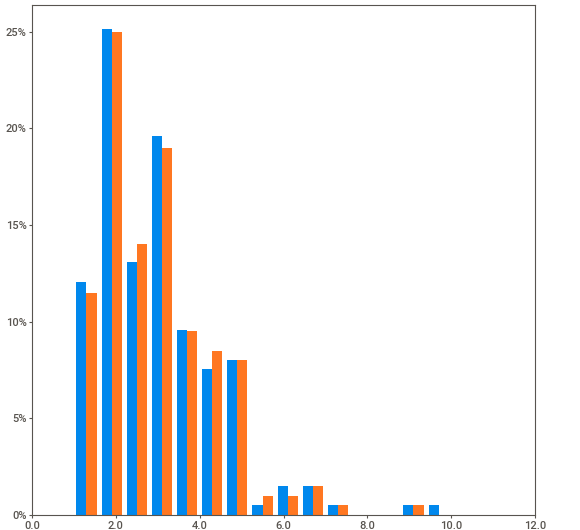
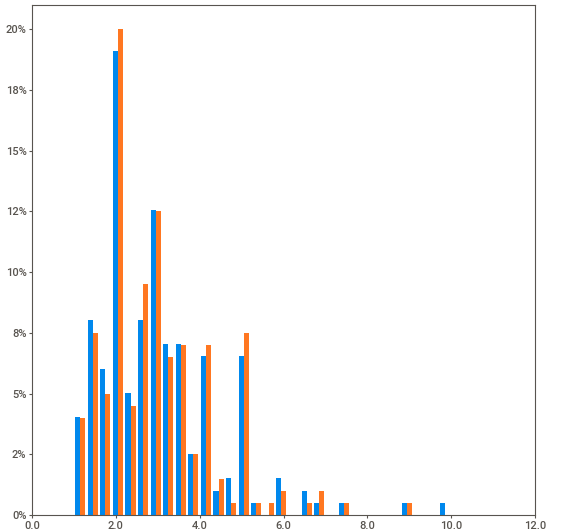
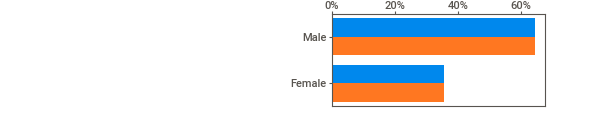
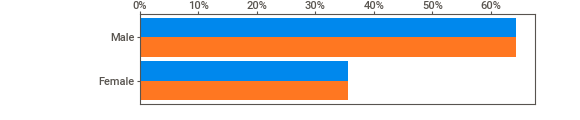
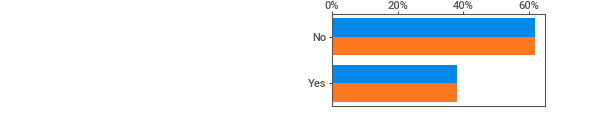
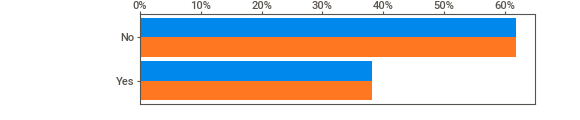
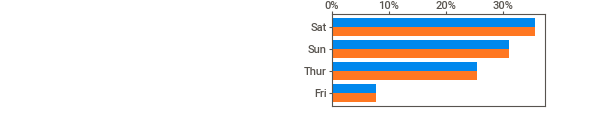
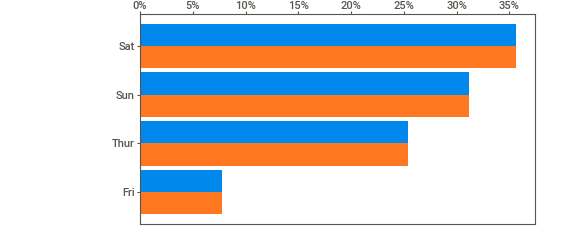
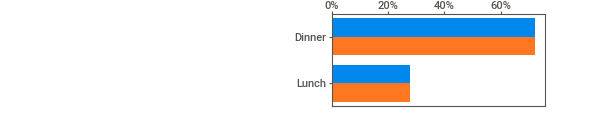
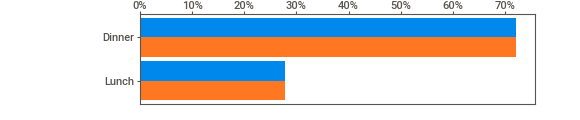
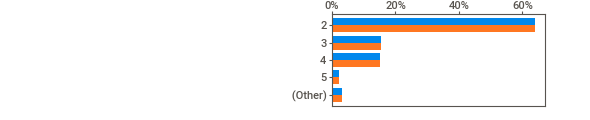
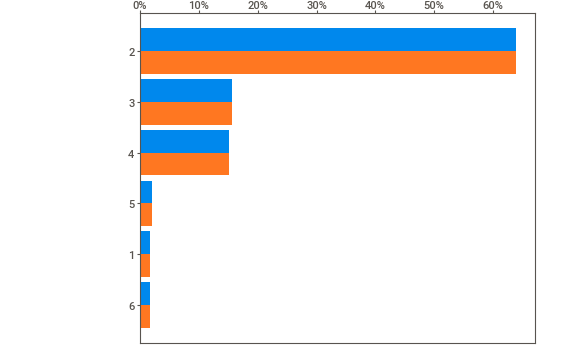
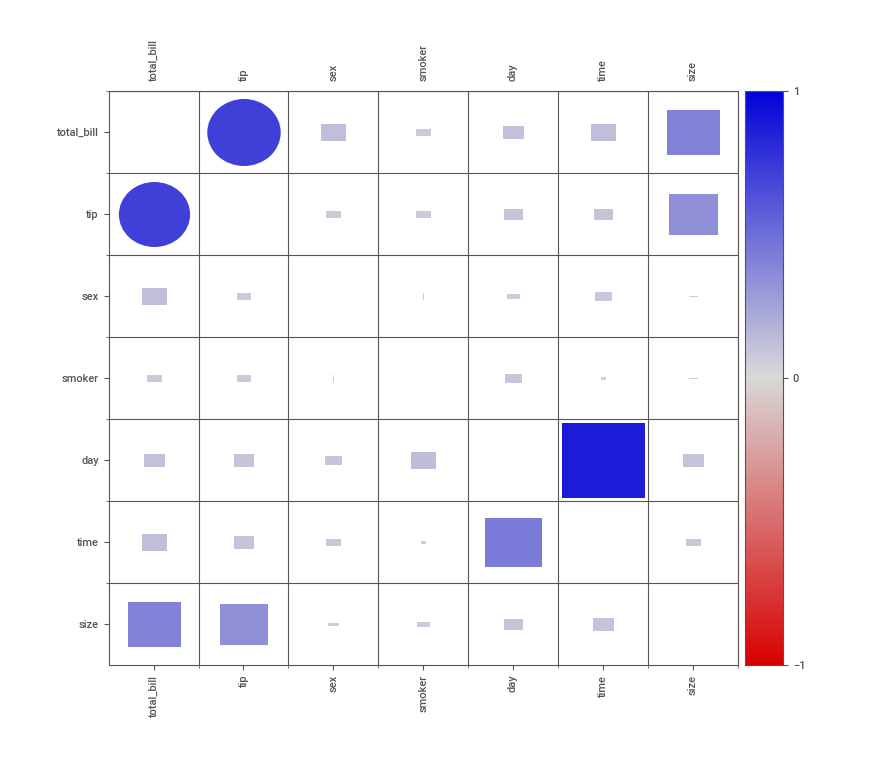
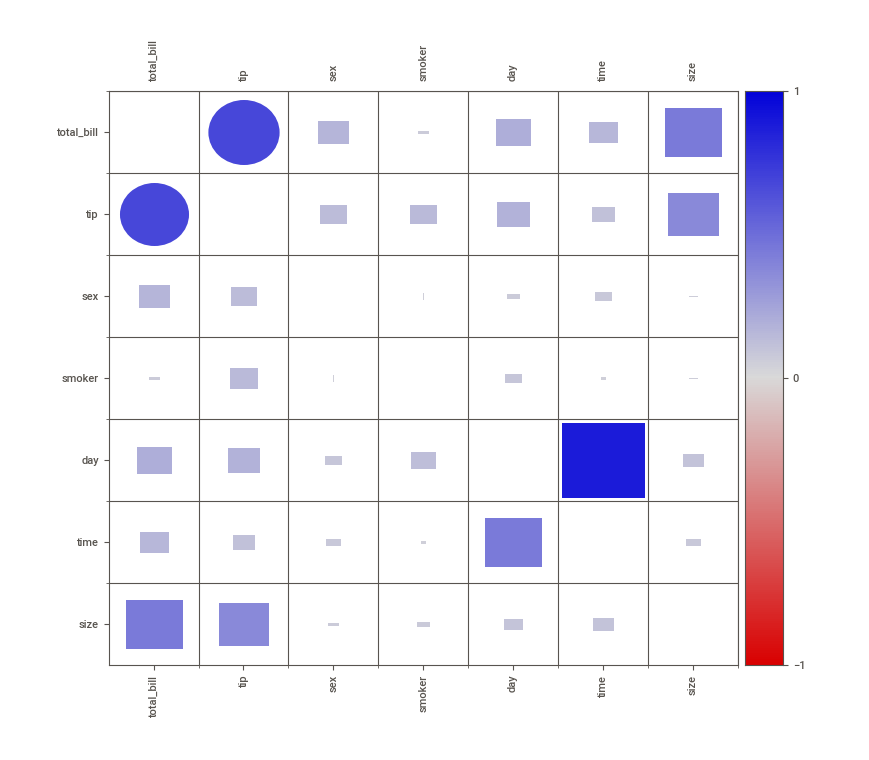

In [ ]:
report = sv.compare([tips_NA,"MCAR"],[tips_NA3,"MNAR"])
report.show_notebook() 

                                             |          | [  0%]   00:00 -> (? left)


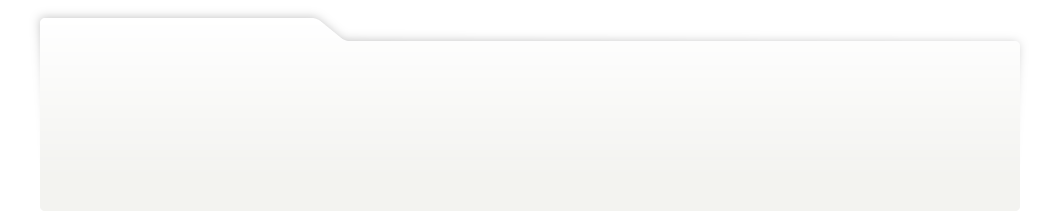
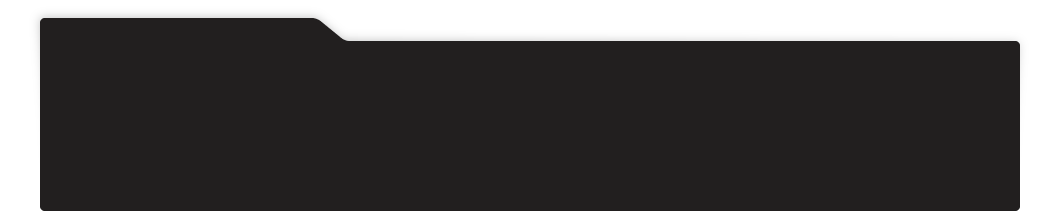
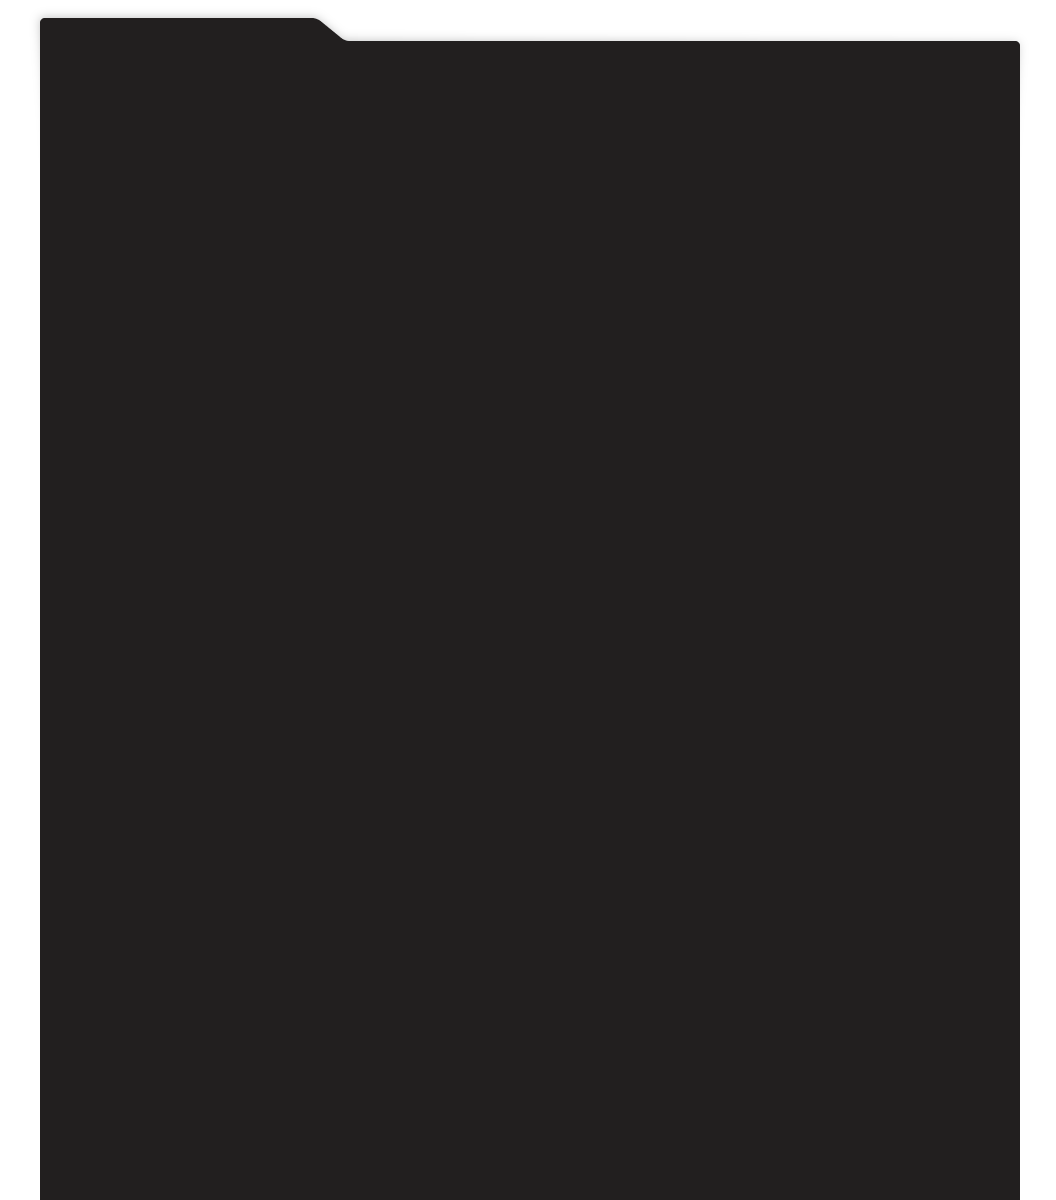
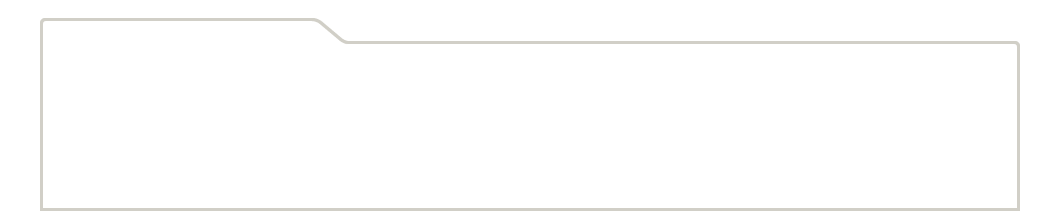
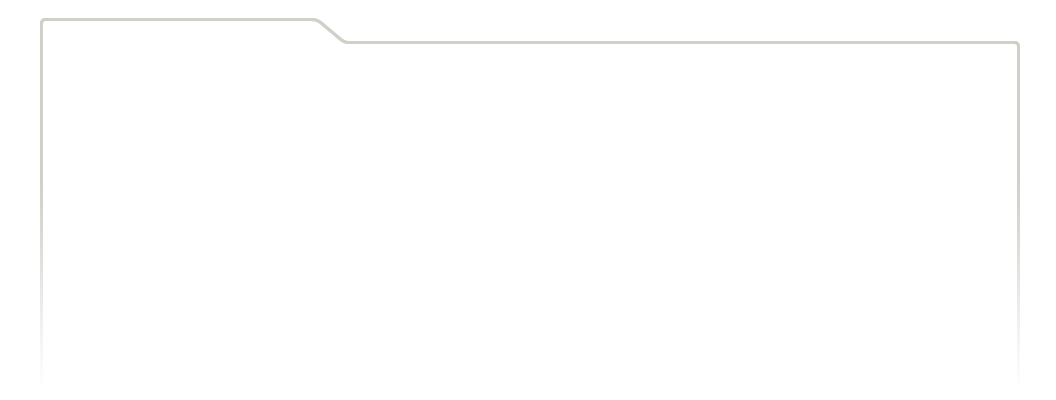
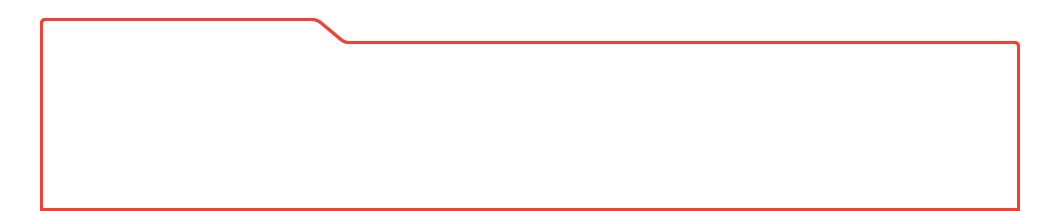
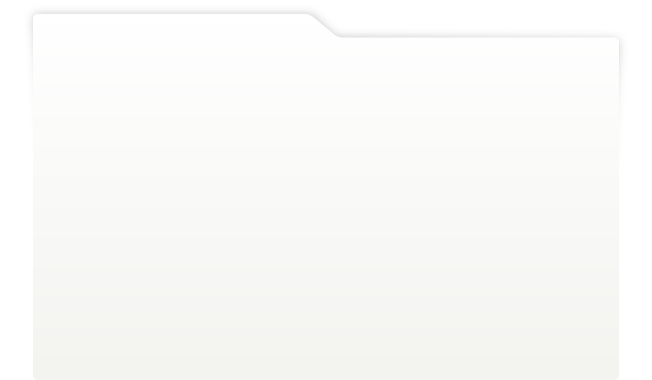
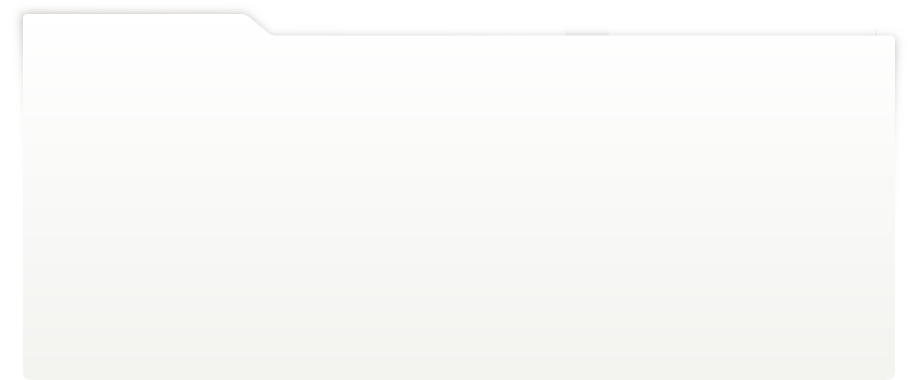
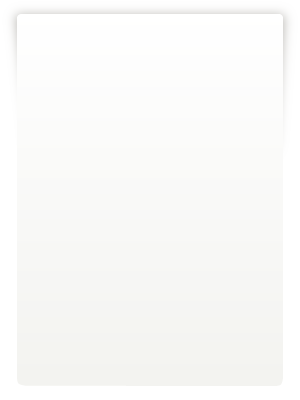
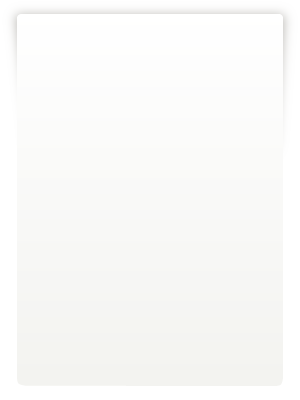
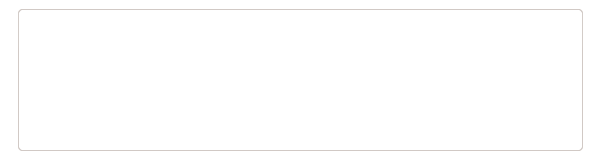
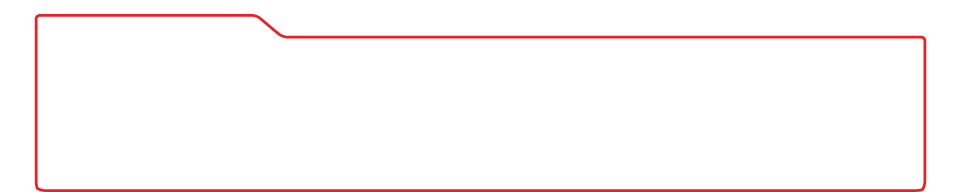
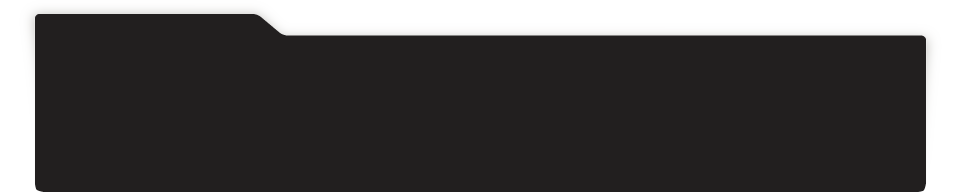
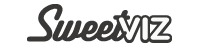
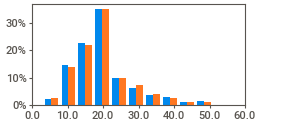
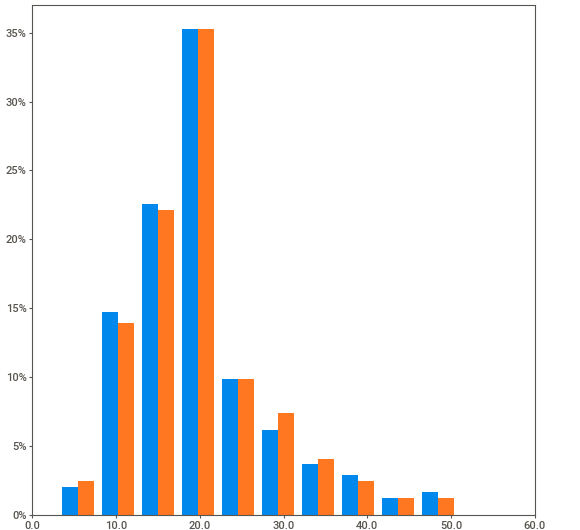
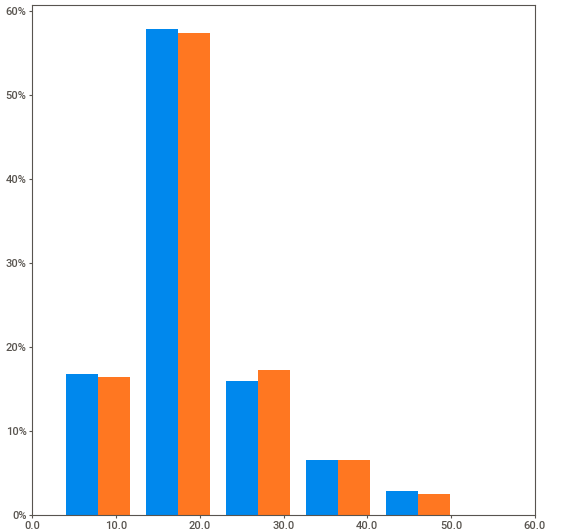
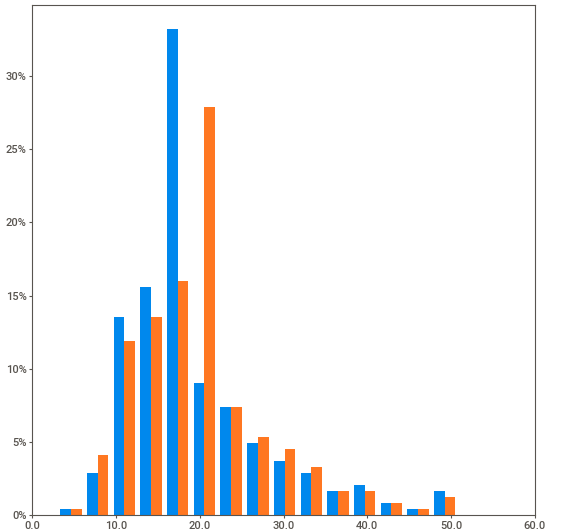
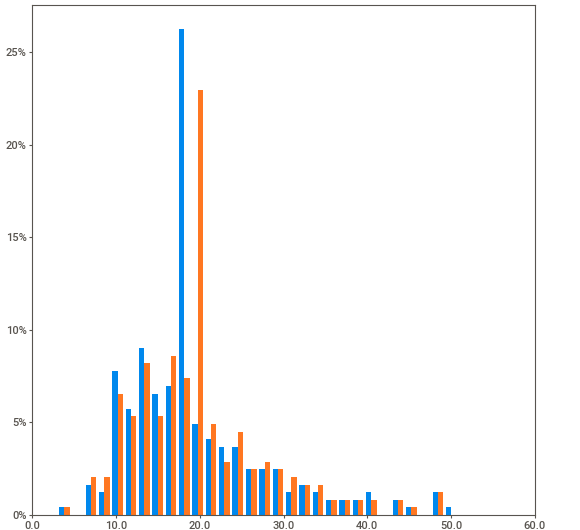
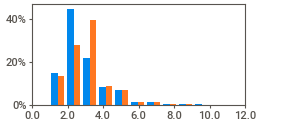
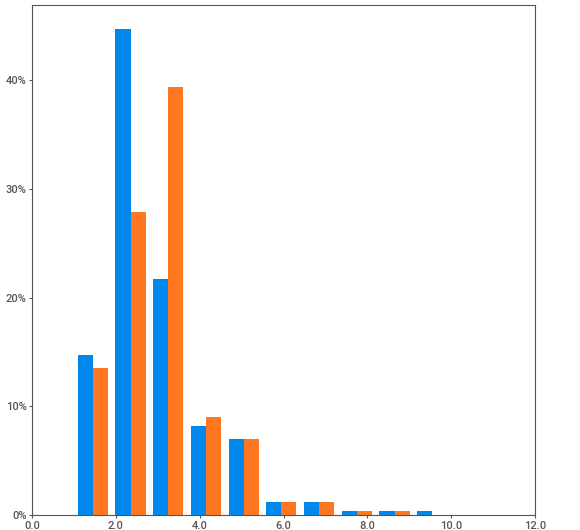
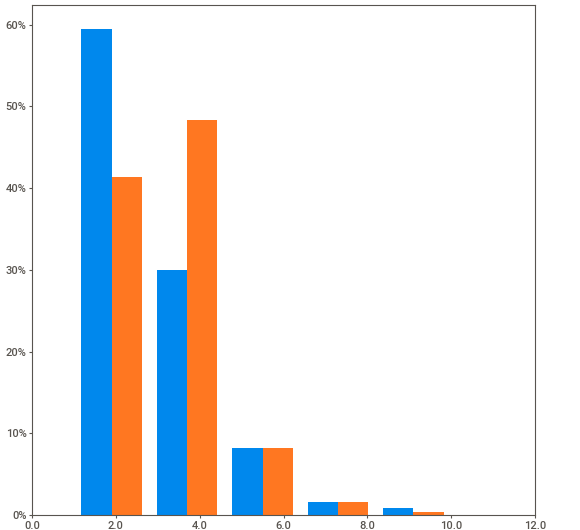
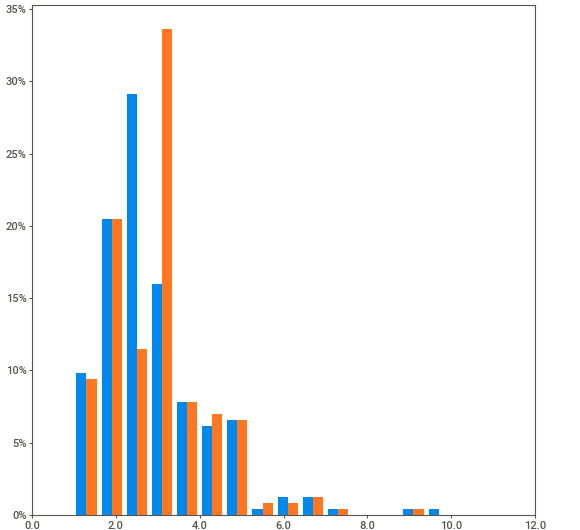
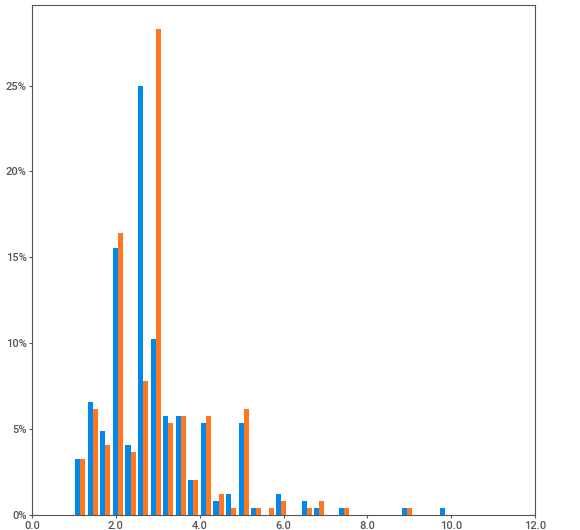
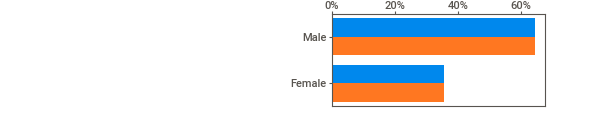
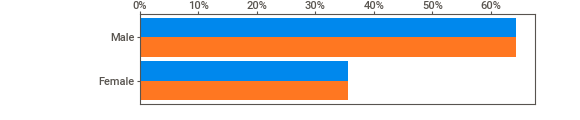
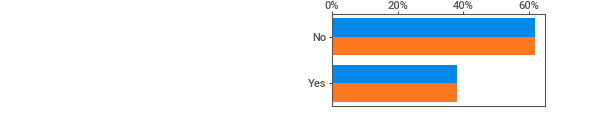
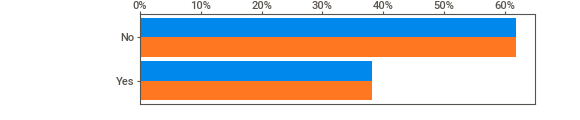
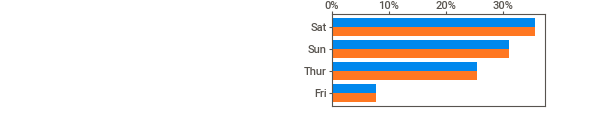
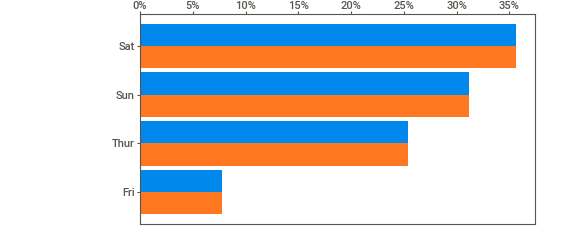
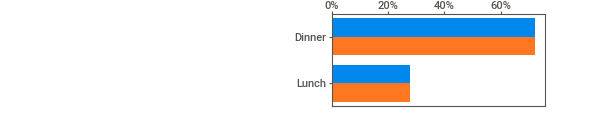
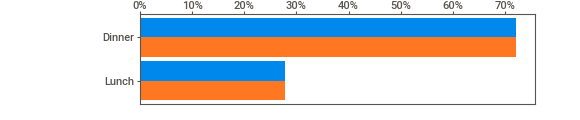
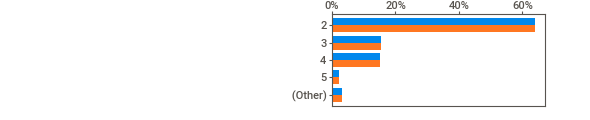
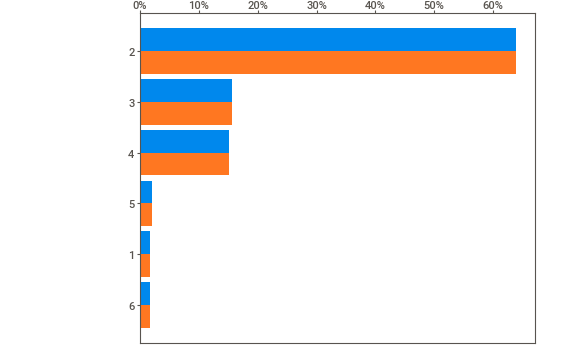
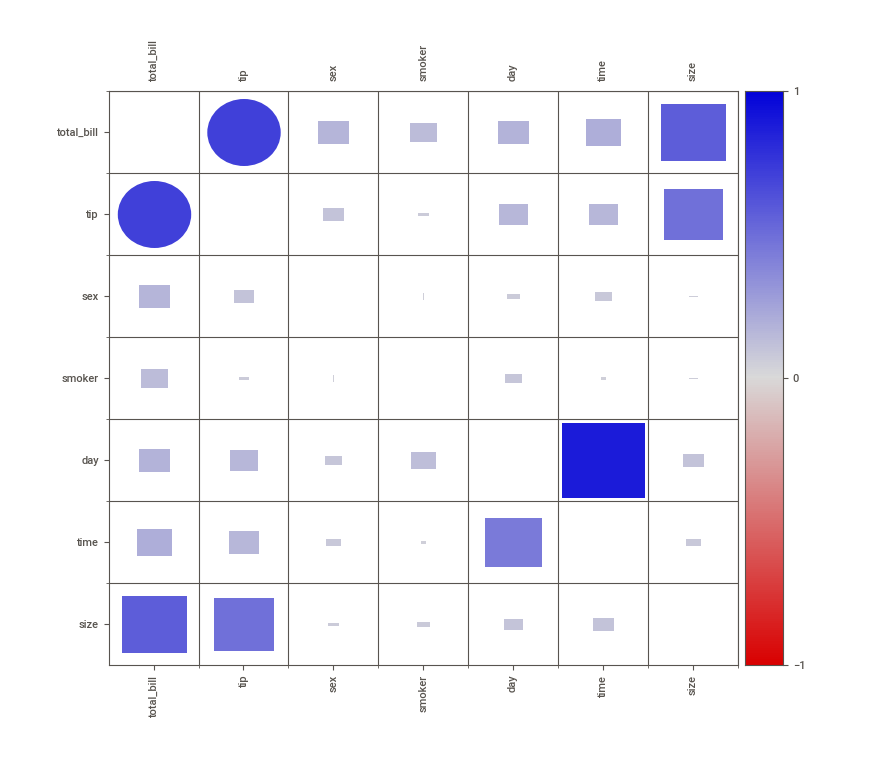
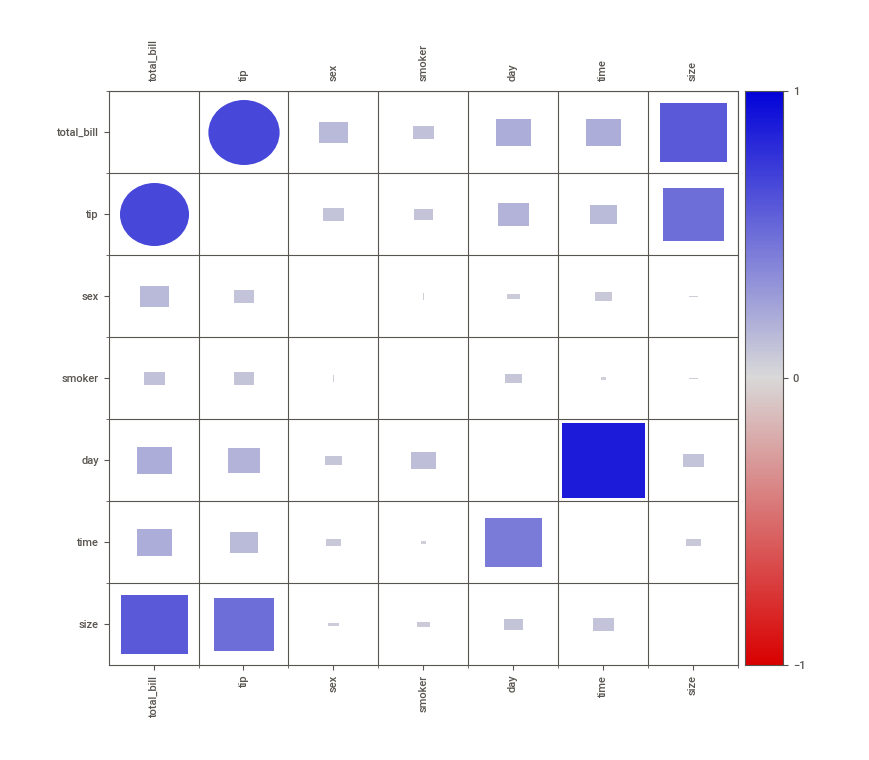

In [ ]:
tips_input3 = tips_NA3.fillna(tips_NA3.mean())
report = sv.compare([tips_input,"MCAR"],[tips_input3,"MNAR"])
report.show_notebook()